# <font color = blue> Telecomm Churn with Logistic Regression  </font>
### Problem Statement:

Telecomm industry is highly competitive and customers actively switch from one operator to another, the telecommunications industry experiences an average of 15-25% annual churn rate and it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many telecomm operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**Definitions of churn**

**a) Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. 

**b) Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

**High-value churn**
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 
**Therefore in this project...** 

A) Need to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

B) Need to define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

C) Use the usage-based definition to define churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

### Business Goal:
A) Predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 
  This can be done well, by understanding the typical customer behaviour during churn.

- In churn prediction, there are basically three phases of customer lifecycle :

 I) ‘Good’ phase: In this phase, the customer is happy with the service and behaves as usual.

 II) 'Action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘Good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

 III) 'Churn’ phase: Churn can be defined based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, discard all data corresponding to this phase.



- In this case, since there are four-month window, the first two months are the ‘Good’ phase, the third month is the ‘Action’ phase, while the fourth month is the ‘Churn’ phase.


#### Steps to Follow...
1. Reading necessary data

2. Understanding Data

3. Cleaning of the Dataset

4. Data Preparation

5. EDA (Visualising the Data)

6. Splitting the Data into Training and Testing Sets

7. Feature Scaling

8. Building Various Models and their analysis for Model selection
   - A) RFE with Logistic Regression
   - B) Random Forest with Logistic Regression
   - C) XGBoost with Logistic Regression
   - D) Ridge Regression
   - E) PCA with Logistic Regression

9. Feature Selection using any final model

10. Conclusion

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# pip install pysurvival


#### Calling various essential library functions

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import xgboost as xgb
# import shap

from scipy import stats
from datetime import datetime

import statsmodels
import statsmodels.api as sm
import sklearn
import pydotplus, graphviz

from collections import OrderedDict
from itertools import islice

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor #Check for the VIF values of the feature variables. 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from numpy import percentile
# from lifelines.utils import concordance_index

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
# from pandas_profiling import ProfileReport

%matplotlib inline


In [ ]:
# To set the Row, Column and Width of the Dataframe to show on Jupyter Notebook
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


### Step 1: Importing and Reading the Data

In [ ]:
# Importing all datasets and to store in a Pandas Dataframe
Tele_Churn_colab = pd.read_csv("/content/drive/MyDrive/Data Science/telecom_churn_data.csv")


In [ ]:
# Create new dataframe from previous one.
Tele_Churn = Tele_Churn_colab.copy(deep=True)


In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Step 2: Inspecting the Dataframe   
Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(99999, 226)

In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [ ]:
# To check the null values of each column
Tele_Churn.isnull().sum()


mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [ ]:
# To check any duplicate value in various columns
Tele_Churn.duplicated().sum()


0

### Step 3: Data Cleaning

In [ ]:
# To see the statistical aspects of the dataframe
Tele_Churn.describe()
      

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [ ]:
# Few columns has '0' min. and max. therefore collect them in a variable and replace their 'NaN' value with Zero
col_val_0_all = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou","std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9"]


In [ ]:
# To replace respective columns 'NaN' value with '0'
Tele_Churn[col_val_0_all] = Tele_Churn[col_val_0_all].replace(np.NaN, 0)


In [ ]:
# To get all the date columns which are mentioned as 'object' in our dataset
Tele_Churn_date = Tele_Churn.select_dtypes(include=['object'])


In [ ]:
# To check all the variables label
Tele_Churn_date.head()


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [ ]:
# Replace 'NaN' values of date columns related 'last_date_of_month' for (7,8,9) with their respective column value
Tele_Churn['last_date_of_month_7'] = Tele_Churn['last_date_of_month_7'].replace(np.NaN, '7/31/2014')
Tele_Churn['last_date_of_month_8'] = Tele_Churn['last_date_of_month_8'].replace(np.NaN, '8/31/2014')
Tele_Churn['last_date_of_month_9'] = Tele_Churn['last_date_of_month_9'].replace(np.NaN, '9/30/2014')


In [ ]:
# To recheck Null values for concern column
Tele_Churn.last_date_of_month_7.isnull().sum()


0

In [ ]:
# To recheck Null values for concern column
Tele_Churn.last_date_of_month_8.isnull().sum()


0

In [ ]:
# To recheck Null values for concern column
Tele_Churn.last_date_of_month_9.isnull().sum()


0

#### Total Recharge data and the respective columns' status in a each month.

In [ ]:
# To check if 'total_rech_data' for a praticular month is Zero (0) then all other realted column's value will be respectively zero (0)
Rech_data_status_6 = Tele_Churn[["total_rech_data_6","date_of_last_rech_6","date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6"]]
Rech_data_status_7 = Tele_Churn[["total_rech_data_7","date_of_last_rech_7","date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7"]]
Rech_data_status_8 = Tele_Churn[["total_rech_data_8","date_of_last_rech_8","date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8"]]
Rech_data_status_9 = Tele_Churn[["total_rech_data_9","date_of_last_rech_9","date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9"]]


In [ ]:
# To check columsn values
Rech_data_status_6.head(50)


total_rech_data_6 date_of_last_rech_6 date_of_last_rech_data_6  \
0                 1.0           6/21/2014                6/21/2014   
1                 NaN           6/29/2014                      NaN   
2                 NaN           6/17/2014                      NaN   
3                 NaN           6/28/2014                      NaN   
4                 1.0           6/26/2014                 6/4/2014   
5                 NaN           6/19/2014                      NaN   
6                 NaN           6/28/2014                      NaN   
7                 NaN           6/27/2014                      NaN   
8                 NaN           6/25/2014                      NaN   
9                 NaN           6/29/2014                      NaN   
10                NaN           6/14/2014                      NaN   
11                NaN           6/18/2014                      NaN   
12                NaN           6/26/2014                      NaN   
13                NaN           6/20/2014                      NaN   
14                NaN           6/19/2014                      NaN   
15                NaN           6/14/2014                      NaN   
16                NaN           6/30/2014                      NaN   
17                NaN           6/30/2014                      NaN   
18                NaN           6/17/2014                      NaN   
19                1.0           6/27/2014                6/27/2014   
20                NaN           6/14/2014                      NaN   
21                NaN           6/30/2014                      NaN   
22                NaN           6/19/2014                      NaN   
23                NaN           6/18/2014                      NaN   
24                NaN           6/23/2014                      NaN   
25                NaN           6/30/2014                      NaN   
26                NaN                 NaN                      NaN   
27                NaN           6/14/2014                      NaN   
28                NaN           6/22/2014                      NaN   
29                NaN           6/30/2014                      NaN   
30                NaN           6/26/2014                      NaN   
31                NaN           6/28/2014                      NaN   
32                3.0           6/27/2014                6/27/2014   
33                5.0           6/30/2014                6/30/2014   
34                NaN           6/24/2014                      NaN   
35                NaN           6/12/2014                      NaN   
36                NaN           6/20/2014                      NaN   
37                NaN           6/17/2014                      NaN   
38                NaN           6/30/2014                      NaN   
39                1.0           6/14/2014                 6/6/2014   
40                NaN            6/3/2014                      NaN   
41                NaN           6/24/2014                      NaN   
42                NaN           6/11/2014                      NaN   
43                NaN           6/22/2014                      NaN   
44                1.0           6/17/2014                 6/2/2014   
45                NaN           6/28/2014                      NaN   
46                NaN           6/29/2014                      NaN   
47                1.0           6/17/2014                6/12/2014   
48                NaN           6/29/2014                      NaN   
49                NaN           6/21/2014                      NaN   

    max_rech_data_6  count_rech_2g_6  count_rech_3g_6  av_rech_amt_data_6  
0             252.0              0.0              1.0               252.0  
1               NaN              NaN              NaN                 NaN  
2               NaN              NaN              NaN                 NaN  
3               NaN              NaN              NaN                 NaN  
4              56.0              1.0              0.0

In [ ]:
# To check columsn values
Rech_data_status_7.head(100)


total_rech_data_7 date_of_last_rech_7 date_of_last_rech_data_7  \
0                 1.0           7/16/2014                7/16/2014   
1                 1.0           7/31/2014                7/25/2014   
2                 NaN           7/24/2014                      NaN   
3                 NaN           7/31/2014                      NaN   
4                 NaN           7/28/2014                      NaN   
5                 NaN           7/17/2014                      NaN   
6                 NaN           7/31/2014                      NaN   
7                 NaN           7/25/2014                      NaN   
8                 2.0           7/31/2014                7/31/2014   
9                 1.0           7/23/2014                7/23/2014   
10                NaN            7/5/2014                      NaN   
11                NaN           7/10/2014                      NaN   
12                NaN           7/17/2014                      NaN   
13                NaN           7/22/2014                      NaN   
14                NaN           7/31/2014                      NaN   
15                NaN           7/28/2014                      NaN   
16                NaN           7/31/2014                      NaN   
17                NaN           7/30/2014                      NaN   
18                NaN           7/31/2014                      NaN   
19                1.0           7/25/2014                7/25/2014   
20                NaN           7/10/2014                      NaN   
21                NaN           7/31/2014                      NaN   
22                NaN            7/3/2014                      NaN   
23                2.0            7/7/2014                 7/7/2014   
24                NaN           7/17/2014                      NaN   
25                NaN           7/29/2014                      NaN   
26                1.0           7/27/2014                7/27/2014   
27                NaN           7/19/2014                      NaN   
28                NaN           7/14/2014                      NaN   
29                NaN           7/16/2014                      NaN   
30                NaN           7/20/2014                      NaN   
31                NaN           7/29/2014                      NaN   
32                2.0           7/19/2014                 7/2/2014   
33                8.0           7/30/2014                7/28/2014   
34                1.0           7/19/2014                7/12/2014   
35                NaN            7/3/2014                      NaN   
36                NaN           7/25/2014                      NaN   
37                NaN           7/28/2014                      NaN   
38                NaN           7/28/2014                      NaN   
39                1.0            7/4/2014                 7/4/2014   
40                1.0           7/25/2014                 7/5/2014   
41                NaN           7/22/2014                      NaN   
42                NaN           7/25/2014                      NaN   
43                NaN           7/17/2014                      NaN   
44                1.0           7/25/2014                 7/6/2014   
45                NaN           7/25/2014                      NaN   
46                NaN           7/25/2014                      NaN   
47                NaN           7/27/2014                      NaN   
48                NaN           7/23/2014                      NaN   
49                NaN           7/12/2014                      NaN   
50                NaN           7/17/2014                      NaN   
51                NaN           7/30/2014                      NaN   
52                NaN                 NaN                      NaN   
53                5.0           7/31/2014                7/26/2014   
54                NaN           7/30/2014                      NaN   
55                1.0           7/24/2014                7/19/2014   
56            

In [ ]:
# To check columsn values
Rech_data_status_8.head(200)


total_rech_data_8 date_of_last_rech_8 date_of_last_rech_data_8  \
0                  1.0            8/8/2014                 8/8/2014   
1                  2.0           8/28/2014                8/10/2014   
2                  NaN           8/14/2014                      NaN   
3                  NaN           8/31/2014                      NaN   
4                  NaN            8/9/2014                      NaN   
5                  NaN           8/24/2014                      NaN   
6                  NaN           8/28/2014                      NaN   
7                  NaN           8/26/2014                      NaN   
8                  3.0           8/30/2014                8/23/2014   
9                  NaN           8/29/2014                      NaN   
10                 2.0           8/27/2014                8/24/2014   
11                 1.0           8/21/2014                8/21/2014   
12                 NaN           8/10/2014                      NaN   
13                 3.0           8/30/2014                8/30/2014   
14                 NaN           8/24/2014                      NaN   
15                 NaN           8/30/2014                      NaN   
16                 NaN           8/14/2014                      NaN   
17                 NaN           8/25/2014                      NaN   
18                 NaN           8/29/2014                      NaN   
19                 1.0           8/26/2014                8/23/2014   
20                 NaN           8/27/2014                      NaN   
21                 NaN           8/31/2014                      NaN   
22                 NaN           8/28/2014                      NaN   
23                 2.0           8/24/2014                 8/6/2014   
24                 NaN           8/31/2014                      NaN   
25                 NaN           8/19/2014                      NaN   
26                 2.0           8/25/2014                8/25/2014   
27                 NaN           8/24/2014                      NaN   
28                 1.0           8/29/2014                 8/7/2014   
29                 NaN           8/24/2014                      NaN   
30                 NaN           8/24/2014                      NaN   
31                 NaN           8/25/2014                      NaN   
32                 NaN           8/22/2014                      NaN   
33                 1.0           8/26/2014                8/26/2014   
34                 1.0           8/19/2014                 8/8/2014   
35                 NaN            8/2/2014                      NaN   
36                 NaN           8/24/2014                      NaN   
37                 NaN           8/28/2014                      NaN   
38                 NaN           8/24/2014                      NaN   
39                 1.0           8/13/2014                8/11/2014   
40                 NaN           8/26/2014                      NaN   
41                 NaN           8/31/2014                      NaN   
42                 NaN           8/30/2014                      NaN   
43                 NaN           8/24/2014                      NaN   
44                 3.0           8/30/2014                8/30/2014   
45                 NaN            8/5/2014                      NaN   
46                 NaN           8/24/2014                      NaN   
47                 NaN            8/5/2014                      NaN   
48                 NaN           8/28/2014                      NaN   
49                 NaN           8/14/2014                      NaN   
50                 NaN           8/13/2014                      NaN   
51                 NaN           8/24/2014                      NaN   
52                 1.0           8/18/2014                8/10/2014   
53                 1.0           8/26/2014                 8/2/2014   
54                 NaN           8/31/2014                      NaN   
55                 NaN       

In [ ]:
# To check columan values
Rech_data_status_9.head(100)


total_rech_data_9 date_of_last_rech_9 date_of_last_rech_data_9  \
0                 NaN           9/28/2014                      NaN   
1                 NaN           9/30/2014                      NaN   
2                 1.0           9/29/2014                9/17/2014   
3                 NaN           9/30/2014                      NaN   
4                 NaN           9/28/2014                      NaN   
5                 NaN           9/28/2014                      NaN   
6                 NaN           9/28/2014                      NaN   
7                 NaN           9/30/2014                      NaN   
8                 NaN           9/30/2014                      NaN   
9                 NaN           9/20/2014                      NaN   
10                1.0            9/6/2014                 9/1/2014   
11                NaN                 NaN                      NaN   
12                NaN           9/21/2014                      NaN   
13                NaN           9/26/2014                      NaN   
14                NaN           9/30/2014                      NaN   
15                NaN           9/29/2014                      NaN   
16                NaN           9/10/2014                      NaN   
17                NaN           9/29/2014                      NaN   
18                NaN           9/30/2014                      NaN   
19                NaN           9/24/2014                      NaN   
20                NaN            9/6/2014                      NaN   
21                NaN           9/30/2014                      NaN   
22                NaN           9/16/2014                      NaN   
23                1.0           9/28/2014                 9/9/2014   
24                NaN           9/29/2014                      NaN   
25                NaN           9/27/2014                      NaN   
26                2.0           9/28/2014                9/21/2014   
27                NaN           9/27/2014                      NaN   
28                NaN           9/29/2014                      NaN   
29                NaN            9/6/2014                      NaN   
30                NaN           9/30/2014                      NaN   
31                NaN           9/29/2014                      NaN   
32                NaN           9/28/2014                      NaN   
33                2.0           9/28/2014                9/10/2014   
34                1.0           9/25/2014                 9/9/2014   
35                NaN           9/26/2014                      NaN   
36                NaN           9/30/2014                      NaN   
37                NaN           9/30/2014                      NaN   
38                3.0           9/26/2014                9/26/2014   
39                1.0           9/12/2014                9/12/2014   
40                1.0           9/29/2014                9/29/2014   
41                NaN           9/17/2014                      NaN   
42                NaN           9/26/2014                      NaN   
43                NaN           9/30/2014                      NaN   
44                1.0           9/17/2014                 9/6/2014   
45                NaN           9/25/2014                      NaN   
46                3.0           9/30/2014                9/17/2014   
47                3.0           9/29/2014                9/29/2014   
48                NaN           9/26/2014                      NaN   
49                NaN           9/17/2014                      NaN   
50                NaN           9/26/2014                      NaN   
51                NaN                 NaN                      NaN   
52                2.0           9/29/2014                9/20/2014   
53                2.0           9/28/2014                9/23/2014   
54                NaN           9/28/2014                      NaN   
55                NaN           9/30/2014                      NaN   
56            

### Inferences:
 - After observation of all the aobve table it is clear that wherever 'date_of_last_rech_ for 6,7,8,9 month has 'NaN' value then all other related columns also has no value, therefore we can either drop those Rows or replace with '0' as '0' also has no meaning.
 - From above tables it is clear that as and when Total_Rech_data has no value other related columns also has no value, therefore we can replace all 'NaN' values in the respective clumns with 'Zero' (0).


In [ ]:
# To collect all the columns in a variable 
Rech_data_status_all = ["total_rech_data_6","date_of_last_rech_6","date_of_last_rech_data_6","max_rech_data_6","count_rech_2g_6","count_rech_3g_6","av_rech_amt_data_6",
                        "total_rech_data_7","date_of_last_rech_7","date_of_last_rech_data_7","max_rech_data_7","count_rech_2g_7","count_rech_3g_7","av_rech_amt_data_7",
                        "total_rech_data_8","date_of_last_rech_8","date_of_last_rech_data_8","max_rech_data_8","count_rech_2g_8","count_rech_3g_8","av_rech_amt_data_8",
                        "total_rech_data_9","date_of_last_rech_9","date_of_last_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9"]


In [ ]:
# To replace respective columns 'NaN' value with '0'
Tele_Churn[Rech_data_status_all] = Tele_Churn[Rech_data_status_all].replace(np.NaN, 0)


In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

#### Convert above date columns data type from Object to Datetime.

In [ ]:
# To convert date column data type from object to datetime 
Tele_Churn[["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"]] = Tele_Churn[["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"]].apply(pd.to_datetime)


In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

#### To check all incomings minutes of usage.

In [ ]:
# To check total incoming minutes of usage, if it is Zero (0) then other related column values will be also Zero (0)
All_icomings_6 = Tele_Churn[["total_ic_mou_6","loc_ic_mou_6","loc_ic_t2t_mou_6","loc_ic_t2m_mou_6","loc_ic_t2f_mou_6","std_ic_t2t_mou_6","std_ic_t2m_mou_6","std_ic_t2f_mou_6","std_ic_t2o_mou_6","std_ic_mou_6","spl_ic_mou_6","isd_ic_mou_6","ic_others_6","roam_ic_mou_6"]] 
All_icomings_7 = Tele_Churn[["total_ic_mou_7","loc_ic_mou_7","loc_ic_t2t_mou_7","loc_ic_t2m_mou_7","loc_ic_t2f_mou_7","std_ic_t2t_mou_7","std_ic_t2m_mou_7","std_ic_t2f_mou_7","std_ic_t2o_mou_7","std_ic_mou_7","spl_ic_mou_7","isd_ic_mou_7","ic_others_7","roam_ic_mou_7"]]
All_icomings_8 = Tele_Churn[["total_ic_mou_8","loc_ic_mou_8","loc_ic_t2t_mou_8","loc_ic_t2m_mou_8","loc_ic_t2f_mou_8","std_ic_t2t_mou_8","std_ic_t2m_mou_8","std_ic_t2f_mou_8","std_ic_t2o_mou_8","std_ic_mou_8","spl_ic_mou_8","isd_ic_mou_8","ic_others_8","roam_ic_mou_8"]] 
All_icomings_9 = Tele_Churn[["total_ic_mou_9","loc_ic_mou_9","loc_ic_t2t_mou_9","loc_ic_t2m_mou_9","loc_ic_t2f_mou_9","std_ic_t2t_mou_9","std_ic_t2m_mou_9","std_ic_t2f_mou_9","std_ic_t2o_mou_9","std_ic_mou_9","spl_ic_mou_9","isd_ic_mou_9","ic_others_9","roam_ic_mou_9"]]


In [ ]:
# To check columan values
All_icomings_6.head(10)


total_ic_mou_6  loc_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
0            0.00           NaN               NaN               NaN   
1           26.83         19.09              1.61             17.48   
2          370.04        229.56            115.69             14.38   
3          280.08        233.48             62.08            113.96   
4          216.44        214.03            105.68            106.84   
5          155.39         77.93             28.73             49.19   
6         2128.41       2126.89           1857.99            248.64   
7          626.46        427.88             58.14            217.56   
8          103.86         81.43             23.84             57.58   
9          303.98        262.69            129.34            132.94   

   loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0               NaN               NaN               NaN               NaN   
1              0.00              0.00              5.90              0.00   
2             99.48             72.41             45.18             21.73   
3             57.43             43.48              1.33              1.18   
4              1.50              0.00              1.93              0.00   
5              0.00              0.00              0.00             77.03   
6             20.24              0.00              1.39              0.00   
7            152.16             36.89             91.44             52.19   
8              0.00              0.00             22.43              0.00   
9              0.40              0.30             32.86              0.00   

   std_ic_t2o_mou_6  std_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  \
0               0.0           NaN           NaN           NaN          NaN   
1               0.0          5.90          0.00          1.83         0.00   
2               0.0        139.33          0.21          0.00         0.93   
3               0.0         45.99          0.59          0.00         0.00   
4               0.0          1.93          0.00          0.00         0.48   
5               0.0         77.03          0.43          0.00         0.00   
6               0.0          1.39          0.00          0.00         0.11   
7               0.0        180.54          0.21          2.06        15.74   
8               0.0         22.43          0.00          0.00         0.00   
9               0.0         33.16          0.00          8.11         0.00   

   roam_ic_mou_6  
0            NaN  
1           0.00  
2           0.00  
3           0.00  
4           0.00  
5           0.00  
6           0.00  
7          16.23  
8           0.00  
9           0.00

In [ ]:
# To check columan values
All_icomings_7.head(10)


total_ic_mou_7  loc_ic_mou_7  loc_ic_t2t_mou_7  loc_ic_t2m_mou_7  \
0            0.00           NaN               NaN               NaN   
1          104.23        104.23             29.91             65.38   
2          519.53        208.86             71.11             15.44   
3          216.61        111.59             19.98             64.51   
4          198.29        198.04             88.49            109.54   
5          158.76         87.48             30.03             57.44   
6         1788.06       1786.71           1427.04            336.96   
7          558.04        355.23             32.26            221.49   
8           28.49         23.83              9.84             13.98   
9          327.31        220.59            124.34             96.24   

   loc_ic_t2f_mou_7  std_ic_t2t_mou_7  std_ic_t2m_mou_7  std_ic_t2f_mou_7  \
0               NaN               NaN               NaN               NaN   
1              8.93              0.00              0.00              0.00   
2            122.29             71.29            177.01             58.34   
3             27.09             66.44             38.56              0.00   
4              0.00              0.00              0.25              0.00   
5              0.00              0.00              0.00             71.06   
6             22.69              0.00              0.76              0.00   
7            101.46             11.83            126.99             34.24   
8              0.00              0.58              4.08              0.00   
9              0.00              0.00             78.21              0.00   

   std_ic_t2o_mou_7  std_ic_mou_7  spl_ic_mou_7  isd_ic_mou_7  ic_others_7  \
0               0.0           NaN           NaN           NaN          NaN   
1               0.0          0.00          0.00          0.00         0.00   
2               0.0        306.66          0.00          0.85         3.14   
3               0.0        105.01          0.00          0.00         0.00   
4               0.0          0.25          0.00          0.00         0.00   
5               0.0         71.06          0.21          0.00         0.00   
6               0.0          0.76          0.00          0.00         0.58   
7               0.0        173.08          0.00         14.53        15.19   
8               0.0          4.66          0.00          0.00         0.00   
9               0.0         78.21          0.00         28.49         0.00   

   roam_ic_mou_7  
0            NaN  
1           0.00  
2           0.00  
3          54.86  
4           0.00  
5           0.00  
6           0.00  
7          33.49  
8           0.00  
9           0.00

In [ ]:
# To check columan values
All_icomings_8.head(10)


total_ic_mou_8  loc_ic_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0            5.44          5.44              0.16              4.13   
1          423.28        408.43             29.23            375.58   
2          395.03        155.99             67.46             38.89   
3           53.13         48.18              8.04             20.28   
4          338.81        337.94            233.81            104.13   
5          157.13        118.73             56.26             62.46   
6         2167.11       2164.23           1896.43            265.28   
7          428.74        188.04             27.31            121.19   
8           16.54         15.79              0.31             15.48   
9          219.86        172.51             49.93            122.58   

   loc_ic_t2f_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0              1.15              0.00              0.00              0.00   
1              3.61              2.35             12.49              0.00   
2             49.63             28.69            167.09             43.23   
3             19.84              0.00              4.94              0.00   
4              0.00              0.86              0.00              0.00   
5              0.00              0.00              0.00             37.93   
6              2.51              0.00              2.60              0.00   
7             39.53             30.39            141.33             22.21   
8              0.00              0.10              0.65              0.00   
9              0.00              0.00              1.74              0.00   

   std_ic_t2o_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.0          0.00          0.00          0.00         0.00   
1               0.0         14.84          0.00          0.00         0.00   
2               0.0        239.03          0.00          0.00         0.00   
3               0.0          4.94          0.00          0.00         0.00   
4               0.0          0.86          0.00          0.00         0.00   
5               0.0         37.93          0.23          0.00         0.23   
6               0.0          2.60          0.00          0.00         0.28   
7               0.0        193.94          0.00         31.59        15.14   
8               0.0          0.75          0.00          0.00         0.00   
9               0.0          1.74          0.00         45.59         0.00   

   roam_ic_mou_8  
0           0.00  
1           0.00  
2           0.00  
3          44.38  
4           0.00  
5           0.00  
6           0.00  
7          31.64  
8           0.00  
9           0.00

In [ ]:
# To check columan values
All_icomings_9.head(10)

total_ic_mou_9  loc_ic_mou_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  \
0            0.00           NaN               NaN               NaN   
1          188.04        173.03            116.09             56.93   
2          517.74        345.41            148.23             38.98   
3          305.38        160.19             41.73             52.86   
4          205.31        202.81            154.56             48.24   
5          205.39        152.39             68.38             84.01   
6         2572.49       2572.49           2334.88            231.41   
7            0.00           NaN               NaN               NaN   
8           34.91         21.38              4.03             17.34   
9          412.63        378.93            313.38             65.06   

   loc_ic_t2f_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  \
0               NaN               NaN               NaN               NaN   
1              0.00              0.00             15.01              0.00   
2            158.19             49.44            118.18              3.86   
3             65.59            129.84             13.98              0.00   
4              0.00              2.31              0.00              0.00   
5              0.00              0.00              0.00             52.03   
6              6.19              0.00              0.00              0.00   
7               NaN               NaN               NaN               NaN   
8              0.00              0.00             13.53              0.00   
9              0.48              4.38              1.18              0.00   

   std_ic_t2o_mou_9  std_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9  \
0               0.0           NaN           NaN           NaN          NaN   
1               0.0         15.01          0.00          0.00         0.00   
2               0.0        171.49          0.45          0.01         0.36   
3               0.0        143.83          0.55          0.00         0.80   
4               0.0          2.31          0.18          0.00         0.00   
5               0.0         52.03          0.53          0.00         0.43   
6               0.0          0.00          0.00          0.00         0.00   
7               0.0           NaN           NaN           NaN          NaN   
8               0.0         13.53          0.00          0.00         0.00   
9               0.0          5.56          0.00         28.13         0.00   

   roam_ic_mou_9  
0            NaN  
1           0.00  
2          38.49  
3           0.00  
4           0.00  
5           0.00  
6           0.00  
7            NaN  
8           0.00  
9           0.00

### Inferences
- From all of the above columns it is clear that as and when "Total_ic_mou" is '0' all the incoming columns has 'NaN' value therfore we can replace all such "NaN" with "Zero" only


In [ ]:
# To collect all the columns in a variable 
Incomg_data_status_all = ["loc_ic_mou_6","loc_ic_t2t_mou_6","loc_ic_t2m_mou_6","loc_ic_t2f_mou_6","std_ic_t2t_mou_6","std_ic_t2m_mou_6","std_ic_t2f_mou_6","std_ic_mou_6","spl_ic_mou_6","isd_ic_mou_6","ic_others_6","roam_ic_mou_6",
                          "loc_ic_mou_7","loc_ic_t2t_mou_7","loc_ic_t2m_mou_7","loc_ic_t2f_mou_7","std_ic_t2t_mou_7","std_ic_t2m_mou_7","std_ic_t2f_mou_7","std_ic_mou_7","spl_ic_mou_7","isd_ic_mou_7","ic_others_7","roam_ic_mou_7",
                          "loc_ic_mou_8","loc_ic_t2t_mou_8","loc_ic_t2m_mou_8","loc_ic_t2f_mou_8","std_ic_t2t_mou_8","std_ic_t2m_mou_8","std_ic_t2f_mou_8","std_ic_mou_8","spl_ic_mou_8","isd_ic_mou_8","ic_others_8","roam_ic_mou_8", 
                          "loc_ic_mou_9","loc_ic_t2t_mou_9","loc_ic_t2m_mou_9","loc_ic_t2f_mou_9","std_ic_t2t_mou_9","std_ic_t2m_mou_9","std_ic_t2f_mou_9","std_ic_mou_9","spl_ic_mou_9","isd_ic_mou_9","ic_others_9","roam_ic_mou_9"]


In [ ]:
# To replace respective columns 'NaN' value with '0'
Tele_Churn[Incomg_data_status_all] = Tele_Churn[Incomg_data_status_all].replace(np.NaN, 0)


In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

#### To check all outgoings and do imputation accordingly.

In [ ]:
# To check total outgoing minutes of usage, if it is Zero (0) then other related column values may be also Zero (0)
All_otg_6 = Tele_Churn[["total_og_mou_6","onnet_mou_6", "offnet_mou_6", "roam_og_mou_6", "loc_og_t2t_mou_6", "loc_og_t2m_mou_6", "loc_og_t2f_mou_6", "loc_og_t2c_mou_6", "loc_og_mou_6", "std_og_t2t_mou_6", "std_og_t2m_mou_6", "std_og_t2f_mou_6", "std_og_t2c_mou_6", "std_og_mou_6", "isd_og_mou_6", "spl_og_mou_6", "og_others_6"]] 
All_otg_7 = Tele_Churn[["total_og_mou_7","onnet_mou_7", "offnet_mou_7", "roam_og_mou_7", "loc_og_t2t_mou_7", "loc_og_t2m_mou_7", "loc_og_t2f_mou_7", "loc_og_t2c_mou_7", "loc_og_mou_7", "std_og_t2t_mou_7", "std_og_t2m_mou_7", "std_og_t2f_mou_7", "std_og_t2c_mou_7", "std_og_mou_7", "isd_og_mou_7", "spl_og_mou_7", "og_others_7"]]
All_otg_8 = Tele_Churn[["total_og_mou_8","onnet_mou_8", "offnet_mou_8", "roam_og_mou_8", "loc_og_t2t_mou_8", "loc_og_t2m_mou_8", "loc_og_t2f_mou_8", "loc_og_t2c_mou_8", "loc_og_mou_8", "std_og_t2t_mou_8", "std_og_t2m_mou_8", "std_og_t2f_mou_8", "std_og_t2c_mou_8", "std_og_mou_8", "isd_og_mou_8", "spl_og_mou_8", "og_others_8"]] 
All_otg_9 = Tele_Churn[["total_og_mou_9","onnet_mou_9", "offnet_mou_9", "roam_og_mou_9", "loc_og_t2t_mou_9", "loc_og_t2m_mou_9", "loc_og_t2f_mou_9", "loc_og_t2c_mou_9", "loc_og_mou_9", "std_og_t2t_mou_9", "std_og_t2m_mou_9", "std_og_t2f_mou_9", "std_og_t2c_mou_9", "std_og_mou_9", "isd_og_mou_9", "spl_og_mou_9", "og_others_9"]]


In [ ]:
# To check columan values
All_otg_6.head(10)


total_og_mou_6  onnet_mou_6  offnet_mou_6  roam_og_mou_6  loc_og_t2t_mou_6  \
0            0.00          NaN           NaN            NaN               NaN   
1           40.31        24.11         15.74           0.00             23.88   
2          155.33        11.54        143.33           0.00              7.19   
3          223.23        99.91        123.31           0.00             73.68   
4          127.28        50.31         76.96           0.00             50.31   
5           69.44        50.16         19.28           0.00             50.16   
6          333.76        71.03        262.73           0.00             71.03   
7          487.53        57.84        453.43          23.74             51.39   
8          508.36       413.69         94.66           0.00            297.13   
9           98.04        33.89         63.48           0.00             33.89   

   loc_og_t2m_mou_6  loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_mou_6  \
0               NaN               NaN               NaN           NaN   
1             11.51              0.00              0.00         35.39   
2             29.34             24.11              0.00         60.66   
3            107.43              1.91              0.00        183.03   
4             67.64              0.00              0.00        117.96   
5             16.39              0.00              0.00         66.56   
6            252.23             10.38              0.11        333.64   
7            308.63             62.13              0.00        422.16   
8             80.96              0.00              0.00        378.09   
9             38.03              0.00              0.00         71.93   

   std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_t2c_mou_6  \
0               NaN               NaN               NaN               NaN   
1              0.23              0.00              0.00               0.0   
2              4.34             41.81              1.48               0.0   
3             26.23              2.99              0.00               0.0   
4              0.00              9.31              0.00               0.0   
5              0.00              0.00              2.88               0.0   
6              0.00              0.00              0.00               0.0   
7              4.30             49.89              6.66               0.0   
8            116.56             13.69              0.00               0.0   
9              0.00             25.45              0.00               0.0   

   std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  
0           NaN           NaN           NaN          NaN  
1          0.23           0.0          4.68         0.00  
2         47.64           0.0         46.56         0.45  
3         29.23           0.0         10.96         0.00  
4          9.31           0.0          0.00         0.00  
5          2.88           0.0          0.00         0.00  
6          0.00           0.0          0.11         0.00  
7         60.86           0.0          4.50         0.00  
8        130.26           0.0          0.00         0.00  
9         25.45           0.0          0.66         0.00

In [ ]:
# To check columan values
All_otg_7.head(10)


total_og_mou_7  onnet_mou_7  offnet_mou_7  roam_og_mou_7  loc_og_t2t_mou_7  \
0            0.00          NaN           NaN            NaN               NaN   
1          178.53        78.68         99.84           0.00             74.56   
2          412.94        55.24        220.59           0.00             28.74   
3          135.31        54.39        109.01          28.09             34.81   
4          241.33       149.44         91.88           0.00            149.44   
5           57.08        43.63         13.44           0.00             43.63   
6           94.81        45.03         49.24           0.00             45.03   
7          609.24        54.68        567.16          12.59             31.38   
8          431.66       351.03         80.63           0.00            217.59   
9           84.28        30.11         54.16           0.00             30.11   

   loc_og_t2m_mou_7  loc_og_t2f_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  \
0               NaN               NaN               NaN           NaN   
1             75.94              0.00              2.91        150.51   
2             16.86             21.79            135.54         67.41   
3             83.21              0.65              0.00        118.68   
4             91.88              0.00              0.00        241.33   
5              8.83              0.00              0.00         52.46   
6             48.71              0.00              0.00         93.74   
7            447.38             55.14              0.00        533.91   
8             70.58              0.00              0.00        288.18   
9             40.06              0.00              0.00         70.18   

   std_og_t2t_mou_7  std_og_t2m_mou_7  std_og_t2f_mou_7  std_og_t2c_mou_7  \
0               NaN               NaN               NaN               NaN   
1              4.11              0.46              0.00               0.0   
2             26.49             67.41             14.76               0.0   
3             14.89              1.73              0.00               0.0   
4              0.00              0.00              0.00               0.0   
5              0.00              0.00              4.61               0.0   
6              0.00              0.53              0.00               0.0   
7             23.29             31.76             20.08               0.0   
8            133.43             10.04              0.00               0.0   
9              0.00             14.09              0.00               0.0   

   std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  
0           NaN           NaN           NaN          NaN  
1          4.58          0.00         23.43          0.0  
2        108.68          0.00        236.84          0.0  
3         16.63          0.00          0.00          0.0  
4          0.00          0.00          0.00          0.0  
5          4.61          0.00          0.00          0.0  
6          0.53          0.00          0.53          0.0  
7         75.14          0.18          0.00          0.0  
8        143.48          0.00          0.00          0.0  
9         14.09          0.00          0.00          0.0

In [ ]:
# To check columan values
All_otg_8.head(10)


total_og_mou_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0            0.00         0.00          0.00           0.00              0.00   
1          312.44         7.68        304.76           0.00              7.68   
2          285.46        37.26        208.36           0.00             13.58   
3          352.21       310.98         71.68          39.04             10.61   
4          208.16        83.89        124.26           0.00             83.89   
5           99.94        85.48         14.46           0.00             85.48   
6          168.74        76.66         92.08           0.00             76.14   
7          350.16        52.29        325.91          38.06             40.28   
8          171.56        35.08        136.48           0.00             12.49   
9          100.78        22.43         78.34           0.00             22.43   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0              0.00              0.00              0.00          0.00   
1            291.86              0.00              0.00        299.54   
2             38.46             15.61             45.76         67.66   
3             22.46              4.91              0.00         37.99   
4            124.26              0.00              0.00        208.16   
5             12.38              0.00              0.00         97.86   
6             80.63              0.00              0.00        156.78   
7            162.28             53.23              0.00        255.79   
8             50.54              0.00              7.15         63.04   
9             34.93              0.00              0.00         57.36   

   std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.13              0.00               0.0   
2             22.58             75.53             22.83               0.0   
3            289.58              6.53              0.00               0.0   
4              0.00              0.00              0.00               0.0   
5              0.00              0.00              2.08               0.0   
6              0.51             11.45              0.00               0.0   
7             12.01             49.14             16.68               0.0   
8             22.58             75.69              0.00               0.0   
9              0.00             43.41              0.00               0.0   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  
0          0.00          0.00          0.00          0.0  
1          0.13          0.00         12.76          0.0  
2        120.94          0.00         96.84          0.0  
3        296.11          0.00         18.09          0.0  
4          0.00          0.00          0.00          0.0  
5          2.08          0.00          0.00          0.0  
6         11.96          0.00          0.00          0.0  
7         77.84         10.01          6.50          0.0  
8         98.28          0.00         10.23          0.0  
9         43.41          0.00          0.00          0.0

In [ ]:
# To check columan values
All_otg_9.head(10)


total_og_mou_9  onnet_mou_9  offnet_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  \
0            0.00          NaN           NaN            NaN               NaN   
1           72.11        18.34         53.76           0.00             18.34   
2          124.94        74.81        118.91          70.94             14.39   
3          362.54       241.71        113.54           0.00             15.49   
4          104.59        58.78         45.81           0.00             58.78   
5          185.71       138.79         46.91           0.00            138.79   
6           65.91        15.23         50.33           0.00             15.23   
7            0.00          NaN           NaN            NaN               NaN   
8          142.18        33.46        108.71           0.00             26.13   
9          151.33        27.84        123.48           0.00             27.84   

   loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  \
0               NaN               NaN               NaN           NaN   
1             53.76              0.00              0.00         72.11   
2             28.16             22.24              0.48         64.81   
3             65.46              2.06              0.00         83.03   
4             37.89              1.93              0.00         98.61   
5             44.78              2.13              0.00        185.71   
6             50.33              0.00              0.00         65.56   
7               NaN               NaN               NaN           NaN   
8             34.58              0.00              0.00         60.71   
9             37.26              0.00              0.00         65.11   

   std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_t2c_mou_9  \
0               NaN               NaN               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2              8.76              9.28              0.00               0.0   
3            226.21              9.99              0.00               0.0   
4              0.00              0.00              0.00               0.0   
5              0.00              0.00              0.00               0.0   
6              0.00              0.00              0.00               0.0   
7               NaN               NaN               NaN               NaN   
8              7.33             74.13              0.00               0.0   
9              0.00             83.26              2.94               0.0   

   std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  
0           NaN           NaN           NaN          NaN  
1          0.00           0.0          0.00         0.00  
2         18.04           0.0         42.08         0.00  
3        236.21           0.0         43.29         0.00  
4          0.00           0.0          5.98         0.00  
5          0.00           0.0          0.00         0.00  
6          0.00           0.0          0.00         0.35  
7           NaN           NaN           NaN          NaN  
8         81.46           0.0          0.00         0.00  
9         86.21           0.0          0.00         0.00

### Inferences
- From all of the above columns it is clear that as and when "Total_og_mou" is '0' all the outgoing columns has 'NaN' value therfore we can replace all such "NaN" with "Zero" only


In [ ]:
# To collect all the columns in a variable 
Otg_mou_status_all = ["onnet_mou_6", "offnet_mou_6", "roam_og_mou_6", "loc_og_t2t_mou_6", "loc_og_t2m_mou_6", "loc_og_t2f_mou_6", "loc_og_t2c_mou_6", "loc_og_mou_6", "std_og_t2t_mou_6", "std_og_t2m_mou_6", "std_og_t2f_mou_6", "std_og_t2c_mou_6", "std_og_mou_6", "isd_og_mou_6", "spl_og_mou_6", "og_others_6",
                      "onnet_mou_7", "offnet_mou_7", "roam_og_mou_7", "loc_og_t2t_mou_7", "loc_og_t2m_mou_7", "loc_og_t2f_mou_7", "loc_og_t2c_mou_7", "loc_og_mou_7", "std_og_t2t_mou_7", "std_og_t2m_mou_7", "std_og_t2f_mou_7", "std_og_t2c_mou_7", "std_og_mou_7", "isd_og_mou_7", "spl_og_mou_7", "og_others_7",
                      "onnet_mou_8", "offnet_mou_8", "roam_og_mou_8", "loc_og_t2t_mou_8", "loc_og_t2m_mou_8", "loc_og_t2f_mou_8", "loc_og_t2c_mou_8", "loc_og_mou_8", "std_og_t2t_mou_8", "std_og_t2m_mou_8", "std_og_t2f_mou_8", "std_og_t2c_mou_8", "std_og_mou_8", "isd_og_mou_8", "spl_og_mou_8", "og_others_8", 
                      "onnet_mou_9", "offnet_mou_9", "roam_og_mou_9", "loc_og_t2t_mou_9", "loc_og_t2m_mou_9", "loc_og_t2f_mou_9", "loc_og_t2c_mou_9", "loc_og_mou_9", "std_og_t2t_mou_9", "std_og_t2m_mou_9", "std_og_t2f_mou_9", "std_og_t2c_mou_9", "std_og_mou_9", "isd_og_mou_9", "spl_og_mou_9", "og_others_9"]


In [ ]:
# To replace respective columns 'NaN' value with '0'
Tele_Churn[Otg_mou_status_all] = Tele_Churn[Otg_mou_status_all].replace(np.NaN, 0)


In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.00
std_og_t2o_mou               0.00
loc_ic_t2o_mou               0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
onnet_mou_9                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
offnet_mou_9                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
roam_og_mou_9                0.00
loc_og_t2t_mou

### Inferences
 - To check column variables which has Zero variance.

In [ ]:
# To check variance in columns
print(Tele_Churn.var())


mobile_number         4.839559e+11
circle_id             0.000000e+00
loc_og_t2o_mou        0.000000e+00
std_og_t2o_mou        0.000000e+00
loc_ic_t2o_mou        0.000000e+00
arpu_6                1.078727e+05
arpu_7                1.143497e+05
arpu_8                1.186629e+05
arpu_9                1.169631e+05
onnet_mou_6           8.551748e+04
onnet_mou_7           9.233697e+04
onnet_mou_8           9.121804e+04
onnet_mou_9           8.900148e+04
offnet_mou_6          9.792408e+04
offnet_mou_7          1.035293e+05
offnet_mou_8          1.032503e+05
offnet_mou_9          9.670134e+04
roam_ic_mou_6         5.098480e+03
roam_ic_mou_7         5.188316e+03
roam_ic_mou_8         4.429968e+03
roam_ic_mou_9         3.014718e+03
roam_og_mou_6         4.910496e+03
roam_og_mou_7         3.288785e+03
roam_og_mou_8         3.967637e+03
roam_og_mou_9         3.155753e+03
loc_og_t2t_mou_6      2.194557e+04
loc_og_t2t_mou_7      2.327307e+04
loc_og_t2t_mou_8      2.173474e+04
loc_og_t2t_mou_9    

In [ ]:
# To drop various columns which has Zero variance 
Tele_Churn.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                 'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_9'], axis=1, inplace=True)


In [ ]:
# To check variance in columns
print(Tele_Churn.var())


mobile_number         4.839559e+11
arpu_6                1.078727e+05
arpu_7                1.143497e+05
arpu_8                1.186629e+05
arpu_9                1.169631e+05
onnet_mou_6           8.551748e+04
onnet_mou_7           9.233697e+04
onnet_mou_8           9.121804e+04
onnet_mou_9           8.900148e+04
offnet_mou_6          9.792408e+04
offnet_mou_7          1.035293e+05
offnet_mou_8          1.032503e+05
offnet_mou_9          9.670134e+04
roam_ic_mou_6         5.098480e+03
roam_ic_mou_7         5.188316e+03
roam_ic_mou_8         4.429968e+03
roam_ic_mou_9         3.014718e+03
roam_og_mou_6         4.910496e+03
roam_og_mou_7         3.288785e+03
roam_og_mou_8         3.967637e+03
roam_og_mou_9         3.155753e+03
loc_og_t2t_mou_6      2.194557e+04
loc_og_t2t_mou_7      2.327307e+04
loc_og_t2t_mou_8      2.173474e+04
loc_og_t2t_mou_9      2.034827e+04
loc_og_t2m_mou_6      2.578380e+04
loc_og_t2m_mou_7      2.415655e+04
loc_og_t2m_mou_8      2.361444e+04
loc_og_t2m_mou_9    

In [ ]:
# Checking the percentage of missing values
Tele_Churn_null_per = round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)
Tele_Churn_null_per


mobile_number                0.00
last_date_of_month_6         0.00
last_date_of_month_7         0.00
last_date_of_month_8         0.00
last_date_of_month_9         0.00
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  0.00
onnet_mou_7                  0.00
onnet_mou_8                  0.00
onnet_mou_9                  0.00
offnet_mou_6                 0.00
offnet_mou_7                 0.00
offnet_mou_8                 0.00
offnet_mou_9                 0.00
roam_ic_mou_6                0.00
roam_ic_mou_7                0.00
roam_ic_mou_8                0.00
roam_ic_mou_9                0.00
roam_og_mou_6                0.00
roam_og_mou_7                0.00
roam_og_mou_8                0.00
roam_og_mou_9                0.00
loc_og_t2t_mou_6             0.00
loc_og_t2t_mou_7             0.00
loc_og_t2t_mou_8             0.00
loc_og_t2t_mou_9             0.00
loc_og_t2m_mou

### Inferences
 - To check number of columns still having more than 40% NaN values and not much useful.

In [ ]:
# To check number of columns which has Null values greater than 40%
len(Tele_Churn_null_per[Tele_Churn_null_per.values>=(40)])


16

In [ ]:
# List all the columns which values is greater than and equal to 40%
Tele_Churn_null_per_40 = list(Tele_Churn_null_per[Tele_Churn_null_per.values>=40].index)
Tele_Churn_null_per_40


['arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [ ]:
# Drop all the values which values is greater than equal to 40%.
Tele_Churn_not_null = Tele_Churn.drop(labels = Tele_Churn_null_per_40, axis=1, inplace=True)


In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number               0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2t_mou_9            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t

In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 199 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   last_date_of_month_6      datetime64[ns]
 2   last_date_of_month_7      datetime64[ns]
 3   last_date_of_month_8      datetime64[ns]
 4   last_date_of_month_9      datetime64[ns]
 5   arpu_6                    float64       
 6   arpu_7                    float64       
 7   arpu_8                    float64       
 8   arpu_9                    float64       
 9   onnet_mou_6               float64       
 10  onnet_mou_7               float64       
 11  onnet_mou_8               float64       
 12  onnet_mou_9               float64       
 13  offnet_mou_6              float64       
 14  offnet_mou_7              float64       
 15  offnet_mou_8              float64       
 16  offnet_mou_9              float64       
 17  roam_ic_mou

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(99999, 199)

In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7001865778           2014-06-30           2014-07-31   
2     7001625959           2014-06-30           2014-07-31   
3     7001204172           2014-06-30           2014-07-31   
4     7000142493           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31           2014-09-30  197.385  214.816  213.803   
1           2014-08-31           2014-09-30   34.047  355.074  268.321   
2           2014-08-31           2014-09-30  167.690  189.058  210.226   
3           2014-08-31           2014-09-30  221.338  251.102  508.054   
4           2014-08-31           2014-09-30  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4   

##### Filter the data in terms of Average recharge done by each user in the month of June, July (Good Phase) to define High value users.


In [ ]:
# To calculate Total data recharge amount per user in 'June' and 'July'.
Tele_Churn["Total_data_rech_amt_6"] = Tele_Churn["total_rech_data_6"] * Tele_Churn["av_rech_amt_data_6"]
Tele_Churn["Total_data_rech_amt_7"] = Tele_Churn["total_rech_data_7"] * Tele_Churn["av_rech_amt_data_7"]
Tele_Churn["Total_data_rech_amt_8"] = Tele_Churn["total_rech_data_8"] * Tele_Churn["av_rech_amt_data_8"]


In [ ]:
# To calculate Net data recharge amount per user for the month of 'June' and 'July'.
Tele_Churn["Net_data_rechrg_amt_6"] = Tele_Churn["total_rech_amt_6"] + Tele_Churn["Total_data_rech_amt_6"] 
Tele_Churn["Net_data_rechrg_amt_7"] = Tele_Churn["total_rech_amt_7"] + Tele_Churn["Total_data_rech_amt_7"] 
Tele_Churn["Net_data_rechrg_amt_8"] = Tele_Churn["total_rech_amt_8"] + Tele_Churn["Total_data_rech_amt_8"] 


In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7001865778           2014-06-30           2014-07-31   
2     7001625959           2014-06-30           2014-07-31   
3     7001204172           2014-06-30           2014-07-31   
4     7000142493           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31           2014-09-30  197.385  214.816  213.803   
1           2014-08-31           2014-09-30   34.047  355.074  268.321   
2           2014-08-31           2014-09-30  167.690  189.058  210.226   
3           2014-08-31           2014-09-30  221.338  251.102  508.054   
4           2014-08-31           2014-09-30  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4   

In [ ]:
# To calculate Average recharge amount per user for the month of 'June' and 'July'.
Tele_Churn["Avrg_rchg_Amt_Good_Phase"] = (Tele_Churn["Net_data_rechrg_amt_6"] + Tele_Churn["Net_data_rechrg_amt_7"])/2


In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7001865778           2014-06-30           2014-07-31   
2     7001625959           2014-06-30           2014-07-31   
3     7001204172           2014-06-30           2014-07-31   
4     7000142493           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31           2014-09-30  197.385  214.816  213.803   
1           2014-08-31           2014-09-30   34.047  355.074  268.321   
2           2014-08-31           2014-09-30  167.690  189.058  210.226   
3           2014-08-31           2014-09-30  221.338  251.102  508.054   
4           2014-08-31           2014-09-30  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4   

In [ ]:
# To find the 80% in total revenue to differentiate the High Value users based on revenue as the first two months are the ‘Good’ phase
High_value_user = round(Tele_Churn["Avrg_rchg_Amt_Good_Phase"].quantile(0.80))
High_value_user


656

In [ ]:
# Filter the data for top 20% mentioned as High Value Users
Tele_Churn = Tele_Churn[Tele_Churn["Avrg_rchg_Amt_Good_Phase"]>=High_value_user]


In [ ]:
# To check all the variables label
Tele_Churn.head(10).sort_values(by = "Avrg_rchg_Amt_Good_Phase", ascending = False)


mobile_number last_date_of_month_6 last_date_of_month_7  \
33     7000149764           2014-06-30           2014-07-31   
57     7001682585           2014-06-30           2014-07-31   
56     7002180748           2014-06-30           2014-07-31   
53     7002188521           2014-06-30           2014-07-31   
48     7000294396           2014-06-30           2014-07-31   
7      7000701601           2014-06-30           2014-07-31   
69     7002393996           2014-06-30           2014-07-31   
61     7000152517           2014-06-30           2014-07-31   
67     7000800341           2014-06-30           2014-07-31   
8      7001524846           2014-06-30           2014-07-31   

   last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
33           2014-08-31           2014-09-30   977.020  2362.833   409.230   
57           2014-08-31           2014-09-30  1201.298   687.704   602.052   
56           2014-08-31           2014-09-30   452.624   320.548   368.807   
53           2014-08-31           2014-09-30   978.077  1141.296   706.020   
48           2014-08-31           2014-09-30  1873.271   575.927   179.218   
7            2014-08-31           2014-09-30  1069.180  1349.850  3171.480   
69           2014-08-31           2014-09-30   809.518   794.775    33.060   
61           2014-08-31           2014-09-30   565.516   390.307   430.911   
67           2014-08-31           2014-09-30   218.818   386.515   386.502   
8            2014-08-31           2014-09-30   378.721   492.223   137.362   

      arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
33   799.356         0.00         0.00         0.00         0.00   
57  1529.608        61.23         7.39        62.89       119.44   
56   281.710        34.46        43.11        50.61        27.49   
53  1076.247       135.14       119.59       102.69        99.83   
48  1189.744      2061.69       881.43       156.91      1589.23   
7    500.000        57.84        54.68        52.29         0.00   
69   179.852       181.63       257.06         0.00        59.73   
61   368.777       178.41       226.81       170.11        67.44   
67     0.000         0.00         0.00         0.00         0.00   
8    166.787       413.69       351.03        35.08        33.46   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
33          0.00          0.00          0.00          0.00           0.00   
57        165.41        211.31        168.01        205.89           0.00   
56        131.59         90.61         84.31         97.03           0.00   
53        479.31        543.18        261.34        403.23           0.00   
48       1087.76        258.29         68.18        728.41           0.00   
7         453.43        567.16        325.91          0.00          16.23   
69       1608.76       1585.24          0.00        478.51           0.00   
61        186.68         45.08        145.08        189.68           0.00   
67          0.00          0.00          0.00          0.00           0.00   
8          94.66         80.63        136.48        108.71           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
33           0.00           0.00            0.0           0.00           0.00   
57           0.00           0.00            0.0           0.00           0.00   
56           0.00           0.00            0.0           0.00           0.00   
53           0.00           0.00            0.0           0.00           0.00   
48           0.00           0.00            0.0           0.00           0.00   
7           33.49          31.64            0.0          23.74          12.59   
69           1.31           0.00            0.0           0.00          30.78   
61           0.00           0.00            0.0           0.00           0.00   
67           0.00           0.00            0.0           0.00           0.00   
8            0.00           0.00            

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 206)

##### Now there are total 20031 users which are considerd as High value users.

In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number               0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2t_mou_9            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t

In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20031 entries, 7 to 99997
Data columns (total 206 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   last_date_of_month_6      datetime64[ns]
 2   last_date_of_month_7      datetime64[ns]
 3   last_date_of_month_8      datetime64[ns]
 4   last_date_of_month_9      datetime64[ns]
 5   arpu_6                    float64       
 6   arpu_7                    float64       
 7   arpu_8                    float64       
 8   arpu_9                    float64       
 9   onnet_mou_6               float64       
 10  onnet_mou_7               float64       
 11  onnet_mou_8               float64       
 12  onnet_mou_9               float64       
 13  offnet_mou_6              float64       
 14  offnet_mou_7              float64       
 15  offnet_mou_8              float64       
 16  offnet_mou_9              float64       
 17  roam_ic_mou

#### To find out total usage to calculate 'Churn' as in this project 'Churn' is based on usage

In [ ]:
# To find overall usage of data and calls
Tele_Churn['Overall_Usage'] = Tele_Churn['total_og_mou_9'] + Tele_Churn['total_ic_mou_9'] + Tele_Churn['vol_2g_mb_9'] + Tele_Churn['vol_3g_mb_9'] 


In [ ]:
# To check all the variables label
Tele_Churn.head(10).sort_values(by = 'Overall_Usage', ascending = False)


mobile_number last_date_of_month_6 last_date_of_month_7  \
33     7000149764           2014-06-30           2014-07-31   
57     7001682585           2014-06-30           2014-07-31   
48     7000294396           2014-06-30           2014-07-31   
56     7002180748           2014-06-30           2014-07-31   
53     7002188521           2014-06-30           2014-07-31   
61     7000152517           2014-06-30           2014-07-31   
69     7002393996           2014-06-30           2014-07-31   
8      7001524846           2014-06-30           2014-07-31   
7      7000701601           2014-06-30           2014-07-31   
67     7000800341           2014-06-30           2014-07-31   

   last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
33           2014-08-31           2014-09-30   977.020  2362.833   409.230   
57           2014-08-31           2014-09-30  1201.298   687.704   602.052   
48           2014-08-31           2014-09-30  1873.271   575.927   179.218   
56           2014-08-31           2014-09-30   452.624   320.548   368.807   
53           2014-08-31           2014-09-30   978.077  1141.296   706.020   
61           2014-08-31           2014-09-30   565.516   390.307   430.911   
69           2014-08-31           2014-09-30   809.518   794.775    33.060   
8            2014-08-31           2014-09-30   378.721   492.223   137.362   
7            2014-08-31           2014-09-30  1069.180  1349.850  3171.480   
67           2014-08-31           2014-09-30   218.818   386.515   386.502   

      arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
33   799.356         0.00         0.00         0.00         0.00   
57  1529.608        61.23         7.39        62.89       119.44   
48  1189.744      2061.69       881.43       156.91      1589.23   
56   281.710        34.46        43.11        50.61        27.49   
53  1076.247       135.14       119.59       102.69        99.83   
61   368.777       178.41       226.81       170.11        67.44   
69   179.852       181.63       257.06         0.00        59.73   
8    166.787       413.69       351.03        35.08        33.46   
7    500.000        57.84        54.68        52.29         0.00   
67     0.000         0.00         0.00         0.00         0.00   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
33          0.00          0.00          0.00          0.00           0.00   
57        165.41        211.31        168.01        205.89           0.00   
48       1087.76        258.29         68.18        728.41           0.00   
56        131.59         90.61         84.31         97.03           0.00   
53        479.31        543.18        261.34        403.23           0.00   
61        186.68         45.08        145.08        189.68           0.00   
69       1608.76       1585.24          0.00        478.51           0.00   
8          94.66         80.63        136.48        108.71           0.00   
7         453.43        567.16        325.91          0.00          16.23   
67          0.00          0.00          0.00          0.00           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
33           0.00           0.00            0.0           0.00           0.00   
57           0.00           0.00            0.0           0.00           0.00   
48           0.00           0.00            0.0           0.00           0.00   
56           0.00           0.00            0.0           0.00           0.00   
53           0.00           0.00            0.0           0.00           0.00   
61           0.00           0.00            0.0           0.00           0.00   
69           1.31           0.00            0.0           0.00          30.78   
8            0.00           0.00            0.0           0.00           0.00   
7           33.49          31.64            0.0          23.74          12.59   
67           0.00           0.00            

In [ ]:
# To find 'Churn' based on overall usage, whereas churn - 1, not churn - 0
Tele_Churn['churn'] = Tele_Churn['Overall_Usage'].apply(lambda x: 1 if x == 0 else 0)


In [ ]:
# To check all the variables label
Tele_Churn.head(30)


mobile_number last_date_of_month_6 last_date_of_month_7  \
7       7000701601           2014-06-30           2014-07-31   
8       7001524846           2014-06-30           2014-07-31   
33      7000149764           2014-06-30           2014-07-31   
48      7000294396           2014-06-30           2014-07-31   
53      7002188521           2014-06-30           2014-07-31   
56      7002180748           2014-06-30           2014-07-31   
57      7001682585           2014-06-30           2014-07-31   
61      7000152517           2014-06-30           2014-07-31   
67      7000800341           2014-06-30           2014-07-31   
69      7002393996           2014-06-30           2014-07-31   
73      7002402996           2014-06-30           2014-07-31   
87      7001728145           2014-06-30           2014-07-31   
92      7001606600           2014-06-30           2014-07-31   
96      7001480390           2014-06-30           2014-07-31   
101     7001746121           2014-06-30           2014-07-31   
103     7002236431           2014-06-30           2014-07-31   
105     7000208415           2014-06-30           2014-07-31   
115     7001453769           2014-06-30           2014-07-31   
124     7000302971           2014-06-30           2014-07-31   
133     7002025665           2014-06-30           2014-07-31   
134     7000594971           2014-06-30           2014-07-31   
147     7000958601           2014-06-30           2014-07-31   
149     7001341776           2014-06-30           2014-07-31   
154     7002233336           2014-06-30           2014-07-31   
157     7002404282           2014-06-30           2014-07-31   
158     7001280759           2014-06-30           2014-07-31   
170     7001407002           2014-06-30           2014-07-31   
171     7000661238           2014-06-30           2014-07-31   
172     7000038517           2014-06-30           2014-07-31   
173     7001107676           2014-06-30           2014-07-31   

    last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
7             2014-08-31           2014-09-30  1069.180  1349.850  3171.480   
8             2014-08-31           2014-09-30   378.721   492.223   137.362   
33            2014-08-31           2014-09-30   977.020  2362.833   409.230   
48            2014-08-31           2014-09-30  1873.271   575.927   179.218   
53            2014-08-31           2014-09-30   978.077  1141.296   706.020   
56            2014-08-31           2014-09-30   452.624   320.548   368.807   
57            2014-08-31           2014-09-30  1201.298   687.704   602.052   
61            2014-08-31           2014-09-30   565.516   390.307   430.911   
67            2014-08-31           2014-09-30   218.818   386.515   386.502   
69            2014-08-31           2014-09-30   809.518   794.775    33.060   
73            2014-08-31           2014-09-30  2401.829  1873.764   722.368   
87            2014-08-31           2014-09-30   623.635   712.818   560.995   
92            2014-08-31           2014-09-30   465.794   530.596   463.903   
96            2014-08-31           2014-09-30   676.999   786.560   377.488   
101           2014-08-31           2014-09-30   512.524   402.001  1144.254   
103           2014-08-31           2014-09-30   883.401  1082.027   759.027   
105           2014-08-31           2014-09-30   659.587   398.875   621.127   
115           2014-08-31           2014-09-30  1173.256   563.502   990.443   
124           2014-08-31           2014-09-30   521.253   316.455   374.629   
133           2014-08-31           2014-09-30   981.386   752.099   841.507   
134           2014-08-31           2014-09-30   740.191   496.027   480.940   
147           2014-08-31           2014-09-30   322.570   303.773   380.262   
149           2014-08-31           2014-09-30  1001.929   401.750   781.006   
154           2014-08-31           2014-09-30  1542.158  1734.042  1347.585   
157           2014-08-31           2014-09-30

In [ ]:
# To calculate % of Churn and Not-Churn
churn_per = round(100*(Tele_Churn['churn'].value_counts()/len(Tele_Churn.index)),2)
churn_per


0    92.09
1     7.91
Name: churn, dtype: float64

- As per the above results maximum users are not churned (92.09%) and only 7.91% users are churned, therefore there would be a class imbalance which can be managed.

In [ ]:
# Churn rate
churn_col = Tele_Churn['churn']
churn_rate = round(((sum(churn_col)/len(churn_col.index))*100),2)
churn_rate


7.91

#### Need to drop columns which are already used to calculate overall usage based on 9th month

In [ ]:
# To drop various unnecessary columns which not much useful or used already to create usage based churn 
Tele_Churn.drop(['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9'], axis=1, inplace=True)


#### Remove all the other variables which are related to 9 month as now we have 'churn' variable

In [ ]:
churn_colms = [col for col in Tele_Churn.columns if '_9' in col]
churn_colms


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [ ]:
# To get the length of the cols related to 9th month or churn month
len(churn_colms)


45

In [ ]:
# To drop various unnecessary columns which are related to 9th month 
Tele_Churn.drop(churn_colms, axis=1, inplace=True)


In [ ]:
# To drop unnecessary column related to 9th month (Sept.) 
Tele_Churn.drop(["sep_vbc_3g"], axis=1, inplace=True)
 

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 158)

In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601           2014-06-30           2014-07-31   
8      7001524846           2014-06-30           2014-07-31   
33     7000149764           2014-06-30           2014-07-31   
48     7000294396           2014-06-30           2014-07-31   
53     7002188521           2014-06-30           2014-07-31   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7            2014-08-31  1069.180  1349.850  3171.480        57.84   
8            2014-08-31   378.721   492.223   137.362       413.69   
33           2014-08-31   977.020  2362.833   409.230         0.00   
48           2014-08-31  1873.271   575.927   179.218      2061.69   
53           2014-08-31   978.077  1141.296   706.020       135.14   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
33         0.00         0.00          0.00          0.00          0.00   
48       881.43       156.91       1087.76        258.29         68.18   
53       119.59       102.69        479.31        543.18        261.34   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
33           0.00              0.00              0.00              0.00   
48           0.00            611.18            154.56             29.31   
53           0.00            118.44            103.68            102.69   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
33              0.00              0.00              0.00              0.00   
48           1012.04            188.83             65.58             19.34   
53            238.58            196.54            138.91              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23              0.00               0.0   
8               0.00              0.00              0.00               0.0   
33              0.00              0.00              0.00               0.0   
48              3.68              0.80              0.06               0.0   
53              0.00              0.00              2.64               2.4   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
33              0.56          0.00          0.00          0.00   
48              0.00       1642.58        347.08         95.69   
53              0.00        357.03        300.23        241.61   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
33              0.00              0.00              0.00              0.00   
48           1450.51            726.86            127.59             56.29   
53             16.70             15.91              0.00             13.96   

    std_og_t2m_mo

#### Seperate Churned and Not Churned users and check the ratio 

In [ ]:
# To check whether how many are the Non-churned users 
not_churn_users = Tele_Churn[Tele_Churn.churn == 0]
not_churn_users.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
8      7001524846           2014-06-30           2014-07-31   
33     7000149764           2014-06-30           2014-07-31   
48     7000294396           2014-06-30           2014-07-31   
53     7002188521           2014-06-30           2014-07-31   
56     7002180748           2014-06-30           2014-07-31   

   last_date_of_month_8    arpu_6    arpu_7   arpu_8  onnet_mou_6  \
8            2014-08-31   378.721   492.223  137.362       413.69   
33           2014-08-31   977.020  2362.833  409.230         0.00   
48           2014-08-31  1873.271   575.927  179.218      2061.69   
53           2014-08-31   978.077  1141.296  706.020       135.14   
56           2014-08-31   452.624   320.548  368.807        34.46   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
8        351.03        35.08         94.66         80.63        136.48   
33         0.00         0.00          0.00          0.00          0.00   
48       881.43       156.91       1087.76        258.29         68.18   
53       119.59       102.69        479.31        543.18        261.34   
56        43.11        50.61        131.59         90.61         84.31   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
8             0.0            0.0            0.0            0.0            0.0   
33            0.0            0.0            0.0            0.0            0.0   
48            0.0            0.0            0.0            0.0            0.0   
53            0.0            0.0            0.0            0.0            0.0   
56            0.0            0.0            0.0            0.0            0.0   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
8             0.0            297.13            217.59             12.49   
33            0.0              0.00              0.00              0.00   
48            0.0            611.18            154.56             29.31   
53            0.0            118.44            103.68            102.69   
56            0.0             34.46             43.11             50.61   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
8              80.96             70.58             50.54              0.00   
33              0.00              0.00              0.00              0.00   
48           1012.04            188.83             65.58             19.34   
53            238.58            196.54            138.91              0.00   
56            128.41             85.58             73.61              3.18   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
8               0.00              0.00              0.00               0.0   
33              0.00              0.00              0.00               0.0   
48              3.68              0.80              0.06               0.0   
53              0.00              0.00              2.64               2.4   
56              1.76              4.28              0.00               0.0   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
8               7.15        378.09        288.18         63.04   
33              0.56          0.00          0.00          0.00   
48              0.00       1642.58        347.08         95.69   
53              0.00        357.03        300.23        241.61   
56              4.48        166.06        130.46        128.51   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
8             116.56            133.43             22.58             13.69   
33              0.00              0.00              0.00              0.00   
48           1450.51            726.86            127.59             56.29   
53             16.70             15.91              0.00             13.96   
56              0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  s

In [ ]:
# To check the sahpe of the dataframe
not_churn_users.shape


(18446, 158)

In [ ]:
# To check whether how many are the churned users 
churn_users = Tele_Churn[Tele_Churn.churn == 1]
churn_users.head()


mobile_number last_date_of_month_6 last_date_of_month_7  \
7       7000701601           2014-06-30           2014-07-31   
67      7000800341           2014-06-30           2014-07-31   
188     7000340381           2014-06-30           2014-07-31   
320     7000959346           2014-06-30           2014-07-31   
358     7002255278           2014-06-30           2014-07-31   

    last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7             2014-08-31  1069.180  1349.850  3171.480        57.84   
67            2014-08-31   218.818   386.515   386.502         0.00   
188           2014-08-31   734.641   183.668     0.000         4.38   
320           2014-08-31  1415.186  1754.735   229.575       120.19   
358           2014-08-31   688.670   205.780   707.910        68.34   

     onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7          54.68        52.29        453.43        567.16        325.91   
67          0.00         0.00          0.00          0.00          0.00   
188         0.98         0.00        105.16         39.39          0.00   
320       236.14         1.71       2082.18       2532.03        408.54   
358        38.93         0.00        550.18        209.68          0.00   

     roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7            16.23          33.49          31.64          23.74   
67            0.00           0.00           0.00           0.00   
188           0.00           0.00           0.00           0.00   
320           0.00           0.00           0.00           0.00   
358          19.39           0.00           0.00          61.93   

     roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
7            12.59          38.06             51.39             31.38   
67            0.00           0.00              0.00              0.00   
188           0.00           0.00              4.38              0.98   
320           0.00           0.00            119.81            235.84   
358           0.00           0.00             35.88             17.31   

     loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
7               40.28            308.63            447.38            162.28   
67               0.00              0.00              0.00              0.00   
188              0.00             99.81             38.98              0.00   
320              1.71           2066.71           2530.14            408.44   
358              0.00             98.11            159.08              0.00   

     loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
7               62.13             55.14             53.23              0.00   
67               0.00              0.00              0.00              0.00   
188              5.34              0.41              0.00              0.00   
320              0.33              0.93              0.10              0.46   
358             58.99              9.66              0.00              0.00   

     loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
7                 0.0               0.0        422.16        533.91   
67                0.0               0.0          0.00          0.00   
188               0.0               0.0        109.54         40.38   
320               0.0               0.0       2186.86       2766.93   
358               0.0               0.0        192.99        186.06   

     loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
7          255.79              4.30             23.29             12.01   
67           0.00              0.00              0.00              0.00   
188          0.00              0.00              0.00              0.00   
320        410.26              0.38              0.30              0.00   
358          0.00             32.46             21.61              0.00   

     std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mo

In [ ]:
# To check the sahpe of the dataframe
churn_users.shape


(1585, 158)

In [ ]:
# To check the % of Data that has Churned users (Values = 1):
Churn_Per = round(((sum(Tele_Churn.churn == 1)/len(Tele_Churn['churn'].index))*100),2)
Churn_Per


7.91

In [ ]:
# To check the % of Data that has Not_churned users (Values = 0):
Not_Churn_Per = round(((sum(Tele_Churn.churn == 0)/len(Tele_Churn['churn'].index))*100),2)
Not_Churn_Per


92.09

#### Inferences
- 18446 are not churned users whereas 1585 are churned users.
- Overall Churn users are 7.91% only.
- Whereas, Not-Churn users are 92.09%.
- As Not-Churn % is very high (>90%) w.r.t. Churn users we can say that there is a very high imbalance between these 2 categories.

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 158)

In [ ]:
# To check columan values
Tele_Churn.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
7      7000701601           2014-06-30           2014-07-31   
8      7001524846           2014-06-30           2014-07-31   
33     7000149764           2014-06-30           2014-07-31   
48     7000294396           2014-06-30           2014-07-31   
53     7002188521           2014-06-30           2014-07-31   

   last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
7            2014-08-31  1069.180  1349.850  3171.480        57.84   
8            2014-08-31   378.721   492.223   137.362       413.69   
33           2014-08-31   977.020  2362.833   409.230         0.00   
48           2014-08-31  1873.271   575.927   179.218      2061.69   
53           2014-08-31   978.077  1141.296   706.020       135.14   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
33         0.00         0.00          0.00          0.00          0.00   
48       881.43       156.91       1087.76        258.29         68.18   
53       119.59       102.69        479.31        543.18        261.34   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7           38.06             51.39             31.38             40.28   
8            0.00            297.13            217.59             12.49   
33           0.00              0.00              0.00              0.00   
48           0.00            611.18            154.56             29.31   
53           0.00            118.44            103.68            102.69   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
7             308.63            447.38            162.28             62.13   
8              80.96             70.58             50.54              0.00   
33              0.00              0.00              0.00              0.00   
48           1012.04            188.83             65.58             19.34   
53            238.58            196.54            138.91              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
7              55.14             53.23              0.00               0.0   
8               0.00              0.00              0.00               0.0   
33              0.00              0.00              0.00               0.0   
48              3.68              0.80              0.06               0.0   
53              0.00              0.00              2.64               2.4   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7               0.00        422.16        533.91        255.79   
8               7.15        378.09        288.18         63.04   
33              0.56          0.00          0.00          0.00   
48              0.00       1642.58        347.08         95.69   
53              0.00        357.03        300.23        241.61   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
7               4.30             23.29             12.01             49.89   
8             116.56            133.43             22.58             13.69   
33              0.00              0.00              0.00              0.00   
48           1450.51            726.86            127.59             56.29   
53             16.70             15.91              0.00             13.96   

    std_og_t2m_mo

#### To get some new column from dates and drop useless columns related to dates.


In [ ]:
# To calculate no. of days in month before person is recharging 
Tele_Churn["t_days_rechrg_before_EOM_6"] = Tele_Churn["last_date_of_month_6"] - Tele_Churn["date_of_last_rech_6"]
Tele_Churn["t_days_rechrg_before_EOM_7"] = Tele_Churn["last_date_of_month_7"] - Tele_Churn["date_of_last_rech_7"]
Tele_Churn["t_days_rechrg_before_EOM_8"] = Tele_Churn["last_date_of_month_8"] - Tele_Churn["date_of_last_rech_8"]


In [ ]:
# To drop various date columns
Tele_Churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7',
                 'date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 152)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   
48     7000294396  1873.271   575.927   179.218      2061.69       881.43   
53     7002188521   978.077  1141.296   706.020       135.14       119.59   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
33         0.00          0.00          0.00          0.00           0.00   
48       156.91       1087.76        258.29         68.18           0.00   
53       102.69        479.31        543.18        261.34           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
33              0.00              0.00              0.00              0.00   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48            188.83             65.58             19.34              3.68   
53            196.54            138.91              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
33              0.00              0.00               0.0              0.56   
48              0.80              0.06               0.0              0.00   
53              0.00              2.64               2.4              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
33          0.00          0.00          0.00              0.00   
48       1642.58        347.08         95.69           1450.51   
53        357.03        300.23        241.61             16.70   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
33              0.00              0.00              0.00              0.00   
48            726.86            127.59             56.29             65.36   
53             15.91              0.00             13.96             36.53   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48          

In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20031 entries, 7 to 99997
Data columns (total 152 columns):
 #   Column                      Dtype          
---  ------                      -----          
 0   mobile_number               int64          
 1   arpu_6                      float64        
 2   arpu_7                      float64        
 3   arpu_8                      float64        
 4   onnet_mou_6                 float64        
 5   onnet_mou_7                 float64        
 6   onnet_mou_8                 float64        
 7   offnet_mou_6                float64        
 8   offnet_mou_7                float64        
 9   offnet_mou_8                float64        
 10  roam_ic_mou_6               float64        
 11  roam_ic_mou_7               float64        
 12  roam_ic_mou_8               float64        
 13  roam_og_mou_6               float64        
 14  roam_og_mou_7               float64        
 15  roam_og_mou_8               float64        
 16  loc

In [ ]:
# To no. of dyas from datetime datatype of few date variables
Tele_Churn["t_days_rechrg_before_EOM_6"] = Tele_Churn["t_days_rechrg_before_EOM_6"].dt.days
Tele_Churn["t_days_rechrg_before_EOM_7"] = Tele_Churn["t_days_rechrg_before_EOM_7"].dt.days
Tele_Churn["t_days_rechrg_before_EOM_8"] = Tele_Churn["t_days_rechrg_before_EOM_8"].dt.days


In [ ]:
# To see the type of each column
Tele_Churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20031 entries, 7 to 99997
Data columns (total 152 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   mobile_number               int64  
 1   arpu_6                      float64
 2   arpu_7                      float64
 3   arpu_8                      float64
 4   onnet_mou_6                 float64
 5   onnet_mou_7                 float64
 6   onnet_mou_8                 float64
 7   offnet_mou_6                float64
 8   offnet_mou_7                float64
 9   offnet_mou_8                float64
 10  roam_ic_mou_6               float64
 11  roam_ic_mou_7               float64
 12  roam_ic_mou_8               float64
 13  roam_og_mou_6               float64
 14  roam_og_mou_7               float64
 15  roam_og_mou_8               float64
 16  loc_og_t2t_mou_6            float64
 17  loc_og_t2t_mou_7            float64
 18  loc_og_t2t_mou_8            float64
 19  loc_og_t2m_mou_6        

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
33     7000149764   977.020  2362.833   409.230         0.00         0.00   
48     7000294396  1873.271   575.927   179.218      2061.69       881.43   
53     7002188521   978.077  1141.296   706.020       135.14       119.59   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
33         0.00          0.00          0.00          0.00           0.00   
48       156.91       1087.76        258.29         68.18           0.00   
53       102.69        479.31        543.18        261.34           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
33              0.00              0.00              0.00              0.00   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48            188.83             65.58             19.34              3.68   
53            196.54            138.91              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
33              0.00              0.00               0.0              0.56   
48              0.80              0.06               0.0              0.00   
53              0.00              2.64               2.4              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
33          0.00          0.00          0.00              0.00   
48       1642.58        347.08         95.69           1450.51   
53        357.03        300.23        241.61             16.70   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
33              0.00              0.00              0.00              0.00   
48            726.86            127.59             56.29             65.36   
53             15.91              0.00             13.96             36.53   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48          

In [ ]:
# To calculate Average revenue per user for the month of 'June' and 'July'.
Tele_Churn["arpu_6_7"] = round((Tele_Churn["arpu_6"] + Tele_Churn["arpu_7"]).mean(),2)


In [ ]:
# To drop variables which were used to calculate Average Revenue Per User
Tele_Churn.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 151)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      7000701601  3171.480        57.84        54.68        52.29   
8      7001524846   137.362       413.69       351.03        35.08   
33     7000149764   409.230         0.00         0.00         0.00   
48     7000294396   179.218      2061.69       881.43       156.91   
53     7002188521   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
33              0.00              0.00              0.00              0.00   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48            188.83             65.58             19.34              3.68   
53            196.54            138.91              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
33              0.00              0.00               0.0              0.56   
48              0.80              0.06               0.0              0.00   
53              0.00              2.64               2.4              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
33          0.00          0.00          0.00              0.00   
48       1642.58        347.08         95.69           1450.51   
53        357.03        300.23        241.61             16.70   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
33              0.00              0.00              0.00              0.00   
48            726.86            127.59             56.29             65.36   
53             15.91              0.00             13.96             36.53   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48              1.79              0.00              0.00              0.00   
53              5.23              0.00              0.

In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 151)

In [ ]:
# To derive one more new variable with respect to 'aon'(Age on Network), 
Tele_Churn['Age_on_N/W'] = round((Tele_Churn['aon']/30), 0) 


In [ ]:
# To drop variables which were used to calculate Age on Network
Tele_Churn.drop(["aon"], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 151)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      7000701601  3171.480        57.84        54.68        52.29   
8      7001524846   137.362       413.69       351.03        35.08   
33     7000149764   409.230         0.00         0.00         0.00   
48     7000294396   179.218      2061.69       881.43       156.91   
53     7002188521   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
33              0.00              0.00              0.00              0.00   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48            188.83             65.58             19.34              3.68   
53            196.54            138.91              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
33              0.00              0.00               0.0              0.56   
48              0.80              0.06               0.0              0.00   
53              0.00              2.64               2.4              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
33          0.00          0.00          0.00              0.00   
48       1642.58        347.08         95.69           1450.51   
53        357.03        300.23        241.61             16.70   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
33              0.00              0.00              0.00              0.00   
48            726.86            127.59             56.29             65.36   
53             15.91              0.00             13.96             36.53   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48              1.79              0.00              0.00              0.00   
53              5.23              0.00              0.

In [ ]:
# Drop few more columns which are not much useful as we have used before to calculate Net data recharge 
Tele_Churn.drop(["max_rech_data_6", "max_rech_data_7","max_rech_data_8","max_rech_amt_6","max_rech_amt_7","max_rech_amt_8",
                 "total_rech_data_6","total_rech_data_7","total_rech_data_8","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8",
                 "total_rech_num_6","total_rech_num_7","total_rech_num_8","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8"], axis=1, inplace=True)

# "total_rech_amt_6","total_rech_amt_7","total_rech_amt_8","Total_data_rech_amt_6","Total_data_rech_amt_7","Total_data_rech_amt_8"


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 133)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      7000701601  3171.480        57.84        54.68        52.29   
8      7001524846   137.362       413.69       351.03        35.08   
33     7000149764   409.230         0.00         0.00         0.00   
48     7000294396   179.218      2061.69       881.43       156.91   
53     7002188521   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
33              0.00              0.00              0.00              0.00   
48            611.18            154.56             29.31           1012.04   
53            118.44            103.68            102.69            238.58   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48            188.83             65.58             19.34              3.68   
53            196.54            138.91              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23              0.00               0.0              0.00   
8               0.00              0.00               0.0              7.15   
33              0.00              0.00               0.0              0.56   
48              0.80              0.06               0.0              0.00   
53              0.00              2.64               2.4              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
33          0.00          0.00          0.00              0.00   
48       1642.58        347.08         95.69           1450.51   
53        357.03        300.23        241.61             16.70   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
33              0.00              0.00              0.00              0.00   
48            726.86            127.59             56.29             65.36   
53             15.91              0.00             13.96             36.53   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
33              0.00              0.00              0.00              0.00   
48              1.79              0.00              0.00              0.00   
53              5.23              0.00              0.

In [ ]:
# To collect sum of all local outgoing minutes of usage in a single variable
Tele_Churn["Total_local_og_6"] = round(Tele_Churn[["loc_og_t2t_mou_6", "loc_og_t2m_mou_6", "loc_og_t2f_mou_6","loc_og_t2c_mou_6","loc_og_mou_6"]].sum(axis=1),2)
Tele_Churn["Total_local_og_7"] = round(Tele_Churn[["loc_og_t2t_mou_7", "loc_og_t2m_mou_7", "loc_og_t2f_mou_7","loc_og_t2c_mou_7","loc_og_mou_7"]].sum(axis=1),2)
Tele_Churn["Total_local_og_8"] = round(Tele_Churn[["loc_og_t2t_mou_8", "loc_og_t2m_mou_8", "loc_og_t2f_mou_8","loc_og_t2c_mou_8","loc_og_mou_8"]].sum(axis=1),2)


In [ ]:
# To collect sum of all local incoming minutes of usage in a single variable
Tele_Churn["Total_local_ic_6"] = round(Tele_Churn[["loc_ic_t2t_mou_6", "loc_ic_t2m_mou_6", "loc_ic_t2f_mou_6","loc_ic_mou_6"]].sum(axis=1),2)
Tele_Churn["Total_local_ic_7"] = round(Tele_Churn[["loc_ic_t2t_mou_7", "loc_ic_t2m_mou_7", "loc_ic_t2f_mou_7","loc_ic_mou_7"]].sum(axis=1),2)
Tele_Churn["Total_local_ic_8"] = round(Tele_Churn[["loc_ic_t2t_mou_8", "loc_ic_t2m_mou_8", "loc_ic_t2f_mou_8","loc_ic_mou_8"]].sum(axis=1),2)


In [ ]:
# To collect sum of all std incoming minutes of usage in a single variable
Tele_Churn["Total_std_ic_6"] = round(Tele_Churn[["std_ic_t2t_mou_6", "std_ic_t2m_mou_6", "std_ic_t2f_mou_6","std_ic_mou_6"]].sum(axis=1),2)
Tele_Churn["Total_std_ic_7"] = round(Tele_Churn[["std_ic_t2t_mou_7", "std_ic_t2m_mou_7", "std_ic_t2f_mou_7","std_ic_mou_7"]].sum(axis=1),2)
Tele_Churn["Total_std_ic_8"] = round(Tele_Churn[["std_ic_t2t_mou_8", "std_ic_t2m_mou_8", "std_ic_t2f_mou_8","std_ic_mou_8"]].sum(axis=1),2)


In [ ]:
# To collect sum of all std outing minutes of usage in a single variable
Tele_Churn["Total_std_og_6"] = round(Tele_Churn[["std_og_t2t_mou_6", "std_og_t2m_mou_6", "std_og_t2f_mou_6", "std_og_mou_6"]].sum(axis=1),2)
Tele_Churn["Total_std_og_7"] = round(Tele_Churn[["std_og_t2t_mou_7", "std_og_t2m_mou_7", "std_og_t2f_mou_7", "std_og_mou_7"]].sum(axis=1),2)
Tele_Churn["Total_std_og_8"] = round(Tele_Churn[["std_og_t2t_mou_8", "std_og_t2m_mou_8", "std_og_t2f_mou_8", "std_og_mou_8"]].sum(axis=1),2)


In [ ]:
# To collect sum of all isd,spl and other incoming minutes of usage in a single variable
Tele_Churn["Total_othrs_ic_6"] = round(Tele_Churn[["spl_ic_mou_6", "isd_ic_mou_6", "ic_others_6"]].sum(axis=1),2)
Tele_Churn["Total_othrs_ic_7"] = round(Tele_Churn[["spl_ic_mou_7", "isd_ic_mou_7", "ic_others_7"]].sum(axis=1),2)
Tele_Churn["Total_othrs_ic_8"] = round(Tele_Churn[["spl_ic_mou_8", "isd_ic_mou_8", "ic_others_8"]].sum(axis=1),2)


In [ ]:
# To collect sum of all isd,spl and other outing minutes of usage in a single variable
Tele_Churn["Total_othrs_og_6"] = round(Tele_Churn[["spl_og_mou_6", "isd_og_mou_6", "og_others_6"]].sum(axis=1),2)
Tele_Churn["Total_othrs_og_7"] = round(Tele_Churn[["spl_og_mou_7", "isd_og_mou_7", "og_others_7"]].sum(axis=1),2)
Tele_Churn["Total_othrs_og_8"] = round(Tele_Churn[["spl_og_mou_8", "isd_og_mou_8", "og_others_8"]].sum(axis=1),2)
	

In [ ]:
# Drop few more columns which are not much useful as we have used before to calculate all incoming and outgoing minutes of usages 
Tele_Churn.drop(["loc_og_t2t_mou_6", "loc_og_t2m_mou_6", "loc_og_t2f_mou_6","loc_og_t2c_mou_6","loc_og_mou_6", "loc_og_t2t_mou_7", 
                 "loc_og_t2m_mou_7", "loc_og_t2f_mou_7","loc_og_t2c_mou_7","loc_og_mou_7", "loc_og_t2t_mou_8", "loc_og_t2m_mou_8", 
                 "loc_og_t2f_mou_8","loc_og_t2c_mou_8","loc_og_mou_8", "loc_ic_t2t_mou_6", "loc_ic_t2m_mou_6", "loc_ic_t2f_mou_6", 
                 "loc_ic_mou_6", "loc_ic_t2t_mou_7", "loc_ic_t2m_mou_7", "loc_ic_t2f_mou_7","loc_ic_mou_7", "loc_ic_t2t_mou_8", 
                 "loc_ic_t2m_mou_8", "loc_ic_t2f_mou_8","loc_ic_mou_8", "std_ic_t2t_mou_6", "std_ic_t2m_mou_6", "std_ic_t2f_mou_6",
                "std_ic_mou_6", "std_ic_t2t_mou_7", "std_ic_t2m_mou_7", "std_ic_t2f_mou_7","std_ic_mou_7","std_ic_t2t_mou_8", 
                 "std_ic_t2m_mou_8", "std_ic_t2f_mou_8","std_ic_mou_8", "std_og_t2t_mou_6", "std_og_t2m_mou_6", "std_og_t2f_mou_6", 
                 "std_og_mou_6","std_og_t2t_mou_7", "std_og_t2m_mou_7", "std_og_t2f_mou_7", "std_og_mou_7","std_og_t2t_mou_8", 
                 "std_og_t2m_mou_8", "std_og_t2f_mou_8", "std_og_mou_8", "spl_ic_mou_6", "isd_ic_mou_6", "ic_others_6","spl_ic_mou_7", 
                 "isd_ic_mou_7", "ic_others_7", "spl_ic_mou_8", "isd_ic_mou_8", "ic_others_8", "spl_og_mou_6", "isd_og_mou_6", 
                 "og_others_6","spl_og_mou_7", "isd_og_mou_7", "og_others_7","spl_og_mou_8", "isd_og_mou_8", "og_others_8"], 
                  axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 82)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      7000701601  3171.480        57.84        54.68        52.29   
8      7001524846   137.362       413.69       351.03        35.08   
33     7000149764   409.230         0.00         0.00         0.00   
48     7000294396   179.218      2061.69       881.43       156.91   
53     7002188521   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
33          0.00          0.00          0.00           0.00           0.00   
48       1087.76        258.29         68.18           0.00           0.00   
53        479.31        543.18        261.34           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00   
48           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
7           487.53          609.24          350.16          626.46   
8           508.36          431.66          171.56          103.86   
33            0.00            0.00            0.56            7.89   
48         3152.43         1140.66          225.09         1250.56   
53          614.46          662.78          364.04          847.78   

    total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  total_rech_amt_7  \
7           558.04          428.74              1580               790   
8            28.49           16.54               437               601   
33            7.19           41.79              1058              2806   
48          516.43          171.14              2317               580   
53          840.03          544.88              1159              1372   

    total_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7               3638                   0                   0   
8                120                  50                   0   
33               455                 252                   0   
48               197                 250                 110   
53               775                   0                 130   

    last_day_rch_amt_8  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
7                  779              0.0              0.0              0.0   
8                   10              0.0              2.0              3.0   
33                 455              0.0              0.0              0.0   
48                 130              0.0              0.0              0.0   
53                 130              4.0              5.0              1.0   

    vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  vol_3g_mb_7  \
7          0.00         0.00         0.00          0.0         0.00   
8          0.00       356.00         0.03          0.0       750.95   
33        87.05        57.76         7.97       3509.9      8154.65   
48         0.00         0.00         0.00          0.0         0.00   
53         0.27         0.00         0.00          0.0         0.00   

    vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7          0.00             0             0             0            0   
8         11.94             0             1             0            0   
33      7701.01             0             0             0            0   
48         0.00             0             0             0            0   
53         0.00             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0 

In [ ]:
# To collect sum of all roaming minutes of usage in a single variable
Tele_Churn["Total_roam_6"] = round(Tele_Churn[["roam_ic_mou_6", "roam_og_mou_6"]].sum(axis=1),2)
Tele_Churn["Total_roam_7"] = round(Tele_Churn[["roam_ic_mou_7", "roam_og_mou_7"]].sum(axis=1),2)
Tele_Churn["Total_roam_8"] = round(Tele_Churn[["roam_ic_mou_8", "roam_og_mou_8"]].sum(axis=1),2)


In [ ]:
# Drop few more columns which are not much useful as we have used before to calculate all incoming and outgoing roaming minutes of usages 
Tele_Churn.drop(["roam_ic_mou_6", "roam_og_mou_6","roam_ic_mou_7", "roam_og_mou_7","roam_ic_mou_8", "roam_og_mou_8"], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 79)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7      7000701601  3171.480        57.84        54.68        52.29   
8      7001524846   137.362       413.69       351.03        35.08   
33     7000149764   409.230         0.00         0.00         0.00   
48     7000294396   179.218      2061.69       881.43       156.91   
53     7002188521   706.020       135.14       119.59       102.69   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  total_og_mou_6  total_og_mou_7  \
7         453.43        567.16        325.91          487.53          609.24   
8          94.66         80.63        136.48          508.36          431.66   
33          0.00          0.00          0.00            0.00            0.00   
48       1087.76        258.29         68.18         3152.43         1140.66   
53        479.31        543.18        261.34          614.46          662.78   

    total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
7           350.16          626.46          558.04          428.74   
8           171.56          103.86           28.49           16.54   
33            0.56            7.89            7.19           41.79   
48          225.09         1250.56          516.43          171.14   
53          364.04          847.78          840.03          544.88   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  last_day_rch_amt_6  \
7               1580               790              3638                   0   
8                437               601               120                  50   
33              1058              2806               455                 252   
48              2317               580               197                 250   
53              1159              1372               775                   0   

    last_day_rch_amt_7  last_day_rch_amt_8  count_rech_2g_6  count_rech_2g_7  \
7                    0                 779              0.0              0.0   
8                    0                  10              0.0              2.0   
33                   0                 455              0.0              0.0   
48                 110                 130              0.0              0.0   
53                 130                 130              4.0              5.0   

    count_rech_2g_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  vol_3g_mb_6  \
7               0.0         0.00         0.00         0.00          0.0   
8               3.0         0.00       356.00         0.03          0.0   
33              0.0        87.05        57.76         7.97       3509.9   
48              0.0         0.00         0.00         0.00          0.0   
53              1.0         0.27         0.00         0.00          0.0   

    vol_3g_mb_7  vol_3g_mb_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
7          0.00         0.00             0             0             0   
8        750.95        11.94             0             1             0   
33      8154.65      7701.01             0             0             0   
48         0.00         0.00             0             0             0   
53         0.00         0.00             0             0             0   

    sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
7             0            0            0             0             0   
8             0            1            3             0             0   
33            0            0            0             4             5   
48            0            0            0             0             0   
53            4            5            1             0             0   

    monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  aug_vbc_3g  \
7              0            0            0            0       57.74   
8              0            0            0            0       21.03   
33             1            1            3            0      358.10   
48             0            0            0            0        0.00   
53             0            0

In [ ]:
# To collect sum of all 2g, 3g used data in a single variable
Tele_Churn["Total_data_2g_3g_6"] = round(Tele_Churn[["vol_2g_mb_6", "vol_3g_mb_6", "jun_vbc_3g"]].sum(axis=1),2)
Tele_Churn["Total_data_2g_3g_7"] = round(Tele_Churn[["vol_2g_mb_7", "vol_3g_mb_7", "jul_vbc_3g"]].sum(axis=1),2)
Tele_Churn["Total_data_2g_3g_8"] = round(Tele_Churn[["vol_2g_mb_8", "vol_3g_mb_8", "aug_vbc_3g"]].sum(axis=1),2)


In [ ]:
# Drop few more columns which are not much useful as we have used before to calculate all 2g, 3g data usged 
Tele_Churn.drop(["vol_2g_mb_6", "vol_3g_mb_6", "jun_vbc_3g","vol_2g_mb_7", "vol_3g_mb_7", "jul_vbc_3g","vol_2g_mb_8", "vol_3g_mb_8", 
                 "aug_vbc_3g"], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 73)

In [ ]:
# To drop few more variables which are still not much useful
Tele_Churn.drop(["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "onnet_mou_6",	"onnet_mou_7","onnet_mou_8","offnet_mou_6",	"offnet_mou_7",	"offnet_mou_8"], axis=1, inplace=True)


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 64)

In [ ]:
# To check columan values
Tele_Churn.head()


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  3171.480          487.53          609.24          350.16   
8      7001524846   137.362          508.36          431.66          171.56   
33     7000149764   409.230            0.00            0.00            0.56   
48     7000294396   179.218         3152.43         1140.66          225.09   
53     7002188521   706.020          614.46          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7           626.46          558.04          428.74              1580   
8           103.86           28.49           16.54               437   
33            7.89            7.19           41.79              1058   
48         1250.56          516.43          171.14              2317   
53          847.78          840.03          544.88              1159   

    total_rech_amt_7  total_rech_amt_8  last_day_rch_amt_6  \
7                790              3638                   0   
8                601               120                  50   
33              2806               455                 252   
48               580               197                 250   
53              1372               775                   0   

    last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  \
7                    0                 779             0             0   
8                    0                  10             0             1   
33                   0                 455             0             0   
48                 110                 130             0             0   
53                 130                 130             0             0   

    monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  \
7              0            0            0            0             0   
8              0            0            1            3             0   
33             0            0            0            0             4   
48             0            0            0            0             0   
53             0            4            5            1             0   

    monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
7              0             0            0            0            0   
8              0             0            0            0            0   
33             5             1            1            3            0   
48             0             0            0            0            0   
53             0             0            0            0            0   

    Total_data_rech_amt_6  Total_data_rech_amt_7  Total_data_rech_amt_8  \
7                     0.0                    0.0                    0.0   
8                     0.0                  354.0                  207.0   
33                 5285.0                20424.0                  455.0   
48                    0.0                    0.0                    0.0   
53                  344.0                  575.0                   23.0   

    Net_data_rechrg_amt_6  Net_data_rechrg_amt_7  Net_data_rechrg_amt_8  \
7                  1580.0                  790.0                 3638.0   
8                   437.0                  955.0                  327.0   
33                 6343.0                23230.0                  910.0   
48                 2317.0                  580.0                  197.0   
53                 1503.0                 1947.0                  798.0   

    Avrg_rchg_Amt_Good_Phase  Overall_Usage  churn  \
7                     1185.0           0.00      1   
8                      696.0         177.09      0   
33                   14786.5        5734.89      0   
48                    1448.5        3213.82      0   
53                    1725.0        1184.49      0   

    t_days_rechrg_before_EOM_6  t_days_rechrg_before_EOM_7  \
7                            3                           6   
8                            5                   

#### To check Coorelation between various variables.

In [ ]:
# To recheck the correlation coefficients to know which variables are highly correlated
Tele_Churn_cor = Tele_Churn.corr()


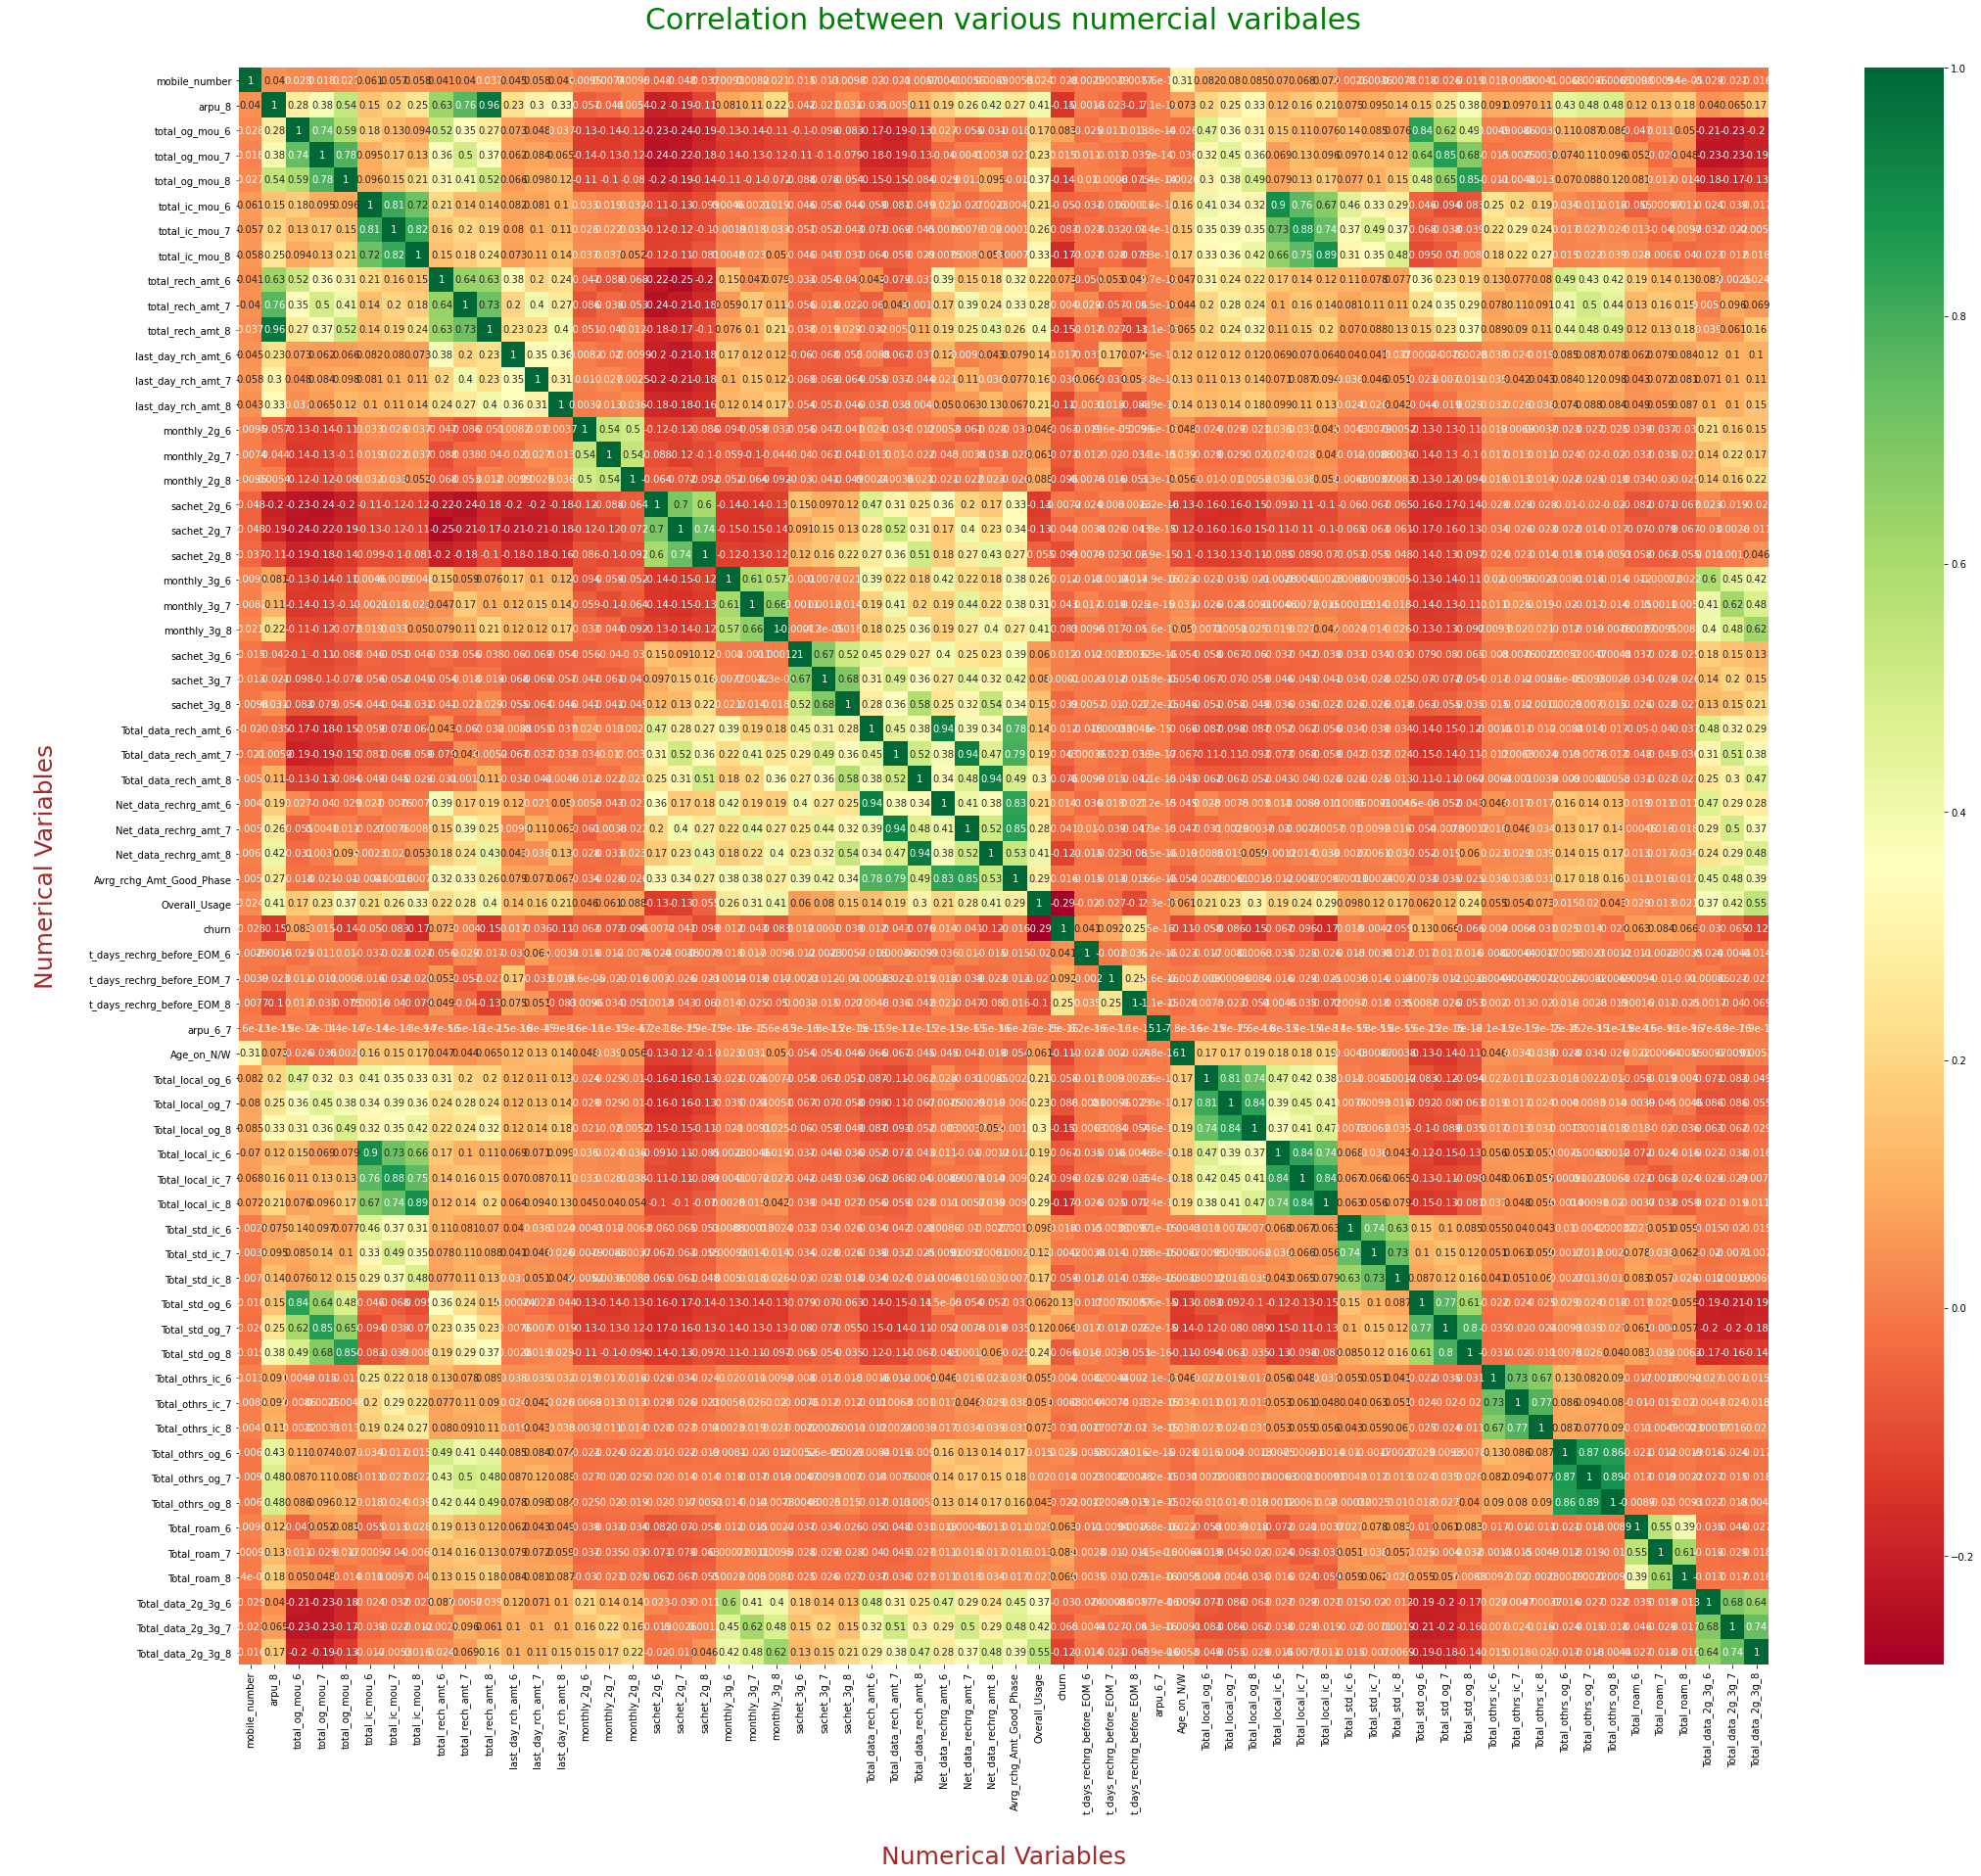

In [ ]:
# To plot the Heatmap for all the varaibles 
fig = plt.figure(figsize = (35, 30))
sns.heatmap(Tele_Churn_cor, cmap="RdYlGn", annot = True )
plt.title("Correlation between various numercial varibales\n", fontdict={'fontsize':30,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumerical Variables",fontdict={'fontsize':25,'fontweight':8,'color':'Brown'})
plt.ylabel("\nNumerical Variables\n",fontdict={'fontsize':25,'fontweight':8,'color':'Brown'})
plt.show()


In [ ]:
# To collect and see absolute coorelation matrix
Tele_churn_matrix = Tele_Churn.corr().abs()
Tele_churn_matrix


mobile_number        arpu_8  total_og_mou_6  \
mobile_number                1.000000e+00  4.023702e-02    2.796521e-02   
arpu_8                       4.023702e-02  1.000000e+00    2.768366e-01   
total_og_mou_6               2.796521e-02  2.768366e-01    1.000000e+00   
total_og_mou_7               1.752955e-02  3.847307e-01    7.401247e-01   
total_og_mou_8               2.663313e-02  5.397521e-01    5.917394e-01   
total_ic_mou_6               6.136589e-02  1.503021e-01    1.849010e-01   
total_ic_mou_7               5.720632e-02  1.960166e-01    1.284615e-01   
total_ic_mou_8               5.847842e-02  2.518361e-01    9.428415e-02   
total_rech_amt_6             4.061459e-02  6.327788e-01    5.225517e-01   
total_rech_amt_7             3.978205e-02  7.644835e-01    3.471800e-01   
total_rech_amt_8             3.670025e-02  9.592027e-01    2.671002e-01   
last_day_rch_amt_6           4.460359e-02  2.339485e-01    7.317609e-02   
last_day_rch_amt_7           5.841304e-02  3.043980e-01    4.787871e-02   
last_day_rch_amt_8           4.266826e-02  3.314051e-01    3.670294e-02   
monthly_2g_6                 9.496720e-03  5.700040e-02    1.291450e-01   
monthly_2g_7                 7.405433e-03  4.438899e-02    1.385992e-01   
monthly_2g_8                 9.495742e-03  5.374883e-03    1.202168e-01   
sachet_2g_6                  4.830938e-02  1.980232e-01    2.291736e-01   
sachet_2g_7                  4.754309e-02  1.850962e-01    2.365282e-01   
sachet_2g_8                  3.658426e-02  1.143053e-01    1.925041e-01   
monthly_3g_6                 9.343249e-03  8.078072e-02    1.282531e-01   
monthly_3g_7                 8.192595e-03  1.117462e-01    1.373981e-01   
monthly_3g_8                 2.102363e-02  2.178914e-01    1.148338e-01   
sachet_3g_6                  1.472988e-02  4.155533e-02    1.008278e-01   
sachet_3g_7                  1.279358e-02  2.134650e-02    9.789575e-02   
sachet_3g_8                  9.819734e-03  3.051052e-02    8.275037e-02   
Total_data_rech_amt_6        1.985403e-02  3.491449e-02    1.687228e-01   
Total_data_rech_amt_7        2.123223e-02  5.868065e-03    1.925091e-01   
Total_data_rech_amt_8        5.691260e-03  1.110460e-01    1.311815e-01   
Net_data_rechrg_amt_6        4.092218e-03  1.891964e-01    2.728863e-02   
Net_data_rechrg_amt_7        5.591310e-03  2.631000e-01    5.544315e-02   
Net_data_rechrg_amt_8        6.917321e-03  4.170603e-01    3.128954e-02   
Avrg_rchg_Amt_Good_Phase     5.776887e-03  2.698664e-01    1.761721e-02   
Overall_Usage                2.433186e-02  4.061762e-01    1.669744e-01   
churn                        2.793053e-02  1.494351e-01    8.276997e-02   
t_days_rechrg_before_EOM_6   2.900140e-03  1.619989e-03    2.480334e-02   
t_days_rechrg_before_EOM_7   3.929578e-03  2.335707e-02    1.127358e-02   
t_days_rechrg_before_EOM_8   7.680877e-03  1.015910e-01    1.282862e-02   
arpu_6_7                     5.641562e-13  7.100425e-15    1.804070e-14   
Age_on_N/W                   3.113930e-01  7.290772e-02    2.566088e-02   
Total_local_og_6             8.199342e-02  2.045640e-01    4.669386e-01   
Total_local_og_7             8.029489e-02  2.519285e-01    3.573434e-01   
Total_local_og_8             8.516031e-02  3.315090e-01    3.073889e-01   
Total_local_ic_6             6.963354e-02  1.207601e-01    1.520640e-01   
Total_local_ic_7             6.787934e-02  1.617631e-01    1.136546e-01   
Total_local_ic_8             7.164221e-02  2.065089e-01    7.626214e-02   
Total_std_ic_6               2.633872e-03  7.539684e-02    1.358510e-01   
Total_std_ic_7               3.644103e-03  9.508134e-02    8.464361e-02   
Total_std_ic_8               7.792334e-03  1.361244e-01    7.607788e-02   
Total_std_og_6               1.789233e-02  1.518413e-01    8.392263e-01   
Total_std_og_7               2.641720e-02  2.452720e-01    6.152776e-01   
Total_std_og_8               1.946302e-02  3.832883e-01    4.916392e-01   
Total_othrs_ic_6             1.306918e-02  9.110145e-

In [ ]:
# To find out Upper Trainangle
Tele_upper_tri = Tele_churn_matrix.where(np.triu(np.ones(Tele_churn_matrix.shape), k=1).astype(np.bool))
Tele_upper_tri


mobile_number    arpu_8  total_og_mou_6  \
mobile_number                         NaN  0.040237        0.027965   
arpu_8                                NaN       NaN        0.276837   
total_og_mou_6                        NaN       NaN             NaN   
total_og_mou_7                        NaN       NaN             NaN   
total_og_mou_8                        NaN       NaN             NaN   
total_ic_mou_6                        NaN       NaN             NaN   
total_ic_mou_7                        NaN       NaN             NaN   
total_ic_mou_8                        NaN       NaN             NaN   
total_rech_amt_6                      NaN       NaN             NaN   
total_rech_amt_7                      NaN       NaN             NaN   
total_rech_amt_8                      NaN       NaN             NaN   
last_day_rch_amt_6                    NaN       NaN             NaN   
last_day_rch_amt_7                    NaN       NaN             NaN   
last_day_rch_amt_8                    NaN       NaN             NaN   
monthly_2g_6                          NaN       NaN             NaN   
monthly_2g_7                          NaN       NaN             NaN   
monthly_2g_8                          NaN       NaN             NaN   
sachet_2g_6                           NaN       NaN             NaN   
sachet_2g_7                           NaN       NaN             NaN   
sachet_2g_8                           NaN       NaN             NaN   
monthly_3g_6                          NaN       NaN             NaN   
monthly_3g_7                          NaN       NaN             NaN   
monthly_3g_8                          NaN       NaN             NaN   
sachet_3g_6                           NaN       NaN             NaN   
sachet_3g_7                           NaN       NaN             NaN   
sachet_3g_8                           NaN       NaN             NaN   
Total_data_rech_amt_6                 NaN       NaN             NaN   
Total_data_rech_amt_7                 NaN       NaN             NaN   
Total_data_rech_amt_8                 NaN       NaN             NaN   
Net_data_rechrg_amt_6                 NaN       NaN             NaN   
Net_data_rechrg_amt_7                 NaN       NaN             NaN   
Net_data_rechrg_amt_8                 NaN       NaN             NaN   
Avrg_rchg_Amt_Good_Phase              NaN       NaN             NaN   
Overall_Usage                         NaN       NaN             NaN   
churn                                 NaN       NaN             NaN   
t_days_rechrg_before_EOM_6            NaN       NaN             NaN   
t_days_rechrg_before_EOM_7            NaN       NaN             NaN   
t_days_rechrg_before_EOM_8            NaN       NaN             NaN   
arpu_6_7                              NaN       NaN             NaN   
Age_on_N/W                            NaN       NaN             NaN   
Total_local_og_6                      NaN       NaN             NaN   
Total_local_og_7                      NaN       NaN             NaN   
Total_local_og_8                      NaN       NaN             NaN   
Total_local_ic_6                      NaN       NaN             NaN   
Total_local_ic_7                      NaN       NaN             NaN   
Total_local_ic_8                      NaN       NaN             NaN   
Total_std_ic_6                        NaN       NaN             NaN   
Total_std_ic_7                        NaN       NaN             NaN   
Total_std_ic_8                        NaN       NaN             NaN   
Total_std_og_6                        NaN       NaN             NaN   
Total_std_og_7                        NaN       NaN             NaN   
Total_std_og_8                        NaN       NaN             NaN   
Total_othrs_ic_6                      NaN       NaN             NaN   
Total_othrs_ic_7                      NaN       NaN             NaN   
Total_othrs_ic_8                      NaN       NaN             NaN   
Total_othrs_og_6                      NaN       NaN 

In [ ]:
# To find out the features which are highly correlated
Tele_Churn_drop_90 = [column for column in Tele_upper_tri.columns if any(Tele_upper_tri[column] > 0.90)]
Tele_Churn_drop_90


['total_rech_amt_8',
 'Net_data_rechrg_amt_6',
 'Net_data_rechrg_amt_7',
 'Net_data_rechrg_amt_8']

In [ ]:
# To drop the variables which are highly correlated. (>90%)
Tele_Churn.drop(['total_rech_amt_8', 'Net_data_rechrg_amt_6', 'Net_data_rechrg_amt_7', 'Net_data_rechrg_amt_8'], axis=1, inplace=True)


In [ ]:
# To recheck the correlation coefficients to know which variables are highly correlated
Tele_Churn_cor_2 = Tele_Churn.corr()


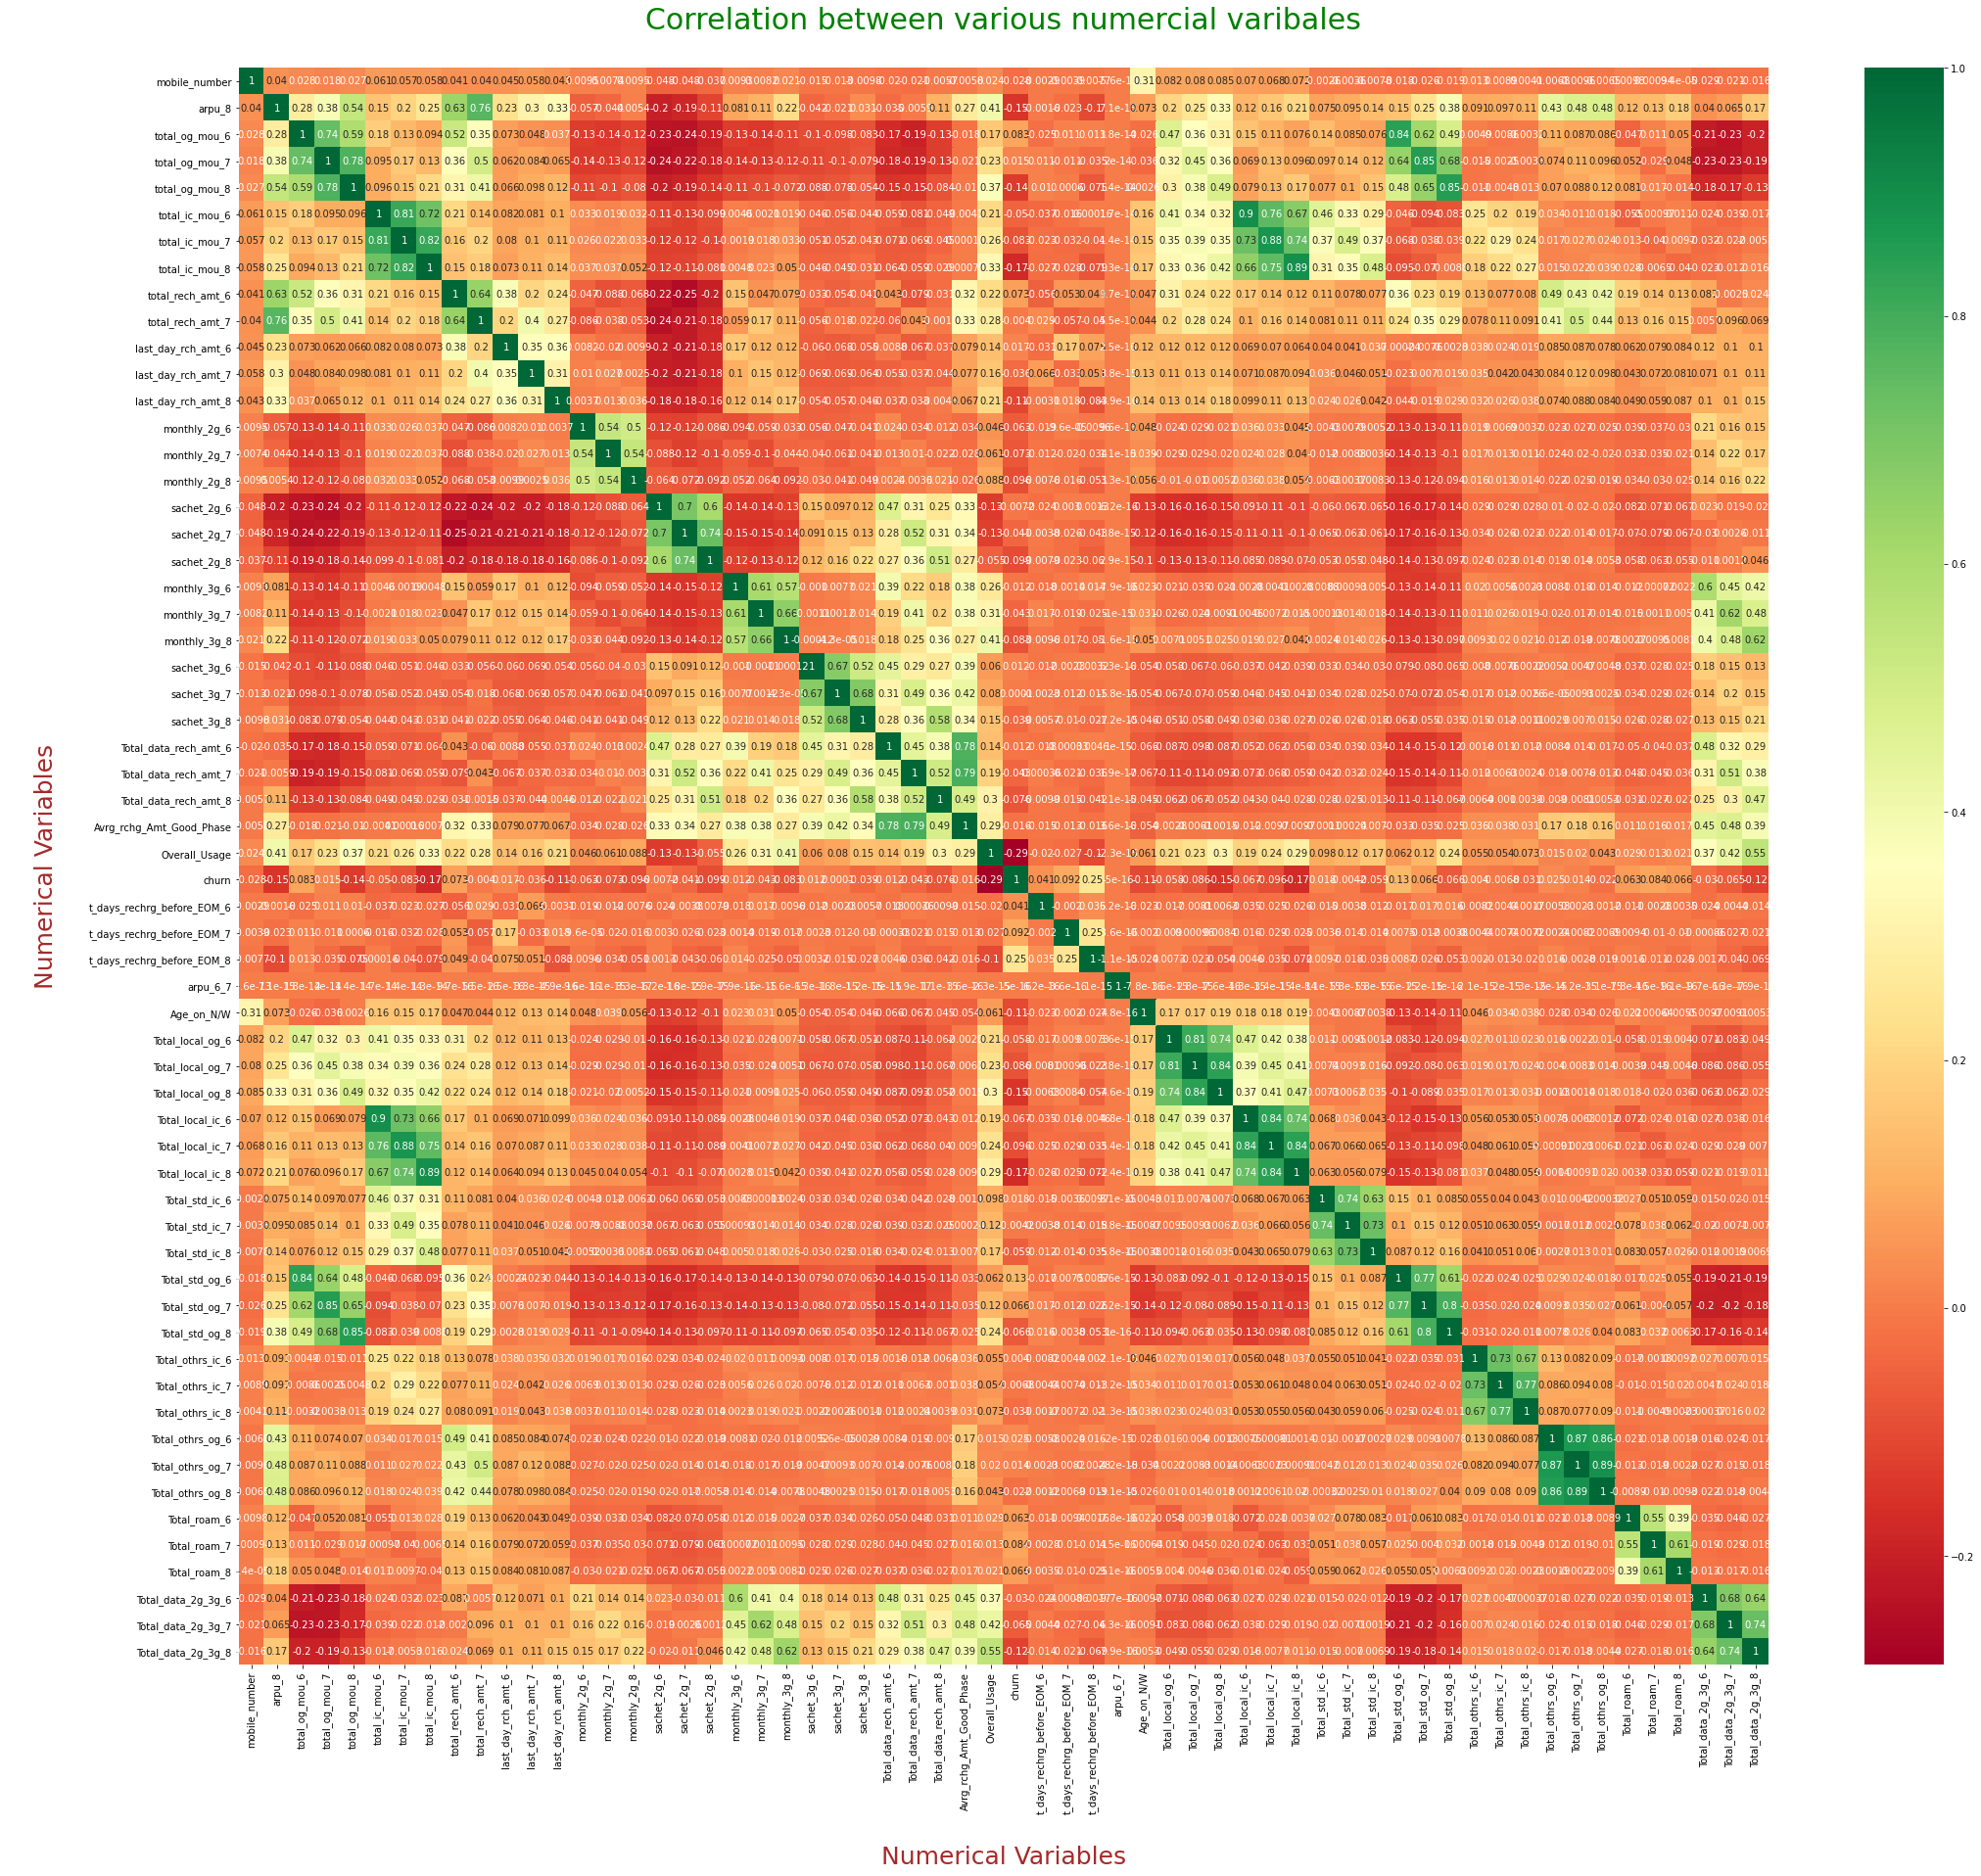

In [ ]:
# To plot the Heatmap for all the varaibles 
fig = plt.figure(figsize = (35, 30))
sns.heatmap(Tele_Churn_cor_2, cmap="RdYlGn", annot = True )
plt.title("Correlation between various numercial varibales\n", fontdict={'fontsize':30,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumerical Variables",fontdict={'fontsize':25,'fontweight':8,'color':'Brown'})
plt.ylabel("\nNumerical Variables\n",fontdict={'fontsize':25,'fontweight':8,'color':'Brown'})
plt.show()


In [ ]:
# To Check the dimensions of the dataframe
Tele_Churn.shape


(20031, 60)

#### Outlier Treatment

In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  3171.480          487.53          609.24          350.16   
8      7001524846   137.362          508.36          431.66          171.56   
33     7000149764   409.230            0.00            0.00            0.56   
48     7000294396   179.218         3152.43         1140.66          225.09   
53     7002188521   706.020          614.46          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7           626.46          558.04          428.74              1580   
8           103.86           28.49           16.54               437   
33            7.89            7.19           41.79              1058   
48         1250.56          516.43          171.14              2317   
53          847.78          840.03          544.88              1159   

    total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
7                790                   0                   0   
8                601                  50                   0   
33              2806                 252                   0   
48               580                 250                 110   
53              1372                   0                 130   

    last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7                  779             0             0             0            0   
8                   10             0             1             0            0   
33                 455             0             0             0            0   
48                 130             0             0             0            0   
53                 130             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0             0   
8             1            3             0             0             0   
33            0            0             4             5             1   
48            0            0             0             0             0   
53            5            1             0             0             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8  Total_data_rech_amt_6  \
7             0            0            0                    0.0   
8             0            0            0                    0.0   
33            1            3            0                 5285.0   
48            0            0            0                    0.0   
53            0            0            0                  344.0   

    Total_data_rech_amt_7  Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  \
7                     0.0                    0.0                    1185.0   
8                   354.0                  207.0                     696.0   
33                20424.0                  455.0                   14786.5   
48                    0.0                    0.0                    1448.5   
53                  575.0                   23.0                    1725.0   

    Overall_Usage  churn  t_days_rechrg_before_EOM_6  \
7            0.00      1                           3   
8          177.09      0                           5   
33        5734.89      0                           0   
48        3213.82      0                           1   
53        1184.49      0                           1   

    t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
7                            6                           5   1287.14   
8                            0                           1   1287.14   
33                           1                           5   1287.14   
48                           8                           3   1287.14   
53                           0                           5   1287.14   

    Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
7         27.0            844.31           1067.81         

In [ ]:
# To check the sahpe of the dataframe
Tele_Churn.shape


(20031, 60)

In [ ]:
# To see the statistical aspects of the dataframe
round(Tele_Churn.describe(percentiles = [0, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]), 2)


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  \
count   2.003100e+04  20031.00        20031.00        20031.00   
mean    7.001204e+09    577.73          682.78          704.75   
std     6.888299e+05    577.17          782.93          813.78   
min     7.000000e+09   -945.81            0.00            0.00   
0%      7.000000e+09   -945.81            0.00            0.00   
25%     7.000613e+09    250.90          112.12          111.21   
50%     7.001202e+09    487.94          434.53          453.76   
75%     7.001797e+09    764.31          986.48         1025.69   
80%     7.001915e+09    846.17         1165.74         1200.88   
85%     7.002034e+09    951.47         1383.22         1410.18   
90%     7.002162e+09   1121.66         1673.51         1712.24   
95%     7.002283e+09   1417.06         2167.14         2226.08   
99%     7.002385e+09   2200.54         3570.60         3707.76   
max     7.002411e+09  33543.62        10674.03        11365.31   

       total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
count        20031.00        20031.00        20031.00        20031.00   
mean           610.14          309.26          318.49          299.24   
std            782.83          381.09          394.70          381.89   
min              0.00            0.00            0.00            0.00   
0%               0.00            0.00            0.00            0.00   
25%             70.26           78.91           84.15           65.56   
50%            350.51          197.69          200.86          185.94   
75%            858.55          400.42          408.87          388.75   
80%           1023.49          473.19          480.83          460.39   
85%           1243.34          565.42          579.05          560.10   
90%           1542.71          709.61          725.59          697.44   
95%           2074.76          982.04          999.52          991.20   
99%           3574.03         1789.74         1887.41         1800.23   
max          14043.06         7716.14         7442.86         6066.63   

       total_rech_amt_6  total_rech_amt_7  last_day_rch_amt_6  \
count          20031.00          20031.00            20031.00   
mean             759.35            763.82              108.28   
std              646.68            672.49              159.01   
min                0.00              0.00                0.00   
0%                 0.00              0.00                0.00   
25%              399.00            393.50               25.00   
50%              670.00            670.00               91.00   
75%              972.00            978.00              120.00   
80%             1057.00           1066.00              150.00   
85%             1176.00           1190.00              198.00   
90%             1346.00           1377.00              250.00   
95%             1683.00           1727.50              279.00   
99%             2672.10           2711.70              755.00   
max            35190.00          40335.00             4010.00   

       last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  \
count            20031.00            20031.00      20031.00      20031.00   
mean               109.39               99.21          0.19          0.20   
std                157.69              157.39          0.46          0.48   
min                  0.00                0.00          0.00          0.00   
0%                   0.00                0.00          0.00          0.00   
25%                 25.00               10.00          0.00          0.00   
50%                 65.00               50.00          0.00          0.00   
75%                130.00              130.00          0.00          0.00   
80%                152.00              150.00          0.00          0.00   
85%                198.00              175.00          1.00          1.00   
90%                250.00              250.00          1.00          1.00   
95%                3

### Inferences:
- As per the above details it is clear that there are outliers in the dataframe, which are required to remove.

In [ ]:
churn_cols = [x for x in Tele_Churn.columns if x not in ['mobile_number','churn']]

for x in churn_cols:
    Percent = Tele_Churn[x].quantile([0.01,0.95]).values
    Tele_Churn[x][Tele_Churn[x] <= Percent[0]] = Percent[0]
    Tele_Churn[x][Tele_Churn[x] >= Percent[1]] = Percent[1]


In [ ]:
# To see the statistical aspects of the dataframe
round(Tele_Churn.describe(percentiles = [0, 0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99]), 2)


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  \
count   2.003100e+04  20031.00        20031.00        20031.00   
mean    7.001204e+09    546.17          639.70          658.27   
std     6.888299e+05    378.35          633.50          650.93   
min     7.000000e+09      0.00            0.00            0.00   
0%      7.000000e+09      0.00            0.00            0.00   
25%     7.000613e+09    250.90          112.12          111.21   
50%     7.001202e+09    487.94          434.53          453.76   
75%     7.001797e+09    764.31          986.48         1025.69   
80%     7.001915e+09    846.17         1165.74         1200.88   
85%     7.002034e+09    951.47         1383.22         1410.18   
90%     7.002162e+09   1121.66         1673.51         1712.24   
95%     7.002283e+09   1416.95         2166.98         2226.08   
99%     7.002385e+09   1417.06         2167.14         2226.08   
max     7.002411e+09   1417.06         2167.14         2226.08   

       total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
count        20031.00        20031.00        20031.00        20031.00   
mean           563.22          282.47          289.39          273.04   
std            601.45          269.07          272.86          272.52   
min              0.00            0.00            0.00            0.00   
0%               0.00            0.00            0.00            0.00   
25%             70.26           78.91           84.15           65.56   
50%            350.51          197.69          200.86          185.94   
75%            858.55          400.42          408.87          388.75   
80%           1023.49          473.19          480.83          460.39   
85%           1243.34          565.42          579.05          560.10   
90%           1542.71          709.61          725.59          697.44   
95%           2074.74          982.03          999.38          991.10   
99%           2074.76          982.04          999.53          991.20   
max           2074.76          982.04          999.52          991.20   

       total_rech_amt_6  total_rech_amt_7  last_day_rch_amt_6  \
count          20031.00          20031.00            20031.00   
mean             720.74            726.09               91.96   
std              424.50            436.56               82.35   
min                0.00              0.00                0.00   
0%                 0.00              0.00                0.00   
25%              399.00            393.50               25.00   
50%              670.00            670.00               91.00   
75%              972.00            978.00              120.00   
80%             1057.00           1066.00              150.00   
85%             1176.00           1190.00              198.00   
90%             1346.00           1377.00              250.00   
95%             1683.00           1727.25              279.00   
99%             1683.00           1727.50              279.00   
max             1683.00           1727.50              279.00   

       last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  \
count            20031.00            20031.00      20031.00      20031.00   
mean                93.83               83.57          0.16          0.17   
std                 87.29               83.85          0.37          0.37   
min                  0.00                0.00          0.00          0.00   
0%                   0.00                0.00          0.00          0.00   
25%                 25.00               10.00          0.00          0.00   
50%                 65.00               50.00          0.00          0.00   
75%                130.00              130.00          0.00          0.00   
80%                152.00              150.00          0.00          0.00   
85%                198.00              175.00          1.00          1.00   
90%                250.00              250.00          1.00          1.00   
95%                3

In [ ]:
# To check the sahpe of the dataframe
Tele_Churn.shape


(20031, 60)

In [ ]:
# To check all the variables label
Tele_Churn.head()


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  1417.059         487.530          609.24          350.16   
8      7001524846   137.362         508.360          431.66          171.56   
33     7000149764   409.230           0.000            0.00            0.56   
48     7000294396   179.218        2167.135         1140.66          225.09   
53     7002188521   706.020         614.460          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7          626.460          558.04          428.74              1580   
8          103.860           28.49           16.54               437   
33           7.890            7.19           41.79              1058   
48         982.035          516.43          171.14              1683   
53         847.780          840.03          544.88              1159   

    total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790.0                   0                   0   
8              601.0                  50                   0   
33            1727.5                 252                   0   
48             580.0                 250                 110   
53            1372.0                   0                 130   

    last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7                  252             0             0             0            0   
8                   10             0             1             0            0   
33                 252             0             0             0            0   
48                 130             0             0             0            0   
53                 130             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0             0   
8             1            3             0             0             0   
33            0            0             2             2             1   
48            0            0             0             0             0   
53            5            1             0             0             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8  Total_data_rech_amt_6  \
7             0            0            0                    0.0   
8             0            0            0                    0.0   
33            1            2            0                 2540.0   
48            0            0            0                    0.0   
53            0            0            0                  344.0   

    Total_data_rech_amt_7  Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  \
7                     0.0                    0.0                    1185.0   
8                   354.0                  207.0                     696.0   
33                 3003.0                  455.0                    3362.0   
48                    0.0                    0.0                    1448.5   
53                  575.0                   23.0                    1725.0   

    Overall_Usage  churn  t_days_rechrg_before_EOM_6  \
7            0.00      1                           3   
8          177.09      0                           5   
33        3792.87      0                           0   
48        3213.82      0                           1   
53        1184.49      0                           1   

    t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
7                            6                           5   1287.14   
8                            0                           1   1287.14   
33                           1                           5   1287.14   
48                           8                           3   1287.14   
53                           0                           5   1287.14   

    Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
7         27.0           844.310           1067.81         

In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn.isnull().sum()/len(Tele_Churn.index)), 2)


mobile_number                 0.0
arpu_8                        0.0
total_og_mou_6                0.0
total_og_mou_7                0.0
total_og_mou_8                0.0
total_ic_mou_6                0.0
total_ic_mou_7                0.0
total_ic_mou_8                0.0
total_rech_amt_6              0.0
total_rech_amt_7              0.0
last_day_rch_amt_6            0.0
last_day_rch_amt_7            0.0
last_day_rch_amt_8            0.0
monthly_2g_6                  0.0
monthly_2g_7                  0.0
monthly_2g_8                  0.0
sachet_2g_6                   0.0
sachet_2g_7                   0.0
sachet_2g_8                   0.0
monthly_3g_6                  0.0
monthly_3g_7                  0.0
monthly_3g_8                  0.0
sachet_3g_6                   0.0
sachet_3g_7                   0.0
sachet_3g_8                   0.0
Total_data_rech_amt_6         0.0
Total_data_rech_amt_7         0.0
Total_data_rech_amt_8         0.0
Avrg_rchg_Amt_Good_Phase      0.0
Overall_Usage 

## EDA 

### A) Univeriate Analysis

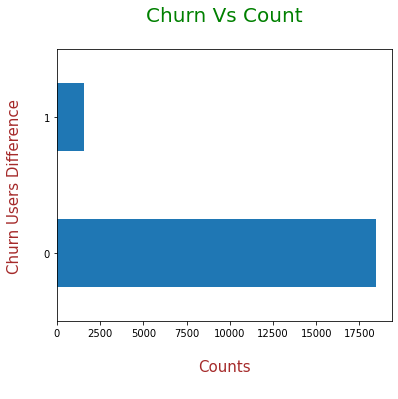

In [ ]:
# To analyze Telecomm Users (Churn and Not_Churned) ('1' = Churn, '0'= Not_Churn)
fig = plt.figure(figsize=(6,5))
Tele_Churn['churn'].value_counts().plot.barh()
plt.title("Churn Vs Count\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn Users Difference\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- Above graph represents that Not-Churn users are more than the Churn users among high value users. Therefore there is no much issue for the company in terms of revenue. 

### Bivariate/Multivariate Analysis.

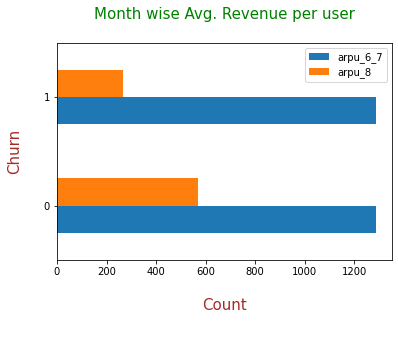

In [ ]:
# To analyze Month wise Average Revenue Per User 
arp = Tele_Churn.groupby(['churn'])['arpu_6_7', 'arpu_8'].mean()
arp.plot.barh()    
plt.title("Month wise Avg. Revenue per user\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences: 
- As per the above graph Average Revenue Per Churned users has been decreased from June_July to August. and which is minimum in the moth of August.
- Therefore as overall revenue of that user decreases then try to give various offers as per the requirement and try to retain that customer.

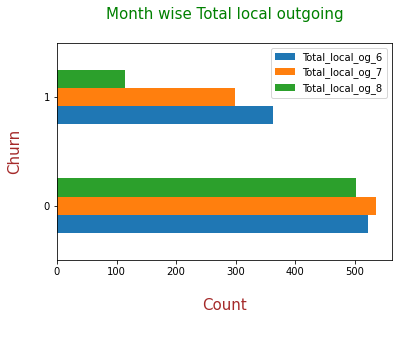

In [ ]:
# To analyze Month wise local outgoing 
tl_og = Tele_Churn.groupby(['churn'])['Total_local_og_6', 'Total_local_og_7', 'Total_local_og_8'].mean()
tl_og.plot.barh()    
plt.title("Month wise Total local outgoing\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()



#### Inferences:
- As per the above graph it is clear that Total Local outgoing for 'Churn' users has been decreased from June to August. Therfore company need to obseve this particular parameter.

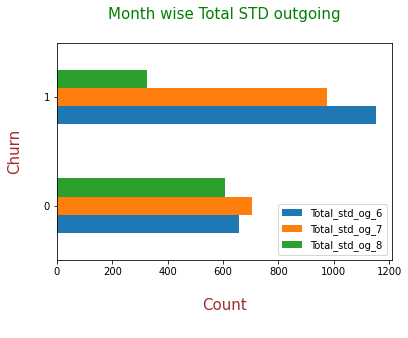

In [ ]:
# To analyze Month wise std outgoing 
std_og = Tele_Churn.groupby(['churn'])['Total_std_og_6', 'Total_std_og_7', 'Total_std_og_8'].mean()
std_og.plot.barh()    
plt.title("Month wise Total STD outgoing\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()



#### Inferences:
- As per the above graph it is clear that Total STD outgoing for 'Churn' users has been decreased from June to August. In the month of August it is very low than Non-Churn users. Whereas for Non-Churn it is not that much low.

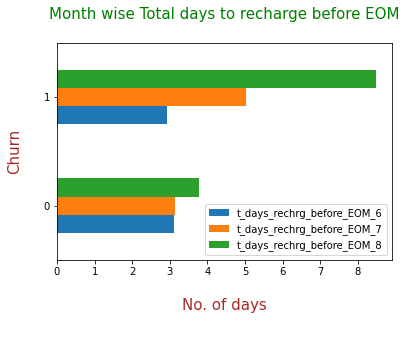

In [ ]:
# To analyze Month wise no. of days whenn customer recharge before EOM 
days_EOM = Tele_Churn.groupby(['churn'])['t_days_rechrg_before_EOM_6', 't_days_rechrg_before_EOM_7', 't_days_rechrg_before_EOM_8'].mean()
days_EOM.plot.barh()    
plt.title("Month wise Total days to recharge before EOM\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nNo. of days\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- As per the above graph it is clear that users who are Churned are recharding very late in the month of August. Means days difference is more than June and July. Whereas for the Non-Churned users gap of no. of days is less for recharging their no.


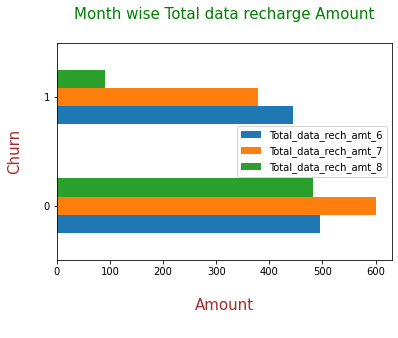

In [ ]:
# To analyze Month wise Total Data Recharge Amount 
data_amt = Tele_Churn.groupby(['churn'])['Total_data_rech_amt_6', 'Total_data_rech_amt_7', 'Total_data_rech_amt_8'].mean()
data_amt.plot.barh()    
plt.title("Month wise Total data recharge Amount\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nAmount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- As per the above graph it is clear that for Churned users 'Total Data Recharge Amount' is very less in the month of August and it is in  decreasing order with respect to June and July. Whereas, for Non-Churned users this amount is almost similar as in June.
  Therefore company need to closely observe this particualr variable.


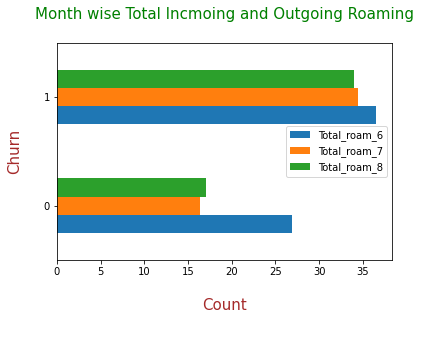

In [ ]:
# To analyze Month wise Total incoming, outgoing Roaming data 
tl_og_r = Tele_Churn.groupby(['churn'])['Total_roam_6', 'Total_roam_7', 'Total_roam_8'].mean()
tl_og_r.plot.barh()    
plt.title("Month wise Total Incmoing and Outgoing Roaming\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### It is stated from the above graph that Total Roaming data still in decreasin gorder from June to August for Churned users but the total Roaming value is higher fro Churned users than Non-Churned users.

In [ ]:
# TO check the columns of the dataframe
Tele_Churn.columns


Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'Total_data_rech_amt_6', 'Total_data_rech_amt_7',
       'Total_data_rech_amt_8', 'Avrg_rchg_Amt_Good_Phase', 'Overall_Usage',
       'churn', 't_days_rechrg_before_EOM_6', 't_days_rechrg_before_EOM_7',
       't_days_rechrg_before_EOM_8', 'Age_on_N/W', 'Total_local_og_6',
       'Total_local_og_7', 'Total_local_og_8', 'Total_local_ic_6',
       'Total_local_ic_7', 'Total_local_ic_8', 'Total_std_ic_6',
       'Total_std_ic_7', 'Total_std_ic_8', 'Total_std_og_6', 'Total_std_og_7',
       'Total_std_og_8', 'Total_othrs_ic_6', 'Total_othrs_i

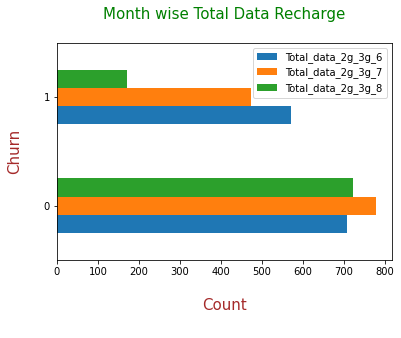

In [ ]:
# To analyze Month wise Total 2g, 3g Data 
tl_2g_3g = Tele_Churn.groupby(['churn'])['Total_data_2g_3g_6', 'Total_data_2g_3g_7', 'Total_data_2g_3g_8'].mean()
tl_2g_3g.plot.barh()    
plt.title("Month wise Total Data Recharge\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nCount\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Inferences:
- As per the above graph it is clear that Total 2g, 3g data recharge is reducing from June to August and very less in the month of August in comparision to July.

In [ ]:
# Create new dataframe from previous one.
Tele_Churn_NW = Tele_Churn.copy(deep=True)


In [ ]:
Tele_Churn_NW.shape

(20031, 60)

In [ ]:
Tele_Churn_NW.head()

mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  1417.059         487.530          609.24          350.16   
8      7001524846   137.362         508.360          431.66          171.56   
33     7000149764   409.230           0.000            0.00            0.56   
48     7000294396   179.218        2167.135         1140.66          225.09   
53     7002188521   706.020         614.460          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7          626.460          558.04          428.74              1580   
8          103.860           28.49           16.54               437   
33           7.890            7.19           41.79              1058   
48         982.035          516.43          171.14              1683   
53         847.780          840.03          544.88              1159   

    total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790.0                   0                   0   
8              601.0                  50                   0   
33            1727.5                 252                   0   
48             580.0                 250                 110   
53            1372.0                   0                 130   

    last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7                  252             0             0             0            0   
8                   10             0             1             0            0   
33                 252             0             0             0            0   
48                 130             0             0             0            0   
53                 130             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0             0   
8             1            3             0             0             0   
33            0            0             2             2             1   
48            0            0             0             0             0   
53            5            1             0             0             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8  Total_data_rech_amt_6  \
7             0            0            0                    0.0   
8             0            0            0                    0.0   
33            1            2            0                 2540.0   
48            0            0            0                    0.0   
53            0            0            0                  344.0   

    Total_data_rech_amt_7  Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  \
7                     0.0                    0.0                    1185.0   
8                   354.0                  207.0                     696.0   
33                 3003.0                  455.0                    3362.0   
48                    0.0                    0.0                    1448.5   
53                  575.0                   23.0                    1725.0   

    Overall_Usage  churn  t_days_rechrg_before_EOM_6  \
7            0.00      1                           3   
8          177.09      0                           5   
33        3792.87      0                           0   
48        3213.82      0                           1   
53        1184.49      0                           1   

    t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
7                            6                           5   1287.14   
8                            0                           1   1287.14   
33                           1                           5   1287.14   
48                           8                           3   1287.14   
53                           0                           5   1287.14   

    Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
7         27.0           844.310           1067.81         

In [ ]:
# TO check the value of the vaiable
Tele_Churn_NW['Age_on_N/W'].value_counts(dropna=False)


104.0    1131
16.0      908
10.0      608
7.0       584
12.0      573
8.0       554
11.0      541
9.0       537
15.0      522
13.0      447
17.0      434
24.0      430
14.0      390
22.0      381
21.0      375
6.0       346
18.0      341
19.0      339
20.0      335
23.0      324
26.0      287
25.0      284
28.0      279
27.0      276
29.0      255
32.0      250
34.0      244
30.0      243
31.0      236
36.0      234
35.0      226
79.0      206
38.0      203
33.0      202
37.0      202
40.0      200
41.0      188
39.0      165
43.0      165
45.0      159
44.0      156
46.0      156
42.0      154
48.0      143
52.0      134
50.0      130
47.0      128
80.0      127
56.0      127
51.0      123
49.0      119
91.0      115
87.0      113
84.0      110
57.0      110
82.0      110
85.0      104
66.0      104
78.0      101
93.0       95
96.0       95
83.0       95
92.0       95
53.0       93
88.0       92
100.0      92
94.0       92
86.0       91
60.0       90
81.0       90
55.0       90
98.0  

In [ ]:
# To distibute users Age on Netowrk
AON_dura = [0, 6, 12, 24, 36, 48, 60, 110]
AON_dura_label = ['< 6 Months', '6-12 Months', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '>= 5 Years']
Tele_Churn_NW['NW_Duration'] = pd.cut(Tele_Churn_NW['Age_on_N/W'], bins = AON_dura, labels = AON_dura_label, duplicates='drop')


In [ ]:
# To get the variable values of the dataframe
Tele_Churn_NW['NW_Duration'].head()


7       2-3 Years
8     6-12 Months
33      3-4 Years
48      3-4 Years
53      1-2 Years
Name: NW_Duration, dtype: category
Categories (7, object): ['< 6 Months' < '6-12 Months' < '1-2 Years' < '2-3 Years' < '3-4 Years' <
                         '4-5 Years' < '>= 5 Years']

In [ ]:
# To get the variable values of the dataframe
Tele_Churn_NW.head()


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  1417.059         487.530          609.24          350.16   
8      7001524846   137.362         508.360          431.66          171.56   
33     7000149764   409.230           0.000            0.00            0.56   
48     7000294396   179.218        2167.135         1140.66          225.09   
53     7002188521   706.020         614.460          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7          626.460          558.04          428.74              1580   
8          103.860           28.49           16.54               437   
33           7.890            7.19           41.79              1058   
48         982.035          516.43          171.14              1683   
53         847.780          840.03          544.88              1159   

    total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790.0                   0                   0   
8              601.0                  50                   0   
33            1727.5                 252                   0   
48             580.0                 250                 110   
53            1372.0                   0                 130   

    last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7                  252             0             0             0            0   
8                   10             0             1             0            0   
33                 252             0             0             0            0   
48                 130             0             0             0            0   
53                 130             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0             0   
8             1            3             0             0             0   
33            0            0             2             2             1   
48            0            0             0             0             0   
53            5            1             0             0             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8  Total_data_rech_amt_6  \
7             0            0            0                    0.0   
8             0            0            0                    0.0   
33            1            2            0                 2540.0   
48            0            0            0                    0.0   
53            0            0            0                  344.0   

    Total_data_rech_amt_7  Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  \
7                     0.0                    0.0                    1185.0   
8                   354.0                  207.0                     696.0   
33                 3003.0                  455.0                    3362.0   
48                    0.0                    0.0                    1448.5   
53                  575.0                   23.0                    1725.0   

    Overall_Usage  churn  t_days_rechrg_before_EOM_6  \
7            0.00      1                           3   
8          177.09      0                           5   
33        3792.87      0                           0   
48        3213.82      0                           1   
53        1184.49      0                           1   

    t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
7                            6                           5   1287.14   
8                            0                           1   1287.14   
33                           1                           5   1287.14   
48                           8                           3   1287.14   
53                           0                           5   1287.14   

    Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
7         27.0           844.310           1067.81         

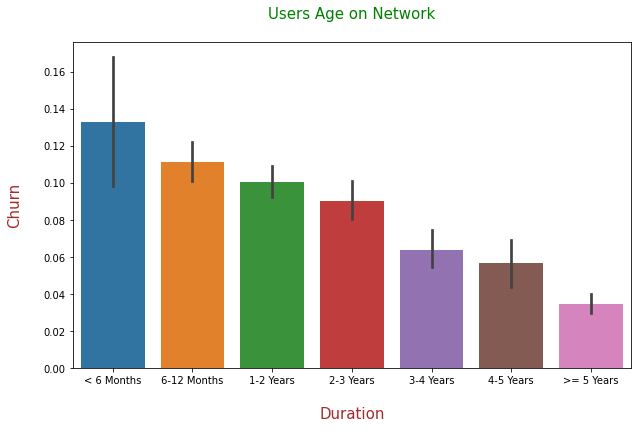

In [ ]:
# To get graphical representation of the users Age on Network
plt.figure(figsize=[10,6])
sns.barplot(x='NW_Duration',y='churn', data=Tele_Churn_NW)
plt.title("Users Age on Network\n", fontdict={'fontsize':15,'fontweight':5,'color':'Green'})
plt.xlabel("\nDuration\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Churn\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


In [ ]:
# To check the shape of the dataframe
Tele_Churn_NW.shape


(20031, 61)

In [ ]:
# Checking the percentage of missing values
round(100*(Tele_Churn_NW.isnull().sum()/len(Tele_Churn_NW.index)), 2)


mobile_number                 0.0
arpu_8                        0.0
total_og_mou_6                0.0
total_og_mou_7                0.0
total_og_mou_8                0.0
total_ic_mou_6                0.0
total_ic_mou_7                0.0
total_ic_mou_8                0.0
total_rech_amt_6              0.0
total_rech_amt_7              0.0
last_day_rch_amt_6            0.0
last_day_rch_amt_7            0.0
last_day_rch_amt_8            0.0
monthly_2g_6                  0.0
monthly_2g_7                  0.0
monthly_2g_8                  0.0
sachet_2g_6                   0.0
sachet_2g_7                   0.0
sachet_2g_8                   0.0
monthly_3g_6                  0.0
monthly_3g_7                  0.0
monthly_3g_8                  0.0
sachet_3g_6                   0.0
sachet_3g_7                   0.0
sachet_3g_8                   0.0
Total_data_rech_amt_6         0.0
Total_data_rech_amt_7         0.0
Total_data_rech_amt_8         0.0
Avrg_rchg_Amt_Good_Phase      0.0
Overall_Usage 

In [ ]:
# To drop the variable from the Dataframe
Tele_Churn_NW.drop(['NW_Duration'], axis=1, inplace=True)


In [ ]:
# To check the sahpe of the Dataframe
Tele_Churn_NW.shape


(20031, 60)

In [ ]:
# To get the heads of the dataframe
Tele_Churn_NW.head()


mobile_number    arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7      7000701601  1417.059         487.530          609.24          350.16   
8      7001524846   137.362         508.360          431.66          171.56   
33     7000149764   409.230           0.000            0.00            0.56   
48     7000294396   179.218        2167.135         1140.66          225.09   
53     7002188521   706.020         614.460          662.78          364.04   

    total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
7          626.460          558.04          428.74              1580   
8          103.860           28.49           16.54               437   
33           7.890            7.19           41.79              1058   
48         982.035          516.43          171.14              1683   
53         847.780          840.03          544.88              1159   

    total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
7              790.0                   0                   0   
8              601.0                  50                   0   
33            1727.5                 252                   0   
48             580.0                 250                 110   
53            1372.0                   0                 130   

    last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  sachet_2g_6  \
7                  252             0             0             0            0   
8                   10             0             1             0            0   
33                 252             0             0             0            0   
48                 130             0             0             0            0   
53                 130             0             0             0            4   

    sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7             0            0             0             0             0   
8             1            3             0             0             0   
33            0            0             2             2             1   
48            0            0             0             0             0   
53            5            1             0             0             0   

    sachet_3g_6  sachet_3g_7  sachet_3g_8  Total_data_rech_amt_6  \
7             0            0            0                    0.0   
8             0            0            0                    0.0   
33            1            2            0                 2540.0   
48            0            0            0                    0.0   
53            0            0            0                  344.0   

    Total_data_rech_amt_7  Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  \
7                     0.0                    0.0                    1185.0   
8                   354.0                  207.0                     696.0   
33                 3003.0                  455.0                    3362.0   
48                    0.0                    0.0                    1448.5   
53                  575.0                   23.0                    1725.0   

    Overall_Usage  churn  t_days_rechrg_before_EOM_6  \
7            0.00      1                           3   
8          177.09      0                           5   
33        3792.87      0                           0   
48        3213.82      0                           1   
53        1184.49      0                           1   

    t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
7                            6                           5   1287.14   
8                            0                           1   1287.14   
33                           1                           5   1287.14   
48                           8                           3   1287.14   
53                           0                           5   1287.14   

    Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
7         27.0           844.310           1067.81         

### Step 6: Splitting the Data into Training and Testing Sets

- The very first basic step for regression is performing a train-test split.

In [ ]:
# Create new dataframe from previous one.
Tele_Churn = Tele_Churn_NW.copy(deep=True)


In [ ]:
# Create new dataframe from previous one.
X_Tele_Churn = Tele_Churn.copy(deep=True)


In [ ]:
# To check the shape
X_Tele_Churn.shape


(20031, 60)

In [ ]:
# Putting feature variable to X
X = X_Tele_Churn.drop(['mobile_number', 'churn'], axis=1)
X.head()


arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  total_ic_mou_6  \
7   1417.059         487.530          609.24          350.16         626.460   
8    137.362         508.360          431.66          171.56         103.860   
33   409.230           0.000            0.00            0.56           7.890   
48   179.218        2167.135         1140.66          225.09         982.035   
53   706.020         614.460          662.78          364.04         847.780   

    total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  total_rech_amt_7  \
7           558.04          428.74              1580             790.0   
8            28.49           16.54               437             601.0   
33            7.19           41.79              1058            1727.5   
48          516.43          171.14              1683             580.0   
53          840.03          544.88              1159            1372.0   

    last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  \
7                    0                   0                 252             0   
8                   50                   0                  10             0   
33                 252                   0                 252             0   
48                 250                 110                 130             0   
53                   0                 130                 130             0   

    monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  \
7              0             0            0            0            0   
8              1             0            0            1            3   
33             0             0            0            0            0   
48             0             0            0            0            0   
53             0             0            4            5            1   

    monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
7              0             0             0            0            0   
8              0             0             0            0            0   
33             2             2             1            1            2   
48             0             0             0            0            0   
53             0             0             0            0            0   

    sachet_3g_8  Total_data_rech_amt_6  Total_data_rech_amt_7  \
7             0                    0.0                    0.0   
8             0                    0.0                  354.0   
33            0                 2540.0                 3003.0   
48            0                    0.0                    0.0   
53            0                  344.0                  575.0   

    Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  Overall_Usage  \
7                     0.0                    1185.0           0.00   
8                   207.0                     696.0         177.09   
33                  455.0                    3362.0        3792.87   
48                    0.0                    1448.5        3213.82   
53                   23.0                    1725.0        1184.49   

    t_days_rechrg_before_EOM_6  t_days_rechrg_before_EOM_7  \
7                            3                           6   
8                            5                           0   
33                           0                           1   
48                           1                           8   
53                           1                           0   

    t_days_rechrg_before_EOM_8  arpu_6_7  Age_on_N/W  Total_local_og_6  \
7                            5   1287.14        27.0           844.310   
8                            1   1287.14        10.0           756.180   
33                           5   1287.14        44.0             0.000   
48                           3   1287.14        42.0          2073.745   
53                           5   1287.14        23.0           716.690   

    Total_local_og_7  Total_local_og_8  Total_local_ic_6  Total_local_ic_7  \
7      

In [ ]:
# To check the shape
X.shape


(20031, 58)

In [ ]:
# Putting response variable to y
y = X_Tele_Churn['churn']
y.head()


7     1
8     0
33    0
48    0
53    0
Name: churn, dtype: int64

In [ ]:
# To check the shape
y.shape


(20031,)

In [ ]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [ ]:
# To check the shape of the Train data
X_train.shape


(14021, 58)

In [ ]:
# To check the shape of the Test data
X_test.shape


(6010, 58)

In [ ]:
# # Checking the percentage of missing values
round(100*(X_train.isnull().sum()/len(X_train.index)), 2)


arpu_8                        0.0
total_og_mou_6                0.0
total_og_mou_7                0.0
total_og_mou_8                0.0
total_ic_mou_6                0.0
total_ic_mou_7                0.0
total_ic_mou_8                0.0
total_rech_amt_6              0.0
total_rech_amt_7              0.0
last_day_rch_amt_6            0.0
last_day_rch_amt_7            0.0
last_day_rch_amt_8            0.0
monthly_2g_6                  0.0
monthly_2g_7                  0.0
monthly_2g_8                  0.0
sachet_2g_6                   0.0
sachet_2g_7                   0.0
sachet_2g_8                   0.0
monthly_3g_6                  0.0
monthly_3g_7                  0.0
monthly_3g_8                  0.0
sachet_3g_6                   0.0
sachet_3g_7                   0.0
sachet_3g_8                   0.0
Total_data_rech_amt_6         0.0
Total_data_rech_amt_7         0.0
Total_data_rech_amt_8         0.0
Avrg_rchg_Amt_Good_Phase      0.0
Overall_Usage                 0.0
t_days_rechrg_

### Step 7: Rescaling the Features 

In Simple Linear Regression, scaling doesn't impact. When variable has little different interger values then rescale the variables to make them comparable. Without comparable scales, some of the coefficients obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This may be very critical during model evaluation. Therefore standardization or normalization should be used so that the units of all the coefficients would be on the same scale. There are two types of rescaling:

1. Standardisation (mean-0, sigma-1)
2. Min-Max scaling : Between 0 and 1

Here, I will use Standardize scaling.


In [ ]:
# To check all the variables
X.head()


arpu_6    arpu_7    arpu_8  total_og_mou_6  total_og_mou_7  \
7   1069.1800  1349.850  1417.059         487.530          609.24   
8    378.7210   492.223   137.362         508.360          431.66   
33   977.0200  1425.933   409.230           0.000            0.00   
48  1403.2875   575.927   179.218        2167.135         1140.66   
53   978.0770  1141.296   706.020         614.460          662.78   

    total_og_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
7           350.16         626.460          558.04          428.74   
8           171.56         103.860           28.49           16.54   
33            0.56           7.890            7.19           41.79   
48          225.09         982.035          516.43          171.14   
53          364.04         847.780          840.03          544.88   

    last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  \
7                    0                   0                 252             0   
8                   50                   0                  10             0   
33                 252                   0                 252             0   
48                 250                 110                 130             0   
53                   0                 130                 130             0   

    monthly_2g_7  monthly_2g_8  sachet_2g_6  sachet_2g_7  sachet_2g_8  \
7              0             0            0            0            0   
8              1             0            0            1            3   
33             0             0            0            0            0   
48             0             0            0            0            0   
53             0             0            4            5            1   

    monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
7              0             0             0            0            0   
8              0             0             0            0            0   
33             2             2             1            1            2   
48             0             0             0            0            0   
53             0             0             0            0            0   

    sachet_3g_8  Total_data_rech_amt_6  Total_data_rech_amt_7  \
7             0                    0.0                    0.0   
8             0                    0.0                  354.0   
33            0                 2540.0                 3003.0   
48            0                    0.0                    0.0   
53            0                  344.0                  575.0   

    Total_data_rech_amt_8  Avrg_rchg_Amt_Good_Phase  Overall_Usage  \
7                     0.0                    1185.0           0.00   
8                   207.0                     696.0         177.09   
33                  455.0                    3362.0        3792.87   
48                    0.0                    1448.5        3213.82   
53                   23.0                    1725.0        1184.49   

    t_days_rechrg_before_EOM_6  t_days_rechrg_before_EOM_7  \
7                            3                           6   
8                            5                           0   
33                           0                           1   
48                           1                           8   
53                           1                           0   

    t_days_rechrg_before_EOM_8   Age_on_N/W  Total_local_og_6  \
7                            5    2-5 Years           844.310   
8                            1  6-12 Months           756.180   
33                           5    2-5 Years             0.000   
48                           3    2-5 Years          2073.745   
53                           5    1-2 Years           716.690   

    Total_local_og_7  Total_local_og_8  Total_local_ic_6  Total_local_ic_7  \
7            1067.81            511.58            855.74            710.44   
8             576.35            133.22            162.85             47.65

In [ ]:
# To check the shape of the Dataframe
X.shape


(20031, 57)

In [ ]:
# To collect all the numerical variables
Tele_Churn_num = X.select_dtypes(include = ['int64','float64']).columns.tolist()
Tele_Churn_num


['arpu_6',
 'arpu_7',
 'arpu_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'Total_data_rech_amt_6',
 'Total_data_rech_amt_7',
 'Total_data_rech_amt_8',
 'Avrg_rchg_Amt_Good_Phase',
 'Overall_Usage',
 't_days_rechrg_before_EOM_6',
 't_days_rechrg_before_EOM_7',
 't_days_rechrg_before_EOM_8',
 'Total_local_og_6',
 'Total_local_og_7',
 'Total_local_og_8',
 'Total_local_ic_6',
 'Total_local_ic_7',
 'Total_local_ic_8',
 'Total_std_ic_6',
 'Total_std_ic_7',
 'Total_std_ic_8',
 'Total_std_og_6',
 'Total_std_og_7',
 'Total_std_og_8',
 'Total_othrs_ic_6',
 'Total_othrs_ic_7',
 'Total_othrs_ic_8',
 'Total_othrs_og_6',
 'Total_othrs_og_7',
 'Total_othrs_og_8',
 '

In [ ]:
# Do scaling on the variables
X_Tele_Churn_scaler = StandardScaler()


In [ ]:
# To Fit all the Train data
X_train[Tele_Churn_num] = X_Tele_Churn_scaler.fit_transform(X_train[Tele_Churn_num])


In [ ]:
# To Fit all the Test data
X_test[Tele_Churn_num] = X_Tele_Churn_scaler.transform(X_test[Tele_Churn_num])


In [ ]:
# To check null values
X_train.isnull().sum()


arpu_6                           0
arpu_7                           0
arpu_8                           0
total_og_mou_6                   0
total_og_mou_7                   0
total_og_mou_8                   0
total_ic_mou_6                   0
total_ic_mou_7                   0
total_ic_mou_8                   0
last_day_rch_amt_6               0
last_day_rch_amt_7               0
last_day_rch_amt_8               0
monthly_2g_6                     0
monthly_2g_7                     0
monthly_2g_8                     0
sachet_2g_6                      0
sachet_2g_7                      0
sachet_2g_8                      0
monthly_3g_6                     0
monthly_3g_7                     0
monthly_3g_8                     0
sachet_3g_6                      0
sachet_3g_7                      0
sachet_3g_8                      0
Total_data_rech_amt_6            0
Total_data_rech_amt_7            0
Total_data_rech_amt_8            0
Avrg_rchg_Amt_Good_Phase         0
Overall_Usage       

In [ ]:
# To see the type of each column
X_train.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14021 entries, 73381 to 28425
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   arpu_6                      14021 non-null  float64 
 1   arpu_7                      14021 non-null  float64 
 2   arpu_8                      14021 non-null  float64 
 3   total_og_mou_6              14021 non-null  float64 
 4   total_og_mou_7              14021 non-null  float64 
 5   total_og_mou_8              14021 non-null  float64 
 6   total_ic_mou_6              14021 non-null  float64 
 7   total_ic_mou_7              14021 non-null  float64 
 8   total_ic_mou_8              14021 non-null  float64 
 9   last_day_rch_amt_6          14021 non-null  float64 
 10  last_day_rch_amt_7          14021 non-null  float64 
 11  last_day_rch_amt_8          14021 non-null  float64 
 12  monthly_2g_6                14021 non-null  float64 
 13  monthly_2g_7

In [ ]:
# To see the type of each column
X_test.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6010 entries, 55884 to 31988
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   arpu_8                      6010 non-null   float64
 1   total_og_mou_6              6010 non-null   float64
 2   total_og_mou_7              6010 non-null   float64
 3   total_og_mou_8              6010 non-null   float64
 4   total_ic_mou_6              6010 non-null   float64
 5   total_ic_mou_7              6010 non-null   float64
 6   total_ic_mou_8              6010 non-null   float64
 7   total_rech_amt_6            6010 non-null   float64
 8   total_rech_amt_7            6010 non-null   float64
 9   last_day_rch_amt_6          6010 non-null   float64
 10  last_day_rch_amt_7          6010 non-null   float64
 11  last_day_rch_amt_8          6010 non-null   float64
 12  monthly_2g_6                6010 non-null   float64
 13  monthly_2g_7                

### Handeling Data Imbalance

##### With the help of SMOTE(Synthetic Minority Oversampling Technique) minority class elements has been synthesize with already exisitng elements.
  But as this technique is an oversampling technique which may increase the data in the dataframe and which may create an issue, therefore we may use **Weight Balancing** technique.


### Model Selection
#### Inferences
- By using various modeling techniques and on the basis of best value of AUC I will decide the best model to work and get final features. 

### Step 8. Building the model using statsmodel, for the detailed statistics.

### Modeling Tecnique 1. 
**RFE with Logistic Regression**
- This time, we will be using the **Logistic Regression function from SciKit Learn** for its compatibility with **RFE** (which is a utility from sklearn).

In [ ]:
# Logistic regression model
Churn_logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(Churn_logm1.fit().summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                14021
Model:                            GLM   Df Residuals:                    13963
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Sep 2021   Deviance:                          nan
Time:                        06:21:47   Pearson chi2:                 1.52e-05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
arpu_8              

### Checking VIF

Variance inflation Factor or VIF, gives a basic quantitative idea how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $


### We could have:
- High P-value, High VIF---Remove these variables
- High-low:
     - High P, low VIF--- Remove these variables first
     - Low P, high VIF--- Remove these after the one above
     - Low P, Low VIF--- Keep these variables
     
     
 - VIF Values
      - VIF < 5 is Good --- no need to eliminate this variable
      - VIF > 5 can be Okay --- need to inspect
      - VIF > 10 is definitely high and the respective variable need to remove
 
 - P value < 0.05 is Good.
 

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif_1 = pd.DataFrame()
col_1 = X_train.columns
vif_1['Features'] = X_train[col_1].columns
vif_1['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif_1['VIF'] = round(vif_1['VIF'], 2)
vif_1 = vif_1.sort_values(by = "VIF", ascending = False)
vif_1


Features    VIF
2               total_og_mou_7  53.98
44              Total_std_og_7  46.98
3               total_og_mou_8  43.51
1               total_og_mou_6  40.11
5               total_ic_mou_7  33.82
43              Total_std_og_6  33.57
45              Total_std_og_8  32.23
38            Total_local_ic_7  32.05
6               total_ic_mou_8  28.41
4               total_ic_mou_6  27.09
39            Total_local_ic_8  26.31
37            Total_local_ic_6  25.14
35            Total_local_og_7  20.34
36            Total_local_og_8  16.50
34            Total_local_og_6  15.66
27    Avrg_rchg_Amt_Good_Phase  11.87
25       Total_data_rech_amt_7   9.33
24       Total_data_rech_amt_6   8.30
0                       arpu_8   6.42
16                 sachet_2g_7   6.04
41              Total_std_ic_7   5.70
8             total_rech_amt_7   5.62
7             total_rech_amt_6   5.26
26       Total_data_rech_amt_8   5.18
17                 sachet_2g_8   5.09
15                 sachet_2g_6   5.04
42              Total_std_ic_8   4.64
40              Total_std_ic_6   4.63
57          Total_data_2g_3g_8   4.57
56          Total_data_2g_3g_7   4.54
55          Total_data_2g_3g_6   3.89
20                monthly_3g_8   3.79
19                monthly_3g_7   3.70
18                monthly_3g_6   3.49
47            Total_othrs_ic_7   2.75
46            Total_othrs_ic_6   2.46
48            Total_othrs_ic_8   2.40
13                monthly_2g_7   2.23
28               Overall_Usage   2.17
22                 sachet_3g_7   2.12
12                monthly_2g_6   2.09
14                monthly_2g_8   2.08
23                 sachet_3g_8   1.82
53                Total_roam_7   1.81
21                 sachet_3g_6   1.78
54                Total_roam_8   1.69
52                Total_roam_6   1.66
50            Total_othrs_og_7   1.65
9           last_day_rch_amt_6   1.58
51            Total_othrs_og_8   1.58
49            Total_othrs_og_6   1.56
10          last_day_rch_amt_7   1.54
11          last_day_rch_amt_8   1.49
29  t_days_rechrg_before_EOM_6   1.39
31  t_days_rechrg_before_EOM_8   1.37
30  t_days_rechrg_before_EOM_7   1.36
33                  Age_on_N/W   1.16
32                    arpu_6_7   1.00

In [ ]:
# To check shape of the train data
X_train.shape


(14021, 58)

#### Feature Selection Using RFE.
- By using class weight balancing technique.

In [ ]:
# Running RFE with the output number of the variable equal to 25 (1: Churned Users (7.9%), 0: Not Churned Users(92.09%))
lgreg_churn = LogisticRegression(class_weight= {1:0.92, 0:0.079})
lgreg_churn.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight={0: 0.079, 1: 0.92}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Running RFE
churn_rfe = RFE(lgreg_churn, 25)            
churn_rfe = churn_rfe.fit(X_train, y_train)


In [ ]:
# To make a list of ranked RFE columns
list(zip(X_train.columns, churn_rfe.support_, churn_rfe.ranking_))


[('arpu_8', False, 2),
 ('total_og_mou_6', False, 21),
 ('total_og_mou_7', False, 5),
 ('total_og_mou_8', False, 17),
 ('total_ic_mou_6', False, 26),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('total_rech_amt_6', True, 1),
 ('total_rech_amt_7', True, 1),
 ('last_day_rch_amt_6', False, 24),
 ('last_day_rch_amt_7', False, 10),
 ('last_day_rch_amt_8', True, 1),
 ('monthly_2g_6', True, 1),
 ('monthly_2g_7', False, 30),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 13),
 ('sachet_2g_7', True, 1),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', False, 32),
 ('monthly_3g_7', False, 4),
 ('monthly_3g_8', False, 15),
 ('sachet_3g_6', False, 25),
 ('sachet_3g_7', True, 1),
 ('sachet_3g_8', True, 1),
 ('Total_data_rech_amt_6', False, 28),
 ('Total_data_rech_amt_7', False, 12),
 ('Total_data_rech_amt_8', False, 16),
 ('Avrg_rchg_Amt_Good_Phase', False, 11),
 ('Overall_Usage', True, 1),
 ('t_days_rechrg_before_EOM_6', False, 20),
 ('t_days_rechrg_before_EOM_7', True, 1),
 ('t_

In [ ]:
# To collect the columns supported by RFE
col_churn = X_train.columns[churn_rfe.support_]
col_churn


Index(['total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6',
       'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_7',
       'sachet_3g_8', 'Overall_Usage', 't_days_rechrg_before_EOM_7',
       't_days_rechrg_before_EOM_8', 'Age_on_N/W', 'Total_local_ic_6',
       'Total_local_ic_7', 'Total_local_ic_8', 'Total_std_ic_6',
       'Total_std_ic_8', 'Total_std_og_6', 'Total_othrs_og_8', 'Total_roam_7',
       'Total_roam_8', 'Total_data_2g_3g_6'],
      dtype='object')

In [ ]:
# To drop rest of the data from RFE
X_train.columns[~churn_rfe.support_]


Index(['arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'monthly_2g_7', 'sachet_2g_6', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'Total_data_rech_amt_6',
       'Total_data_rech_amt_7', 'Total_data_rech_amt_8',
       'Avrg_rchg_Amt_Good_Phase', 't_days_rechrg_before_EOM_6', 'arpu_6_7',
       'Total_local_og_6', 'Total_local_og_7', 'Total_local_og_8',
       'Total_std_ic_7', 'Total_std_og_7', 'Total_std_og_8',
       'Total_othrs_ic_6', 'Total_othrs_ic_7', 'Total_othrs_ic_8',
       'Total_othrs_og_6', 'Total_othrs_og_7', 'Total_roam_6',
       'Total_data_2g_3g_7', 'Total_data_2g_3g_8'],
      dtype='object')

##### Model 2.

In [ ]:
# Adding A variable
X_train_add = sm.add_constant(X_train[col_churn])

# Running the model
churn_logm2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
churn_res = churn_logm2.fit()


In [ ]:
# To print 
print(churn_res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                14021
Model:                            GLM   Df Residuals:                    13963
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Sep 2021   Deviance:                          nan
Time:                        06:23:21   Pearson chi2:                 1.52e-05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
arpu_8              

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
churn_vif = pd.DataFrame()
churn_vif['Features'] = X_train[col_churn].columns
churn_vif['VIF'] = [variance_inflation_factor(X_train[col_churn].values, i) for i in range(X_train[col_churn].shape[1])]
churn_vif['VIF'] = round(churn_vif['VIF'], 2)
churn_vif = churn_vif.sort_values(by = "VIF", ascending = False)
round(churn_vif,2)


Features    VIF
1               total_ic_mou_8  22.14
17            Total_local_ic_8  21.11
16            Total_local_ic_7  19.94
0               total_ic_mou_7  16.63
15            Total_local_ic_6   4.21
19              Total_std_ic_8   3.06
7                  sachet_2g_7   2.59
8                  sachet_2g_8   2.46
18              Total_std_ic_6   2.28
2             total_rech_amt_6   2.04
3             total_rech_amt_7   1.90
20              Total_std_og_6   1.90
11               Overall_Usage   1.61
24          Total_data_2g_3g_6   1.47
5                 monthly_2g_6   1.47
10                 sachet_3g_8   1.45
9                  sachet_3g_7   1.44
22                Total_roam_7   1.44
23                Total_roam_8   1.43
6                 monthly_2g_8   1.42
4           last_day_rch_amt_8   1.28
12  t_days_rechrg_before_EOM_7   1.27
13  t_days_rechrg_before_EOM_8   1.26
14                  Age_on_N/W   1.13
21            Total_othrs_og_8   1.09

In [ ]:
# Dropping a variable which has higher P and/or higher VIF value
col_churn = col_churn.drop('total_ic_mou_8',1)


In [ ]:
# To see the variables
col_churn


Index(['total_ic_mou_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_7', 'sachet_3g_8', 'Overall_Usage',
       't_days_rechrg_before_EOM_7', 't_days_rechrg_before_EOM_8',
       'Age_on_N/W', 'Total_local_ic_6', 'Total_local_ic_7',
       'Total_local_ic_8', 'Total_std_ic_6', 'Total_std_ic_8',
       'Total_std_og_6', 'Total_othrs_og_8', 'Total_roam_7', 'Total_roam_8',
       'Total_data_2g_3g_6'],
      dtype='object')

In [ ]:
# To check shape
col_churn.shape


(24,)

#### Model 3.

In [ ]:
# Adding A variable
X_train_add = sm.add_constant(X_train[col_churn])

# Running the model
churn_logm3 = sm.GLM(y_train, X_train_add, family = sm.families.Binomial())
churn_res = churn_logm3.fit()


In [ ]:
# To print 
print(churn_res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                14021
Model:                            GLM   Df Residuals:                    13996
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Sep 2021   Deviance:                          nan
Time:                        06:23:47   Pearson chi2:                 2.48e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
churn_vif = pd.DataFrame()
churn_vif['Features'] = X_train[col_churn].columns
churn_vif['VIF'] = [variance_inflation_factor(X_train[col_churn].values, i) for i in range(X_train[col_churn].shape[1])]
churn_vif['VIF'] = round(churn_vif['VIF'], 2)
churn_vif = churn_vif.sort_values(by = "VIF", ascending = False)
churn_vif


Features    VIF
15            Total_local_ic_7  14.43
0               total_ic_mou_7  10.07
16            Total_local_ic_8   4.56
14            Total_local_ic_6   4.20
6                  sachet_2g_7   2.59
7                  sachet_2g_8   2.46
17              Total_std_ic_6   2.20
18              Total_std_ic_8   2.17
1             total_rech_amt_6   2.04
2             total_rech_amt_7   1.90
19              Total_std_og_6   1.89
10               Overall_Usage   1.61
23          Total_data_2g_3g_6   1.47
4                 monthly_2g_6   1.47
9                  sachet_3g_8   1.45
8                  sachet_3g_7   1.44
21                Total_roam_7   1.44
5                 monthly_2g_8   1.42
22                Total_roam_8   1.42
3           last_day_rch_amt_8   1.28
11  t_days_rechrg_before_EOM_7   1.27
12  t_days_rechrg_before_EOM_8   1.26
13                  Age_on_N/W   1.13
20            Total_othrs_og_8   1.09

#### Model 4.

In [ ]:
# Dropping a variable which has higher P and/or higher VIF value
col_churn = col_churn.drop('Total_local_ic_7', 1)


In [ ]:
# To see the variables
col_churn


Index(['total_ic_mou_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_7', 'sachet_3g_8', 'Overall_Usage',
       't_days_rechrg_before_EOM_7', 't_days_rechrg_before_EOM_8',
       'Age_on_N/W', 'Total_local_ic_6', 'Total_local_ic_8', 'Total_std_ic_6',
       'Total_std_ic_8', 'Total_std_og_6', 'Total_othrs_og_8', 'Total_roam_7',
       'Total_roam_8', 'Total_data_2g_3g_6'],
      dtype='object')

In [ ]:
# To check shape
col_churn.shape


(23,)

In [ ]:
# Adding A variable
X_train_add = sm.add_constant(X_train[col_churn])

# Running the model
churn_logm4 = sm.GLM(y_train, X_train_add, family = sm.families.Binomial())
churn_res = churn_logm4.fit()


In [ ]:
# To print 
print(churn_res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                14021
Model:                            GLM   Df Residuals:                    13997
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 13 Sep 2021   Deviance:                          nan
Time:                        06:24:07   Pearson chi2:                 4.52e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
churn_vif = pd.DataFrame()
churn_vif['Features'] = X_train[col_churn].columns
churn_vif['VIF'] = [variance_inflation_factor(X_train[col_churn].values, i) for i in range(X_train[col_churn].shape[1])]
churn_vif['VIF'] = round(churn_vif['VIF'], 2)
churn_vif = churn_vif.sort_values(by = "VIF", ascending = False)
churn_vif


Features   VIF
0               total_ic_mou_7  4.20
15            Total_local_ic_8  3.80
14            Total_local_ic_6  3.54
6                  sachet_2g_7  2.59
7                  sachet_2g_8  2.46
16              Total_std_ic_6  2.08
1             total_rech_amt_6  2.04
17              Total_std_ic_8  2.03
2             total_rech_amt_7  1.89
18              Total_std_og_6  1.89
10               Overall_Usage  1.60
22          Total_data_2g_3g_6  1.47
4                 monthly_2g_6  1.47
9                  sachet_3g_8  1.45
8                  sachet_3g_7  1.44
20                Total_roam_7  1.43
5                 monthly_2g_8  1.42
21                Total_roam_8  1.42
3           last_day_rch_amt_8  1.28
11  t_days_rechrg_before_EOM_7  1.27
12  t_days_rechrg_before_EOM_8  1.26
13                  Age_on_N/W  1.13
19            Total_othrs_og_8  1.09

##### Inferences:
- This final model (4) seems to be good as all 'P' and 'VIF' values are in control.


In [ ]:
# To check various columns and their respective value
X_train_add.head()


const  total_ic_mou_7  total_rech_amt_6  total_rech_amt_7  \
73381    1.0       -0.894095         -1.377740         -1.427454   
55215    1.0        2.620316         -0.160175          0.688854   
88606    1.0       -0.022116         -0.256733         -0.405867   
780      1.0       -0.181377          0.503951         -0.152184   
45132    1.0        0.176657          0.513371         -0.517853   

       last_day_rch_amt_8  monthly_2g_6  monthly_2g_8  sachet_2g_7  \
73381            0.174687     -0.445969     -0.414884     1.056226   
55215            2.009799      2.242308      2.410315    -0.571354   
88606            0.556009     -0.445969     -0.414884     2.276911   
780             -0.993111     -0.445969     -0.414884    -0.571354   
45132           -0.993111     -0.445969     -0.414884    -0.571354   

       sachet_2g_8  sachet_3g_7  sachet_3g_8  Overall_Usage  \
73381    -0.068114     3.563738    -0.350240      -0.539030   
55215    -0.519880    -0.369136    -0.350240       1.468922   
88606     2.190715     1.597301     2.855186      -0.297740   
780      -0.519880    -0.369136    -0.350240      -1.250922   
45132    -0.519880    -0.369136    -0.350240      -0.826122   

       t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  Age_on_N/W  \
73381                   -0.584703                    1.031059   -0.576161   
55215                   -0.841408                   -0.448427    1.399011   
88606                   -0.071294                   -0.871137    2.123240   
780                      0.698820                    0.185639   -0.773678   
45132                   -0.584703                    2.933256    2.123240   

       Total_local_ic_6  Total_local_ic_8  Total_std_ic_6  Total_std_ic_8  \
73381         -0.654626         -0.792627       -0.639366       -0.639722   
55215          0.800466          0.677649       -0.605308       -0.639722   
88606          0.035670          0.286369       -0.453420       -0.547019   
780            0.029285         -0.955105       -0.389332       -0.639722   
45132          0.334829          0.008426       -0.536734       -0.328637   

       Total_std_og_6  Total_othrs_og_8  Total_roam_7  Total_roam_8  \
73381       -0.647989         -0.592045     -0.355868     -0.355536   
55215       -0.647989         -0.613374     -0.355868     -0.355536   
88606       -0.122896          1.299169     -0.355868     -0.355536   
780          2.682274         -0.613374      0.261219     -0.342601   
45132       -0.647989         -0.613374     -0.355868     -0.355536   

       Total_data_2g_3g_6  
73381           -0.448767  
55215           -0.070823  
88606            0.125871  
780             -0.747134  
45132           -0.725314

In [ ]:
# To check the shape of dataframe
X_train_add.shape


(14021, 24)

##### Getting the predicted values on the train set

In [ ]:
# Getting the predicted values on the train set
y_train_pred = churn_res.predict(X_train_add)
y_train_pred[:10]


73381    0.0
55215    0.0
88606    0.0
780      1.0
45132    0.0
38191    0.0
23217    0.0
79147    0.0
59938    0.0
30762    0.0
dtype: float64

In [ ]:
# Getting the predicted values on the train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

#### Creating a dataframe with the actual Conversion flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_ID'] = y_train.index
y_train_pred_final.head()


Churn  Churn_Prob  Churn_ID
0      0         0.0     73381
1      0         0.0     55215
2      0         0.0     88606
3      1         1.0       780
4      0         0.0     45132

In [ ]:
# To rearrange the columns
y_train_pred_final = y_train_pred_final[["Churn_ID", "Churn", "Churn_Prob"]]


In [ ]:
# To check the column values
y_train_pred_final.head()


Churn_ID  Churn  Churn_Prob
0     73381      0         0.0
1     55215      0         0.0
2     88606      0         0.0
3       780      1         1.0
4     45132      0         0.0

##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
# Creating new column
y_train_pred_final['Churn_Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


Churn_ID  Churn  Churn_Prob  Churn_Predicted
0     73381      0         0.0                0
1     55215      0         0.0                0
2     88606      0         0.0                0
3       780      1         1.0                1
4     45132      0         0.0                0

In [ ]:
# Confusion matrix 
churn_rfe_confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)
churn_rfe_confusion


array([[11926,   994],
       [   10,  1091]])

In [ ]:
# Let's see the Overall Accuracy.
Over_Churn_Acc = round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted), 2)
print("Overall Accuracy: ", Over_Churn_Acc*100)


Overall Accuracy:  93.0


##### The overall accuracy of the model is **93%**.

#### Plotting of ROC Curve
- An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [ ]:
# Find out the ROC variables
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted, drop_intermediate = False )


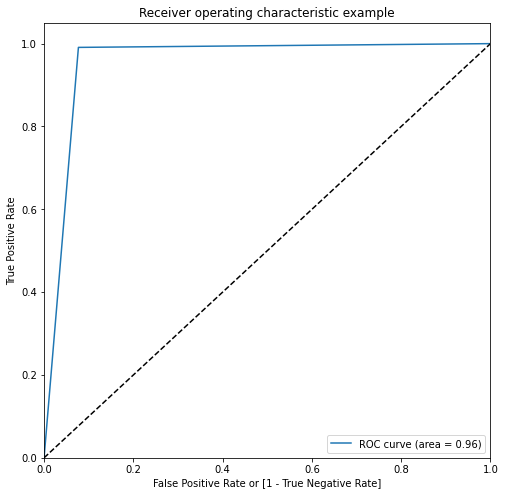

In [ ]:
# To draw ROC curve 
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)


#### Inferences:
- Here Area under the ROC curve  (AUC) is **96**%.

##### To get Confusion Matrix, Sensitivity, Sfecitivity, Precision, Recall and F1-Score for this model.

In [ ]:
# To get Tp, TN, FP, FN
TP_rfe = churn_rfe_confusion[1,1] # true positive 
TN_rfe = churn_rfe_confusion[0,0] # true negatives
FP_rfe = churn_rfe_confusion[0,1] # false positives
FN_rfe = churn_rfe_confusion[1,0] # false negatives


In [ ]:
# Check the Sensitivity of our logistic regression model
Churn_Sens_rf = (round(TP_rfe / float(TP_rfe + FN_rfe),2)*100)
print("Sensitivity: ", Churn_Sens_rf)


Sensitivity:  99.0


In [ ]:
# Check the calculated Specificity
Churn_Spec_rf = (round(TN_rfe / float(TN_rfe + FP_rfe),2)*100)
print("Specificity: ", Churn_Spec_rf)


Specificity:  92.0


In [ ]:
# # Calculate False Postive Rate - predicting conversion when user doesn't churned
# FPR_rfe = (round(FP_rfe/float(TN_rfe+FP_rfe),2)*100)
# print("FPR: ", FPR_rfe)


In [ ]:
# # Positive Predictive value 
# PP_rfe = (round(TP_rfe / float(TP_rfe+FP_rfe),2)*100)
# print("Positive Predicitve: ", PP_rfe)


In [ ]:
# # Negative Predictive Value
# NP_rfe = (round(TN_rfe / float(TN_rfe + FN_rfe),2)*100)
# print("Negative Predictive: ", NP_rfe)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     12920
           1       0.52      0.99      0.68      1101

    accuracy                           0.93     14021
   macro avg       0.76      0.96      0.82     14021
weighted avg       0.96      0.93      0.94     14021



In [ ]:
# To find out Precision Score
pre_churn_rfe = (round(precision_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted),2)*100)
print("Precision: ",pre_churn_rfe)


Precision:  52.0


In [ ]:
# To find out Recall Score
recall_churn_rfe = (round(recall_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted),2)*100)
print("Recall: ", recall_churn_rfe)


Recall:  99.0


In [ ]:
# To get the F1-Score 
F1_Score_rfe = round(2*((pre_churn_rfe * recall_churn_rfe)/(pre_churn_rfe + recall_churn_rfe)),2)
print("F1-Score: ", F1_Score_rfe)


F1-Score:  68.19


#### Inferences RFE before Optimal Point:
- AUC - **96%**
- Accuracy - **93%**
- Sensitivity - **99%**
- Specificity - **92%**
- Precision - **52%**
- Recall - **99%**
- F-Score - **68.19%**


#### Finding Optimal Cutoff Point
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs 
rfe_numbers = [float(x)/10 for x in range(10)]
for i in rfe_numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)


In [ ]:
# To check the head
y_train_pred_final.head(30)


Churn_ID  Churn  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  \
0      73381      0         0.0                0    0    0    0    0    0   
1      55215      0         0.0                0    0    0    0    0    0   
2      88606      0         0.0                0    0    0    0    0    0   
3        780      1         1.0                1    1    1    1    1    1   
4      45132      0         0.0                0    0    0    0    0    0   
5      38191      0         0.0                0    0    0    0    0    0   
6      23217      0         0.0                0    0    0    0    0    0   
7      79147      0         0.0                0    0    0    0    0    0   
8      59938      0         0.0                0    0    0    0    0    0   
9      30762      0         0.0                0    0    0    0    0    0   
10     76511      0         0.0                0    0    0    0    0    0   
11     60992      1         1.0                1    1    1    1    1    1   
12     86176      0         0.0                0    0    0    0    0    0   
13     88379      0         0.0                0    0    0    0    0    0   
14     54522      0         0.0                0    0    0    0    0    0   
15     34366      0         1.0                1    1    1    1    1    1   
16     95242      0         0.0                0    0    0    0    0    0   
17       889      0         0.0                0    0    0    0    0    0   
18     71989      0         0.0                0    0    0    0    0    0   
19     72190      0         0.0                0    0    0    0    0    0   
20     33636      0         0.0                0    0    0    0    0    0   
21     30815      0         0.0                0    0    0    0    0    0   
22     84074      0         0.0                0    0    0    0    0    0   
23     23263      0         0.0                0    0    0    0    0    0   
24     38285      0         0.0                0    0    0    0    0    0   
25     58997      0         0.0                0    0    0    0    0    0   
26     29035      0         0.0                0    0    0    0    0    0   
27     22489      0         0.0                0    0    0    0    0    0   
28     10595      0         0.0                0    0    0    0    0    0   
29     89342      0         0.0                0    0    0    0    0    0   

    0.5  0.6  0.7  0.8  0.9  
0     0    0    0    0    0  
1     0    0    0    0    0  
2     0    0    0    0    0  
3     1    1    1    1    1  
4     0    0    0    0    0  
5     0    0    0    0    0  
6     0    0    0    0    0  
7     0    0    0    0    0  
8     0    0    0    0    0  
9     0    0    0    0    0  
10    0    0    0    0    0  
11    1    1    1    1    1  
12    0    0    0    0    0  
13    0    0    0    0    0  
14    0    0    0    0    0  
15    1    1    1    1    1  
16    0    0    0    0    0  
17    0    0    0    0    0  
18    0    0    0    0    0  
19    0    0    0    0    0  
20    0    0    0    0    0  
21    0    0    0    0    0  
22    0    0    0    0    0  
23    0    0    0    0    0  
24    0    0    0    0    0  
25    0    0    0    0    0  
26    0    0    0    0    0  
27    0    0    0    0    0  
28    0    0    0    0    0  
29    0    0    0    0    0

In [ ]:
# Now let's calculate Accuracy, Sensitivity, Specificity, Precision and Recall for various probability cutoffs.
cutoff_rfe = pd.DataFrame(columns = ['Churn_Probs','Accuracy', 'Specificity', 'Sensitivity','Precision', 'Recall'])

# TP_rfe = churn_rfe_confusion[1,1] # true positive 
# TN_rfe = churn_rfe_confusion[0,0] # true negatives
# FP_rfe = churn_rfe_confusion[0,1] # false positives
# FN_rfe = churn_rfe_confusion[1,0] # false negatives

num_rfe = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num_rfe:
    cm1_rfe = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i])
    total1=sum(sum(cm1_rfe))
    
    accuracy = (cm1_rfe[0,0]+cm1_rfe[1,1])/total1

    speci = cm1_rfe[0,0]/(cm1_rfe[0,0]+cm1_rfe[0,1])
    sensi = cm1_rfe[1,1]/(cm1_rfe[1,0]+cm1_rfe[1,1])

    Preci = (round(precision_score(y_train_pred_final.Churn, y_train_pred_final[i]),2)*100)
    Recall = (round(recall_score(y_train_pred_final.Churn, y_train_pred_final[i]),2)*100)
    
    cutoff_rfe.loc[i] =[i, accuracy, speci, sensi, Preci, Recall]


In [ ]:
# To check output
cutoff_rfe
    

Churn_Probs  Accuracy  Specificity  Sensitivity  Precision  Recall
0.0          0.0  0.928393     0.923065     0.990917       52.0    99.0
0.1          0.1  0.928393     0.923065     0.990917       52.0    99.0
0.2          0.2  0.928393     0.923065     0.990917       52.0    99.0
0.3          0.3  0.928393     0.923065     0.990917       52.0    99.0
0.4          0.4  0.928393     0.923065     0.990917       52.0    99.0
0.5          0.5  0.928393     0.923065     0.990917       52.0    99.0
0.6          0.6  0.928393     0.923065     0.990917       52.0    99.0
0.7          0.7  0.928393     0.923065     0.990917       52.0    99.0
0.8          0.8  0.928393     0.923065     0.990917       52.0    99.0
0.9          0.9  0.928393     0.923065     0.990917       52.0    99.0

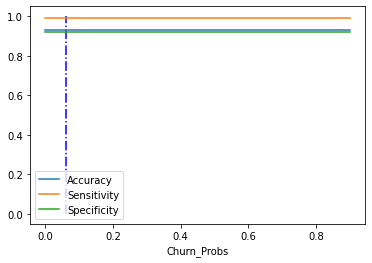

In [ ]:
# To plot accuracy sensitivity and specificity for various probabilities.
cutoff_rfe.plot.line(x='Churn_Probs', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(0.06, ymax=1, ymin=0, colors='blue',linestyles='dashdot')
plt.legend()
plt.show()


In [ ]:
# Selecting 0.06 as a Cut-off point.
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.06 else 0)
y_train_pred_final.head()


Churn_ID  Churn  Churn_Prob  Churn_Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0     73381      0         0.0                0    0    0    0    0    0    0   
1     55215      0         0.0                0    0    0    0    0    0    0   
2     88606      0         0.0                0    0    0    0    0    0    0   
3       780      1         1.0                1    1    1    1    1    1    1   
4     45132      0         0.0                0    0    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    1                1  
4    0    0    0    0                0

In [ ]:
# Let's see the Overall Accuracy.
Over_Churn_Acc_2 = round(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted), 2)
print("Overall Accuracy: ", Over_Churn_Acc_2*100)


Overall Accuracy:  93.0


In [ ]:
# To get confusion matrics
churn_rfe_confusion_2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted)
churn_rfe_confusion_2


array([[11926,   994],
       [   10,  1091]])

In [ ]:
# To get Tp, TN, FP, FN
TP_rfe_2 = churn_rfe_confusion_2[1,1] # true positive 
TN_rfe_2 = churn_rfe_confusion_2[0,0] # true negatives
FP_rfe_2 = churn_rfe_confusion_2[0,1] # false positives
FN_rfe_2 = churn_rfe_confusion_2[1,0] # false negatives


In [ ]:
# Check the Sensitivity of our logistic regression model
Churn_Sens_rf_2 = (round(TP_rfe_2 / float(TP_rfe_2 + FN_rfe_2),2)*100)
print("Sensitivity: ", Churn_Sens_rf_2)


Sensitivity:  99.0


In [ ]:
# Check the calculated Specificity
Churn_Spec_rf_2 = (round(TN_rfe_2 / float(TN_rfe_2 + FP_rfe_2),2)*100)
print("Specificity: ", Churn_Spec_rf_2)


Specificity:  92.0


In [ ]:
# To get model Classification report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.Churn_Predicted))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     12920
           1       0.52      0.99      0.68      1101

    accuracy                           0.93     14021
   macro avg       0.76      0.96      0.82     14021
weighted avg       0.96      0.93      0.94     14021



#### Inferences for RFE on Train Data:
- AUC - **96%**
- Accuracy - **93%**
- Sensitivity - **99%**
- Specificity - **92%**
- Precision - **52%**
- Recall - **99%**
- F-Score - **68%**


#### Prediction on Test Data.

In [ ]:
# To Check shape of the Test data
X_test.shape


(6010, 58)

In [ ]:
# To check the variables of the Test data
X_test.head()


arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
55884  0.089362        1.739370       -1.011929       -0.422023   
70921 -1.142709       -0.942367       -1.000008       -0.831284   
21352 -0.187849       -0.113164        0.180972        0.215812   
75300  0.483584       -0.396403       -0.383932       -0.262179   
90311  0.963893        0.908920        0.666469        0.390038   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
55884        2.617535       -1.060279        1.342764          2.263179   
70921       -0.903082       -0.373559       -0.592291         -1.318864   
21352        1.284656        1.578710        0.974823         -0.449847   
75300        1.325802        0.994616        1.211841          0.442720   
90311        1.377151        1.379569        0.154153          1.026774   

       total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
55884         -1.112065            1.921809            0.295889   
70921         -1.226336           -0.810812           -0.785039   
21352         -0.696117           -0.300723            0.637234   
75300          0.282048           -0.750087           -0.728148   
90311          0.798555            0.221511           -0.500584   

       last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
55884            0.556009     -0.445969     -0.450673     -0.414884   
70921           -0.993111     -0.445969     -0.450673     -0.414884   
21352           -0.993111      2.242308     -0.450673     -0.414884   
75300           -0.635622     -0.445969     -0.450673     -0.414884   
90311            0.722837     -0.445969     -0.450673     -0.414884   

       sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
55884    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
70921     1.642214     2.683806     0.383651     -0.445509     -0.455226   
21352    -0.544192    -0.164459     0.835417     -0.445509     -0.455226   
75300    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
90311    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   

       monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
55884     -0.436588    -0.400488    -0.369136    -0.350240   
70921     -0.436588    -0.400488    -0.369136    -0.350240   
21352     -0.436588    -0.400488     1.597301     2.855186   
75300     -0.436588    -0.400488    -0.369136    -0.350240   
90311     -0.436588    -0.400488    -0.369136    -0.350240   

       Total_data_rech_amt_6  Total_data_rech_amt_7  Total_data_rech_amt_8  \
55884              -0.681481              -0.694835              -0.607654   
70921               0.138354               1.743018              -0.472181   
21352              -0.465661               0.037123               0.356914   
75300              -0.681481              -0.694835              -0.607654   
90311              -0.681481              -0.694835              -0.607654   

       Avrg_rchg_Amt_Good_Phase  Overall_Usage  t_days_rechrg_before_EOM_6  \
55884                 -0.322237       0.183602                   -0.021720   
70921                  0.250820      -0.839740                   -0.277842   
21352                 -0.614316       0.748220                   -0.533965   
75300                 -0.583096      -0.481759                   -0.790088   
90311                 -0.254247      -0.668743                   -0.790088   

       t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
55884                    2.752458                   -0.025717       1.0   
70921                   -0.841408                    0.608349       1.0   
21352                    1.212230                    1.031059       1.0   
75300                   -0.841408                   -0.871137       1.0   
90311                   -0.584703                   -0.025717       1.0   

       Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
55884   -0.773678          2.54

In [ ]:
col_churn

Index(['total_ic_mou_7', 'total_rech_amt_6', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_7', 'sachet_3g_8', 'Overall_Usage',
       't_days_rechrg_before_EOM_7', 't_days_rechrg_before_EOM_8',
       'Age_on_N/W', 'Total_local_ic_6', 'Total_local_ic_8', 'Total_std_ic_6',
       'Total_std_ic_8', 'Total_std_og_6', 'Total_othrs_og_8', 'Total_roam_7',
       'Total_roam_8', 'Total_data_2g_3g_6'],
      dtype='object')

In [ ]:
# Include all the column names in Test data and 
X_test_RFE = X_test[col_churn]
X_test_RFE.head()


total_ic_mou_7  total_rech_amt_6  total_rech_amt_7  last_day_rch_amt_8  \
55884       -1.060279          2.263179         -1.112065            0.556009   
70921       -0.373559         -1.318864         -1.226336           -0.993111   
21352        1.578710         -0.449847         -0.696117           -0.993111   
75300        0.994616          0.442720          0.282048           -0.635622   
90311        1.379569          1.026774          0.798555            0.722837   

       monthly_2g_6  monthly_2g_8  sachet_2g_7  sachet_2g_8  sachet_3g_7  \
55884     -0.445969     -0.414884    -0.571354    -0.519880    -0.369136   
70921     -0.445969     -0.414884     2.683806     0.383651    -0.369136   
21352      2.242308     -0.414884    -0.164459     0.835417     1.597301   
75300     -0.445969     -0.414884    -0.571354    -0.519880    -0.369136   
90311     -0.445969     -0.414884    -0.571354    -0.519880    -0.369136   

       sachet_3g_8  Overall_Usage  t_days_rechrg_before_EOM_7  \
55884    -0.350240       0.183602                    2.752458   
70921    -0.350240      -0.839740                   -0.841408   
21352     2.855186       0.748220                    1.212230   
75300    -0.350240      -0.481759                   -0.841408   
90311    -0.350240      -0.668743                   -0.584703   

       t_days_rechrg_before_EOM_8  Age_on_N/W  Total_local_ic_6  \
55884                   -0.025717   -0.773678          2.640179   
70921                    0.608349   -0.773678         -0.813850   
21352                    1.031059   -0.872437         -0.470934   
75300                   -0.871137    1.333172          1.844194   
90311                   -0.025717   -0.609081          1.340537   

       Total_local_ic_8  Total_std_ic_6  Total_std_ic_8  Total_std_og_6  \
55884          1.292586        0.294209       -0.235551        0.250582   
70921         -0.481644       -0.664085       -0.543280       -0.635404   
21352         -0.628088        3.107064        3.139410       -0.017185   
75300          1.722473       -0.648887       -0.639722       -0.647194   
90311          0.059872        1.673102        1.017897        0.067118   

       Total_othrs_og_8  Total_roam_7  Total_roam_8  Total_data_2g_3g_6  
55884          0.645065      3.632907      3.680953           -0.747134  
70921         -0.613374     -0.355868     -0.355536           -0.361686  
21352          3.020763     -0.355868      0.834814           -0.434695  
75300         -0.613374     -0.355868     -0.355536           -0.747134  
90311         -0.348279     -0.355868      3.680953           -0.747134

In [ ]:
# To check the shape
X_test_RFE.shape


(6010, 23)

In [ ]:
# Adding constant
X_test_sm_RFE = sm.add_constant(X_test_RFE)

# Making prediction
y_test_pred_RFE = churn_res.predict(X_test_sm_RFE)


In [ ]:
# To get predicted data
y_test_pred_RFE[:10]


55884    0.0
70921    0.0
21352    0.0
75300    0.0
90311    0.0
36188    0.0
34016    1.0
85606    0.0
95812    0.0
72559    1.0
dtype: float64

In [ ]:
# Converting y_test_pred to a dataframe 
y_test_pred_RFE_DT = pd.DataFrame(y_test_pred_RFE)


In [ ]:
# To see the variables title
y_test_pred_RFE_DT.head()


0
55884  0.0
70921  0.0
21352  0.0
75300  0.0
90311  0.0

In [ ]:
# To check the shape
y_test.shape


(6010,)

In [ ]:
# To check the head of data
y_test.head()


55884    0
70921    0
21352    0
75300    0
90311    0
Name: churn, dtype: int64

In [ ]:
# Converting y_test to dataframe
y_RFE_test_dt = pd.DataFrame(y_test)


In [ ]:
# To see the variables title
y_RFE_test_dt.head()


churn
55884      0
70921      0
21352      0
75300      0
90311      0

In [ ]:
# Putting Prospect_ID to index
y_RFE_test_dt['Churn_ID'] = y_RFE_test_dt.index


In [ ]:
# To see the variables title
y_RFE_test_dt.head()


churn  Churn_ID
55884      0     55884
70921      0     70921
21352      0     21352
75300      0     75300
90311      0     90311

In [ ]:
# Removing index for both dataframes to append them side by side 
y_test_pred_RFE_DT.reset_index(drop=True, inplace=True)
y_RFE_test_dt.reset_index(drop=True, inplace=True)


In [ ]:
# To append y_test_pred_data and y_test_data
y_test_pred_RFE_final = pd.concat([y_test_pred_RFE_DT,y_RFE_test_dt], axis=1, join="inner")


In [ ]:
# To see the variables title
y_test_pred_RFE_final.head()


0  churn  Churn_ID
0  0.0      0     55884
1  0.0      0     70921
2  0.0      0     21352
3  0.0      0     75300
4  0.0      0     90311

In [ ]:
# Renaming the column 
y_test_pred_RFE_final = y_test_pred_RFE_final.rename(columns={ 0 : 'Churn_Prob'})


In [ ]:
# To see the variables title
y_test_pred_RFE_final.head()


Churn_Prob  churn  Churn_ID
0         0.0      0     55884
1         0.0      0     70921
2         0.0      0     21352
3         0.0      0     75300
4         0.0      0     90311

In [ ]:
# Rearranging the columns
y_test_pred_RFE_final = y_test_pred_RFE_final[["Churn_ID", "churn", "Churn_Prob"]]


In [ ]:
# Let's see the head of y_churn_pred_final
y_test_pred_RFE_final.head(10)


Churn_ID  churn  Churn_Prob
0     55884      0         0.0
1     70921      0         0.0
2     21352      0         0.0
3     75300      0         0.0
4     90311      0         0.0
5     36188      0         0.0
6     34016      0         1.0
7     85606      0         0.0
8     95812      0         0.0
9     72559      1         1.0

In [ ]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_RFE_final['Predicted'] = y_test_pred_RFE_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [ ]:
# Let's see the head of the dataframe
y_test_pred_RFE_final.head(10)


Churn_ID  churn  Churn_Prob  Predicted
0     55884      0         0.0          0
1     70921      0         0.0          0
2     21352      0         0.0          0
3     75300      0         0.0          0
4     90311      0         0.0          0
5     36188      0         0.0          0
6     34016      0         1.0          1
7     85606      0         0.0          0
8     95812      0         0.0          0
9     72559      1         1.0          1

In [ ]:
# To get overall Test Accuracy
Test_Pred_RFE_Acc = (round(metrics.accuracy_score(y_test_pred_RFE_final.churn, y_test_pred_RFE_final.Predicted), 3)*100)
print("Pred Test Acc of RFE: ", Test_Pred_RFE_Acc) 


Pred Test Acc of RFE:  92.5


##### Predicated TEST Accuracy for RFE is **92.5%**

In [ ]:
# To get confusion matrix
Test_RFE_confusn = metrics.confusion_matrix(y_test_pred_RFE_final.churn, y_test_pred_RFE_final.Predicted)
Test_RFE_confusn


array([[5080,  446],
       [   5,  479]])

In [ ]:
# To get Confusion Matrix
TP_RFE_test = Test_RFE_confusn[1,1] # True Positive 
TN_RFE_test = Test_RFE_confusn[0,0] # True Negatives
FP_RFE_test = Test_RFE_confusn[0,1] # False Positives
FN_RFE_test = Test_RFE_confusn[1,0] # False Negatives


In [ ]:
# Check the Sensitivity of our logistic regression model on test data
Test_RFE_Sens = (round(TP_RFE_test / float(TP_RFE_test + FN_RFE_test),2)*100)
print("RFE Test Sensitivity: ", Test_RFE_Sens)


RFE Test Sensitivity:  99.0


In [ ]:
# To Check the calculated Specificity for our logistic model on test data
Test_RFE_Spec = (round(TN_RFE_test / float(TN_RFE_test + FP_RFE_test),2)*100)
print("RFE Test Specificity: ", Test_RFE_Spec)


RFE Test Specificity:  92.0


In [ ]:
# To find out the value of Precision
prec_RFE_test = round(Test_RFE_confusn[1,1]/(Test_RFE_confusn[0,1] + Test_RFE_confusn[1,1]),2)
print("RFE Test Precision: ", prec_RFE_test * 100)


RFE Test Precision:  52.0


In [ ]:
# To find out the value of Recall
recall_RFE_test = round(Test_RFE_confusn[1,1]/(Test_RFE_confusn[1,0] + Test_RFE_confusn[1,1]),2)
print("RFE Test Recall: ", recall_RFE_test*100)


RFE Test Recall:  99.0


In [ ]:
# To get the F1-Score 
F1_RFE_Score_Test = round(2*((prec_RFE_test * recall_RFE_test)/(prec_RFE_test + recall_RFE_test)),2)
print("RFE Test F1_Score: ", F1_RFE_Score_Test * 100)


RFE Test F1_Score:  68.0


In [ ]:
# To get classification report
print(classification_report(y_test_pred_RFE_final.churn, y_test_pred_RFE_final.Predicted))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      5526
           1       0.52      0.99      0.68       484

    accuracy                           0.92      6010
   macro avg       0.76      0.95      0.82      6010
weighted avg       0.96      0.92      0.94      6010



### Inferences:
- RFE Overall Test Accuracy: **92%**
- RFE Test Sensitivity: **99%**
- RFE Test Specifitivity: **92%**
- RFE Test Precision: **52%**
- RFE Test Recall: **99%**
- RFE Test F-Score: **68%**

#### Plotting of ROC Curve on Test Data


In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Test_Pred_RFE_Acc


In [ ]:
# Find out the ROC variables
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_RFE_final.churn, y_test_pred_RFE_final.Predicted, drop_intermediate = False )


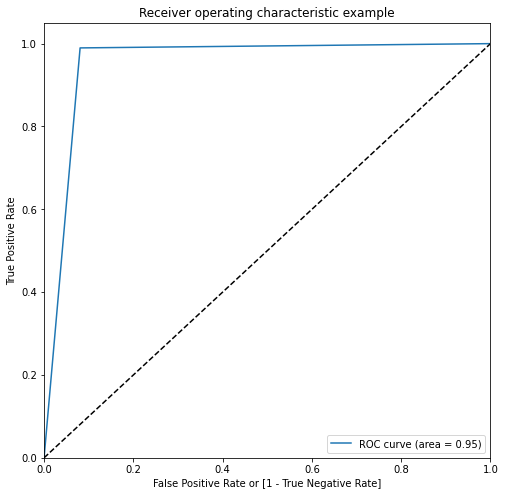

In [ ]:
# To draw ROC curve 
draw_roc(y_test_pred_RFE_final.churn, y_test_pred_RFE_final.Predicted)


#### AUC of ROC curve is **95%** for the Test data of RFE.

### Modeling Technique 2

#### **Random Forest**

In [ ]:
# To get the shape of Train data
X_train.shape


(14021, 58)

In [ ]:
# To get details of all variables
X_train.head()


arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
73381 -1.225378       -0.957122       -1.002896       -0.934644   
55215  0.033776        1.930231        2.407860        2.055781   
88606 -0.296343       -0.199861       -0.285813       -0.004444   
780   -1.444459        2.298620        1.281347       -0.934991   
45132 -0.254874       -0.826651       -0.845309       -0.766018   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
73381       -0.763386       -0.894095       -0.867889         -1.377740   
55215        0.460088        2.620316        0.347897         -0.160175   
88606       -0.146305       -0.022116        0.088435         -0.256733   
780         -0.094172       -0.181377       -1.002259          0.503951   
45132        0.084390        0.176657       -0.145980          0.513371   

       total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
73381         -1.427454           -0.810812           -0.785039   
55215          0.688854           -0.750087            2.309828   
88606         -0.405867           -1.114436           -1.069494   
780           -0.152184            0.221511           -1.069494   
45132         -0.517853            2.274013            2.343962   

       last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
73381            0.174687     -0.445969     -0.450673     -0.414884   
55215            2.009799      2.242308      2.218903      2.410315   
88606            0.556009     -0.445969     -0.450673     -0.414884   
780             -0.993111     -0.445969     -0.450673     -0.414884   
45132           -0.993111     -0.445969     -0.450673     -0.414884   

       sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
73381     0.330370     1.056226    -0.068114     -0.445509     -0.455226   
55215    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
88606     1.642214     2.276911     2.190715     -0.445509     -0.455226   
780      -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
45132    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   

       monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
73381     -0.436588     2.496954     3.563738    -0.350240   
55215     -0.436588    -0.400488    -0.369136    -0.350240   
88606     -0.436588     2.496954     1.597301     2.855186   
780       -0.436588    -0.400488    -0.369136    -0.350240   
45132     -0.436588    -0.400488    -0.369136    -0.350240   

       Total_data_rech_amt_6  Total_data_rech_amt_7  Total_data_rech_amt_8  \
73381              -0.120910               0.712499              -0.474890   
55215              -0.465661              -0.509437              -0.399025   
88606               2.878142               2.920410               3.077210   
780                -0.681481              -0.694835              -0.607654   
45132              -0.681481              -0.694835              -0.607654   

       Avrg_rchg_Amt_Good_Phase  Overall_Usage  t_days_rechrg_before_EOM_6  \
73381                 -0.549795      -0.539030                    0.746649   
55215                 -0.423528       1.468922                   -0.790088   
88606                  2.860796      -0.297740                   -0.790088   
780                   -0.696875      -1.250922                   -0.790088   
45132                 -0.805104      -0.826122                   -0.790088   

       t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
73381                   -0.584703                    1.031059       1.0   
55215                   -0.841408                   -0.448427       1.0   
88606                   -0.071294                   -0.871137       1.0   
780                      0.698820                    0.185639       1.0   
45132                   -0.584703                    2.933256       1.0   

       Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
73381   -0.576161         -0.75

In [ ]:
# To get Random Forest with upto 50 Trees
RFS_Churn = RandomForestClassifier(bootstrap=True, 
                                   class_weight= {1:0.92, 0:0.079},
                                   random_state=42,
                                   min_samples_leaf=150, 
                                   min_samples_split=300,
                                   max_features='auto', 
                                   n_estimators=50, 
                                   oob_score=True,
                                   max_depth=15)

# To fit X_train data
RFS_Churn.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.079, 1: 0.92}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=150,
                       min_samples_split=300, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
# To get Estimator
RFS_Churn.estimators_[0]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

In [ ]:
# To Predict the test data
RFS_pred = RFS_Churn.predict(X_test)


In [ ]:
# To get classification report
print(classification_report(y_test, RFS_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5526
           1       0.78      1.00      0.88       484

    accuracy                           0.98      6010
   macro avg       0.89      0.99      0.93      6010
weighted avg       0.98      0.98      0.98      6010



#### Inferences for Random Forest:
- Overall Accuracy: **98%**
- Precision: **78%**
- Recall: **100%**
- F1-Score: **88%**

In [ ]:
# # A function to get decision Tree
# def get_dt_graph(dt_classifier):
#     dot_data = StringIO()
#     export_graphviz(dt_classifier, out_file = dot_data, filled=True,rounded=True,
#                     feature_names=X.columns, 
#                     class_names=['Churn', "Not Churn"])
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#     return graph
    

In [ ]:
# A function to evaluate the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))


In [ ]:
# To evaluate the model
evaluate_model(RFS_Churn)


Train Accuracy : 0.981099778903074
Train Confusion Matrix:
[[12655   265]
 [    0  1101]]
--------------------------------------------------
Test Accuracy : 0.9775374376039934
Test Confusion Matrix:
[[5393  133]
 [   2  482]]


#### Inferences for Random Forest:
- Train Accuracy: **98.11%**
- Test Accuracy: **97.75%**

In [ ]:
# # To get the sample tree
# sample_tree = RFS_Churn.estimators_[4]


In [ ]:
# # To get graphical presentation
# gph = get_dt_graph(sample_tree)
# Image(gph.create_png(), width=1000, height=400)


#### Grid search to find optimal parameters for Random Forest.

In [ ]:
# To make parameter grid in the basis of random search
par_churn_grid = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5, 10, 15, 20, 30, 50], 
    'max_features': [5, 10, 15, 20, 25, 30]
}


In [ ]:
# To make a base model
RFS = RandomForestClassifier(random_state = 42, class_weight= {1:0.92, 0:0.079}, n_jobs = -1)


In [ ]:
# To initiate the grid search model
churn_grid_search = GridSearchCV(estimator=RFS, param_grid = par_churn_grid, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [ ]:
# To fit the grid search with the data
churn_grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  4.1min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.079, 1: 0.92},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100,...
                                              oob_score=False, random_state=42,
                             

In [ ]:
# To get optimal Accuracy Score and Hyperparameters
print('Optimal Accuracy is: ', round(churn_grid_search.best_score_, 4)*100 ,  'with best hyperparameters: ', churn_grid_search.best_params_)


Optimal Accuracy is:  99.99 with best hyperparameters:  {'max_depth': 1, 'max_features': 25, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}


In [ ]:
# To get the best estimator
RFS_best = churn_grid_search.best_estimator_


In [ ]:
# To get the best estimators
RFS_best


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.079, 1: 0.92}, criterion='gini',
                       max_depth=1, max_features=25, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [ ]:
# Evaluate model with the best estimators
evaluate_model(RFS_best)


Train Accuracy : 1.0
Train Confusion Matrix:
[[12920     0]
 [    0  1101]]
--------------------------------------------------
Test Accuracy : 1.0
Test Confusion Matrix:
[[5526    0]
 [   0  484]]


### Fitting the best model

In [ ]:
# To do model with best hyperparamter
# from sklearn.ensemble import RandomForestClassifier
RFS_2 = RandomForestClassifier(bootstrap=True,
                               class_weight={0: 0.079, 1: 0.92},
                               max_depth=1,
                               min_samples_leaf=10, 
                               min_samples_split=10,
                               max_features=25,
                               n_estimators=10)


In [ ]:
# To fit the model on train data
RFS_2.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.079, 1: 0.92}, criterion='gini',
                       max_depth=1, max_features=25, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
# To predict model on Test data
RFS_Test_Pred = RFS_2.predict(X_test)


In [ ]:
# To get classification report
print(classification_report(y_test, RFS_Test_Pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5526
           1       1.00      1.00      1.00       484

    accuracy                           1.00      6010
   macro avg       1.00      1.00      1.00      6010
weighted avg       1.00      1.00      1.00      6010



### Inferences for Random Forest Final Model
- Overall Accuracy - **100%**
- Precision - **100%**
- Recall - **100%**
- F1-Score - **100%**

### Feature Selection

In [ ]:
# To get the list of important features
Churn_featre_name = list(X_train.columns.values)
imp_fetre_dict = {}

for name, importance in zip(Churn_featre_name, RFS_2.feature_importances_):
    imp_fetre_dict[name] = importance


In [ ]:
# To sort the dictionary in descending order
d_descending = OrderedDict(sorted(imp_fetre_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))


In [ ]:
# To check various columns of dataframe
X_Tele_Churn.columns


Index(['mobile_number', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'Total_data_rech_amt_6',
       'Total_data_rech_amt_7', 'Total_data_rech_amt_8',
       'Avrg_rchg_Amt_Good_Phase', 'Overall_Usage', 'churn',
       't_days_rechrg_before_EOM_6', 't_days_rechrg_before_EOM_7',
       't_days_rechrg_before_EOM_8', 'arpu_6_7', 'Age_on_N/W',
       'Total_local_og_6', 'Total_local_og_7', 'Total_local_og_8',
       'Total_local_ic_6', 'Total_local_ic_7', 'Total_local_ic_8',
       'Total_std_ic_6', 'Total_std_ic_7', 'Total_std_ic_8', 'Total_std_og_6',
       'Total_std_og_7', 'Total_std_og

In [ ]:
# Top 5 important features
dic= dict(d_descending)

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n = 5
n_items = take(n, dic.items())


In [ ]:
# To get the top 5 influencers.
print('Top 5 influencer features: ', n_items)


Top 5 influencer features:  [('Overall_Usage', 0.6), ('total_og_mou_8', 0.2), ('arpu_8', 0.1), ('Total_local_ic_8', 0.1), ('total_og_mou_6', 0.0)]


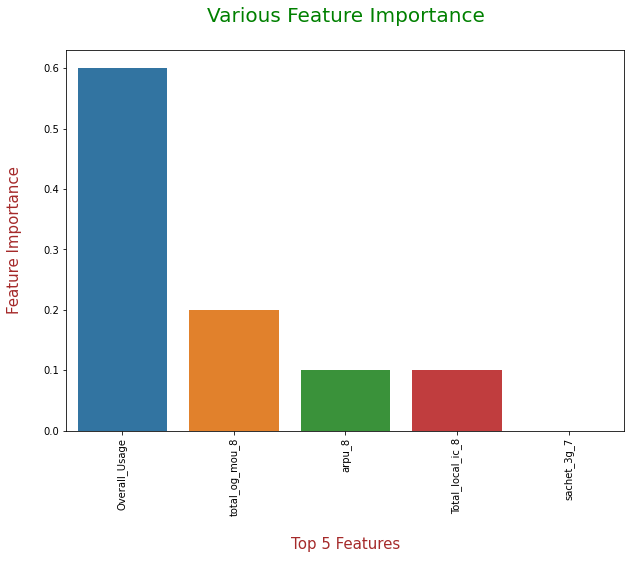

In [ ]:
# To get graphical representation of top 5 features
imp = RFS_2.feature_importances_
names = X_train.columns.values
imp,names=zip(*sorted(zip(imp, names)))

Churn_A = pd.DataFrame({"Variable":names,"importance":imp})
Churn_B = Churn_A.sort_values(by="importance", axis=0, ascending=False)
Churn_B = Churn_B.reset_index(drop=True)

fig = plt.figure(figsize=(10,7))
sns.barplot(x='Variable', y='importance', data = Churn_B[0:5])
plt.title("Various Feature Importance\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nTop 5 Features\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("Feature Importance\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.show()


### Inferences Random Forest Features:
- Top 5 variables are as followings:
- Overall Usage of minutes is the highest influencer among all other features.
- Total_og_mou_8 which includes all the outgoing calls on various network and having top 2nd influencer of Churn.
- Average Revenue Per User (arpu_8) is the top 3rd influencer which affects the Churn rate.
- Total_local_ic_8 which includes various incoming calls and it is the top 4th influencer of Churn rate.

### Model 3. 
**XGBoost**


In [ ]:
# To get XGBoost Classifier
xgclf_churn = xgb.XGBClassifier(class_weight= {1:0.92, 0:0.079})


In [ ]:
# To fit the XGBoost
xgclf_churn.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 0.079, 1: 0.92}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# To get AUC of Train data
print("XGBoost AUC of Train Data: ", metrics.roc_auc_score(y_true = y_train,
                                                              y_score = xgclf_churn.predict_proba(X_train)[:, 1]))


XGBoost AUC of Train Data:  1.0


In [ ]:
# To get AUC of Test data
print("XGBoost AUC of Test Data: ", metrics.roc_auc_score(y_true = y_test,
                                                             y_score = xgclf_churn.predict_proba(X_test)[:, 1]))


XGBoost AUC of Test Data:  1.0


#### Inferences of XGBoost before Hyper Parameter Tunning:
- AUC of Train Data: **100%**
- AUC of Tet Data: **100%**

#### Hyper parameter Tunning

In [ ]:
# To get XGB model
xgb_churn_model = xgb.XGBClassifier(class_weight= {1:0.92, 0:0.079})


In [ ]:
# Default Hyperparameter run for default parameter
xgb_param = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

xgb_scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better = True,
                             needs_proba = True,
                             needs_threshold = False)

clf_xgb_churn = model_selection.GridSearchCV(estimator = xgb_churn_model,
                                             param_grid = xgb_param,
                                             n_jobs = -1,
                                             cv = 3,
                                             scoring = xgb_scorer,
                                             refit = True)


In [ ]:
# To fit Train data with XGBoost
clf_xgb_churn.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight={0: 0.079, 1: 0.92},
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weigh

In [ ]:
# To get best XGBoost Hyper Parameter, Score and the Estimator
print("Best XGBoost Parameter: ", clf_xgb_churn.best_params_)
print("Best XGBoost Score: ", clf_xgb_churn.best_score_)
print("Best XGBoost Estimator: ", clf_xgb_churn.best_estimator_)


Best XGBoost Parameter:  {'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
Best XGBoost Score:  1.0
Best XGBoost Estimator:  XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 0.079, 1: 0.92}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#### 1st Run for Hperparameter Selection

In [ ]:
# 1st-Run for best hyperparameters
xgb_param = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [5, 10, 15, 20, 30, 50]}

xgb_scorer = metrics.make_scorer(metrics.roc_auc_score,
                                 greater_is_better = True,
                                 needs_proba = True,
                                 needs_threshold = False)

clf_xgb_churn = model_selection.GridSearchCV(estimator = xgb_churn_model,
                                             param_grid = xgb_param,
                                             n_jobs = -1,
                                             cv = 3,
                                             scoring = xgb_scorer,
                                             refit = True)



In [ ]:
# To fit Train data with new Hyperparameter
clf_xgb_churn.fit(X_train, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight={0: 0.079, 1: 0.92},
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 4, 6, 8, 10],
   

In [ ]:
# To get 1st XGBoost Hyper Parameter, Score and the Estimator
print("1st Best XGBoost Parameter: ", clf_xgb_churn.best_params_)
print("1st Best XGBoost Score: ", clf_xgb_churn.best_score_)
print("1st Best XGBoost Estimator: ", clf_xgb_churn.best_estimator_)


1st Best XGBoost Parameter:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 5}
1st Best XGBoost Score:  1.0
1st Best XGBoost Estimator:  XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 0.079, 1: 0.92}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#### To get Final XGBoost Model

In [ ]:
# To get final XGBoost Classifier
final_xgb_model = xgb.XGBClassifier(learning_rate = 0.1,
                                    class_weight= {1:0.92, 0:0.079},
                                    max_depth = 2,
                                    min_child_weight = 3,
                                    n_estimators = 5)


In [ ]:
# To fit Final XGBoost model
final_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree',
              class_weight={0: 0.079, 1: 0.92}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# To get AUC of Train data
print("Final XGBoost AUC of Train Data: ", metrics.roc_auc_score(y_true = y_train,
                                                                  y_score = final_xgb_model.predict_proba(X_train)[:, 1]))



Final XGBoost AUC of Train Data:  1.0


In [ ]:
# To get AUC of Test data
print("Final XGBoost AUC of Test Data: ", metrics.roc_auc_score(y_true = y_test,
                                                                y_score = final_xgb_model.predict_proba(X_test)[:, 1]))


Final XGBoost AUC of Test Data:  1.0


### Inferences for Final Model of XGBoost:
- AUC of Train Data:- **100%**
- AUC of Test Data:- **100%**

### Model 4.

### **Ridge Regression**

In [ ]:
# list of alphas to tune
ridge_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
churn_cv = GridSearchCV(estimator = ridge, 
                        param_grid = ridge_params, 
                        scoring= 'r2',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


In [ ]:
# To fit Train data with Ridge
churn_cv.fit(X_train, y_train)
 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
# To see resultant output of Alpha values
churn_cv_reslt = pd.DataFrame(churn_cv.cv_results_)
churn_cv_reslt.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.025659      0.000746         0.004131        0.000726      0.0001   
1       0.016539      0.009618         0.002223        0.000774       0.001   
2       0.011782      0.001594         0.002573        0.001563        0.01   
3       0.014754      0.005247         0.002269        0.000825        0.05   
4       0.017821      0.006377         0.002625        0.000793         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.295435           0.282687           0.282873   
1   {'alpha': 0.001}           0.295435           0.282687           0.282873   
2    {'alpha': 0.01}           0.295435           0.282687           0.282873   
3    {'alpha': 0.05}           0.295436           0.282687           0.282873   
4     {'alpha': 0.1}           0.295436           0.282688           0.282873   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.282264           0.259740           0.2806        0.011554   
1           0.282264           0.259740           0.2806        0.011554   
2           0.282264           0.259740           0.2806        0.011554   
3           0.282264           0.259741           0.2806        0.011554   
4           0.282264           0.259741           0.2806        0.011554   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            0.285011            0.288795   
1               25            0.285011            0.288795   
2               24            0.285011            0.288795   
3               23            0.285011            0.288795   
4               22            0.285011            0.288795   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.289027            0.289114            0.293756   
1            0.289027            0.289114            0.293756   
2            0.289027            0.289114            0.293756   
3            0.289027            0.289114            0.293756   
4            0.289027            0.289114            0.293756   

   mean_train_score  std_train_score  
0          0.289141         0.002774  
1          0.289141         0.002774  
2          0.289141         0.002774  
3          0.289141         0.002774  
4          0.289141         0.002774

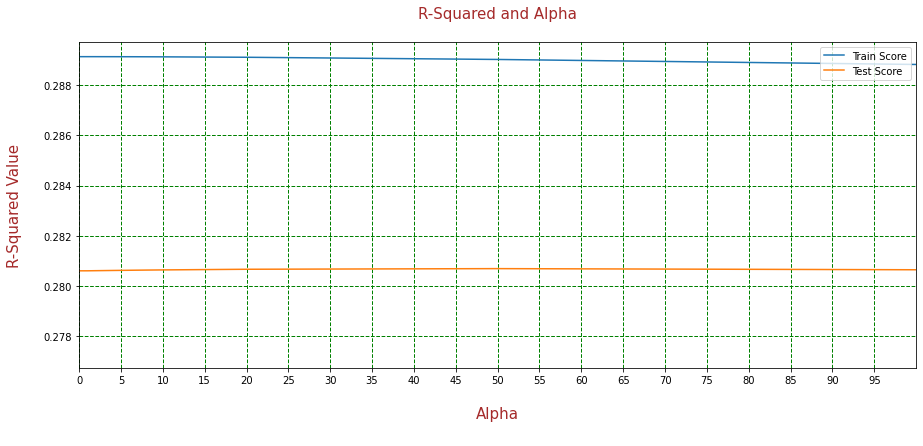

In [ ]:
# To plot mean test and train scores with alpha values 
churn_cv_reslt['param_alpha'] = churn_cv_reslt['param_alpha'].astype('int32')

# To plot the graph
plt.figure(figsize=(15,6))
plt.plot(churn_cv_reslt['param_alpha'], churn_cv_reslt['mean_train_score'])
plt.plot(churn_cv_reslt['param_alpha'], churn_cv_reslt['mean_test_score'])
plt.xlabel("\nAlpha\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("R-Squared Value\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.title("R-Squared and Alpha\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='g', linestyle='--', linewidth=1)
plt.show()


In [ ]:
# To get the Best Estimator, Best Score, and Best Parameters
print("\n Best Score among aLL searched parameters:\n",
          churn_cv.best_score_)

print("\n Best Estimator among aLL searched parameters:\n",
          churn_cv.best_estimator_)



 Best Score among aLL searched parameters:
 0.28069148971496166

 Best Estimator among aLL searched parameters:
 Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
# To check with the best hyper paramter value
alpha_50 = 50
ridge = Ridge(alpha=alpha_50)
ridge.fit(X_train, y_train)


Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# To see all the Ridge Coeffecients
ridge.coef_


array([-0.01814472,  0.00180255,  0.01845536,  0.03283888,  0.01279638,
        0.01421105,  0.01311766,  0.01236443,  0.02086231, -0.00121787,
       -0.01102444, -0.0311473 , -0.003588  , -0.00211368, -0.01126107,
        0.0055496 ,  0.010227  , -0.04562672, -0.00022441,  0.00312563,
       -0.00652257, -0.00166936,  0.00857664, -0.01362227, -0.01952486,
       -0.02276909,  0.0336074 ,  0.03181966, -0.08919618, -0.00115545,
        0.01739972,  0.04622334,  0.        , -0.01234079, -0.00395303,
       -0.01286906, -0.00955121,  0.00245839,  0.00756151, -0.03804534,
        0.00542406,  0.00455767, -0.02495616,  0.0221842 ,  0.00833433,
       -0.04889079,  0.00663703,  0.00066458, -0.00615598,  0.00050324,
        0.00152522, -0.01023574,  0.00598413,  0.01544104,  0.00679645,
        0.01742592,  0.00439144, -0.00116247])

In [ ]:
# To Predict Train and Test data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))


0.28828822532970055
0.2769697155820786


#### Inferences for Ridge Regression
- R2 Score for Train data is **28.83%**
- R2 Score for Test data is **27.73%**

#### Conclusion
- As R2-Sscore for Train and Test data is very low , we can say that this model is not performing well.


### Model 5. (PCA with Logistic Regression) 

In [ ]:
#Import the PCA 
pca_churn = PCA(svd_solver='randomized', random_state=42)


In [ ]:
# Do PCA on Train data
pca_churn.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
# To see PCA components
pca_churn.components_


array([[ 2.06638233e-01,  2.13210941e-01,  2.27553358e-01, ...,
        -9.81541239e-02, -9.56852949e-02, -7.80233738e-02],
       [ 4.85823909e-02, -1.54522386e-01, -1.61913160e-01, ...,
         2.32482555e-01,  2.41943762e-01,  2.45894971e-01],
       [ 1.90153172e-01,  7.69586084e-02,  1.07922393e-01, ...,
         1.98150832e-01,  2.20682462e-01,  2.22136174e-01],
       ...,
       [ 4.99525024e-03,  1.67415045e-01,  3.64474126e-02, ...,
         6.05803473e-04, -1.09596168e-03, -1.66007636e-03],
       [-8.03762741e-03,  2.59218727e-01, -5.50311297e-01, ...,
         1.36086874e-03, -2.33655339e-03,  1.79073685e-03],
       [-0.00000000e+00, -6.93889390e-18,  2.76185928e-16, ...,
         1.52655666e-16, -5.55111512e-17,  5.55111512e-17]])

In [ ]:
# To see top 5 PCA component
churn_cols = list(X_train.columns)
pca_churn_data = pd.DataFrame({'PC1':pca_churn.components_[0],'PC2':pca_churn.components_[1], 
                               'PC3':pca_churn.components_[2],'PC4':pca_churn.components_[3],
                               'PC5':pca_churn.components_[4],
                              #  'PC6':pca_churn.components_[5], 'PC7':pca_churn.components_[6],'PC8':pca_churn.components_[7],
                              #  'PC9':pca_churn.components_[8],'PC10':pca_churn.components_[9],
                              #  'PC11':pca_churn.components_[10], 'PC12':pca_churn.components_[11],
                              #  'PC13':pca_churn.components_[12],'PC14':pca_churn.components_[13],
                              #  'PC15':pca_churn.components_[14],
                               'Feature':churn_cols})
pca_churn_data.head(25)


PC1       PC2       PC3       PC4       PC5                Feature
0   0.206638  0.048582  0.190153  0.100506 -0.093863                 arpu_8
1   0.213211 -0.154522  0.076959  0.069178 -0.101962         total_og_mou_6
2   0.227553 -0.161913  0.107922  0.100246 -0.116023         total_og_mou_7
3   0.227769 -0.110094  0.112846  0.124930 -0.134985         total_og_mou_8
4   0.200906  0.178701 -0.161283  0.043977  0.107112         total_ic_mou_6
5   0.214661  0.179756 -0.140933  0.068352  0.120161         total_ic_mou_7
6   0.208506  0.191119 -0.126303  0.080971  0.085596         total_ic_mou_8
7   0.196744 -0.011587  0.145633  0.011122 -0.057866       total_rech_amt_6
8   0.208009 -0.003272  0.187716  0.059627 -0.073447       total_rech_amt_7
9   0.084038  0.088890  0.123916 -0.179581 -0.019861     last_day_rch_amt_6
10  0.097192  0.090550  0.125927 -0.142419 -0.021682     last_day_rch_amt_7
11  0.096931  0.113937  0.125473 -0.114208 -0.050253     last_day_rch_amt_8
12 -0.015033  0.084104 -0.020608 -0.139135  0.090067           monthly_2g_6
13 -0.016228  0.083639 -0.014066 -0.131603  0.088130           monthly_2g_7
14 -0.013422  0.087909 -0.012989 -0.112621  0.085387           monthly_2g_8
15 -0.153035  0.008558 -0.130329  0.273673  0.007456            sachet_2g_6
16 -0.153216  0.002800 -0.130462  0.305898  0.003485            sachet_2g_7
17 -0.128990  0.013379 -0.109792  0.314516 -0.011147            sachet_2g_8
18 -0.030781  0.182436  0.231927 -0.078280 -0.054875           monthly_3g_6
19 -0.024514  0.192706  0.241765 -0.071318 -0.059379           monthly_3g_7
20 -0.014007  0.201873  0.244780 -0.048217 -0.068449           monthly_3g_8
21 -0.084484  0.064737  0.002349  0.102936 -0.001724            sachet_3g_6
22 -0.087366  0.059173  0.013992  0.147879 -0.014427            sachet_3g_7
23 -0.076668  0.057893  0.012105  0.157704 -0.022282            sachet_3g_8
24 -0.157545  0.155045  0.067339  0.185423 -0.021952  Total_data_rech_amt_6

In [ ]:
# To check PCA Variance Ratio
np.cumsum(pca_churn.explained_variance_ratio_)


array([0.17476283, 0.29207712, 0.36971997, 0.44116649, 0.48969593,
       0.52985106, 0.56926362, 0.60121424, 0.63105057, 0.66057433,
       0.68739337, 0.70881947, 0.72774006, 0.74525334, 0.7624375 ,
       0.77772105, 0.79152114, 0.80421605, 0.81646448, 0.8276095 ,
       0.83851863, 0.84881312, 0.85866379, 0.86818844, 0.87733581,
       0.88627715, 0.89444814, 0.90250037, 0.91029471, 0.91790627,
       0.92515052, 0.932104  , 0.93891454, 0.94542088, 0.95148234,
       0.95704257, 0.96200009, 0.96684256, 0.97154609, 0.97511128,
       0.97858839, 0.98146008, 0.98416898, 0.98657344, 0.9888594 ,
       0.99092314, 0.99255929, 0.9939818 , 0.99527118, 0.99649599,
       0.9976893 , 0.99849973, 0.99921379, 0.99951736, 0.99970592,
       0.99988915, 1.        , 1.        ])

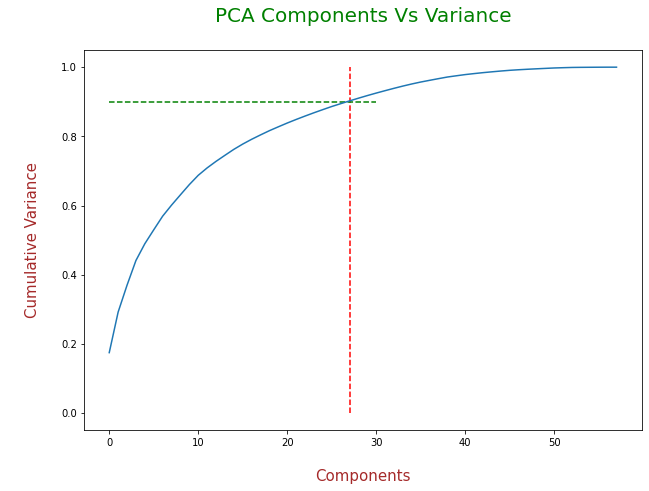

In [ ]:
# To analyze features with PCA plotting
fig = plt.figure(figsize = (10,7))
plt.plot(np.cumsum(pca_churn.explained_variance_ratio_))
plt.vlines(x=27, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=30, xmin=0, colors="g", linestyles="--")
plt.title("PCA Components Vs Variance\n", fontdict={'fontsize':20,'fontweight':5,'color':'Green'})
plt.xlabel("\nComponents",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.ylabel("\nCumulative Variance\n",fontdict={'fontsize':15,'fontweight':5,'color':'Brown'})
plt.show()


#### Nearly 27 features are showing 90% variance 

In [ ]:
# To fit train data with final PCA component
# pca_churn_final = IncrementalPCA(n_components=27)
pca_churn_final = PCA(n_components=27, random_state=42)
X_train_fin_pca = pca_churn_final.fit_transform(X_train)


In [ ]:
# To check the shape of the dataframe
X_train_fin_pca.shape


(14021, 27)

In [ ]:
# To fit Test data with final PCA components
X_test_fin_pca = pca_churn_final.transform(X_test)


In [ ]:
# To check the shape of the dataframe
X_test_fin_pca.shape


(6010, 27)

### PCA Logistic Regression with Class Weight Balancing technique.

In [ ]:
# Train the regression model
log_pca = LogisticRegression(class_weight= {1:0.92, 0:0.079})
model_pca = log_pca.fit(X_train_fin_pca, y_train)


In [ ]:
# To get Accuracy Score
print("Accuracy: ", round(model_pca.score(X_train_fin_pca, y_train) * 100, 2))


Accuracy:  87.46


#### Overall Accuracy of model with PCA: **87.46%**

In [ ]:
# Prediction on Train data
y_train_pred = log_pca.predict_proba(X_train_fin_pca)


In [ ]:
# To convert y_train_pred to a dataset
y_train_pred_data = pd.DataFrame(y_train_pred)


In [ ]:
# To convert into column 
y_train_pred_data = y_train_pred_data.iloc[:,[1]]


In [ ]:
# To check the columns and their values
y_train_pred_data.head(10)


1
0  0.382644
1  0.000168
2  0.033177
3  0.970461
4  0.734346
5  0.000817
6  0.429510
7  0.001966
8  0.037879
9  0.329936

In [ ]:
# To convert y_test data to a dataframe
y_test_data = pd.DataFrame(y_test)


In [ ]:
# To check the columns and their values
y_test_data.head(10)


churn
55884      0
70921      0
21352      0
75300      0
90311      0
36188      0
34016      0
85606      0
95812      0
72559      1

In [ ]:
# To check the Null value in the Dataframe
y_test_data.isnull().sum()


churn    0
dtype: int64

In [ ]:
# Putting Churn_ID to index
y_test_data['Churn_ID'] = y_test_data.index


In [ ]:
# To check the columns and their values
y_test_data.head(10)


churn  Churn_ID
55884      0     55884
70921      0     70921
21352      0     21352
75300      0     75300
90311      0     90311
36188      0     36188
34016      0     34016
85606      0     85606
95812      0     95812
72559      1     72559

In [ ]:
# To check the Null value in the Dataframe
y_test_data.isnull().sum()


churn       0
Churn_ID    0
dtype: int64

In [ ]:
# Removing index for both dataframes to append them side by side 
y_train_pred_data.reset_index(drop=True, inplace=True)
y_test_data.reset_index(drop=True, inplace=True)


In [ ]:
# Appending y_train_pred_data and y_test_data
y_churn_pred_final = pd.concat([y_test_data, y_train_pred_data], axis=1, join="inner")


In [ ]:
# To check the columns and their values 
y_churn_pred_final.head(10)


churn  Churn_ID         1
0      0     55884  0.382644
1      0     70921  0.000168
2      0     21352  0.033177
3      0     75300  0.970461
4      0     90311  0.734346
5      0     36188  0.000817
6      0     34016  0.429510
7      0     85606  0.001966
8      0     95812  0.037879
9      1     72559  0.329936

In [ ]:
# To check the Null value in the Dataframe
y_churn_pred_final.isnull().sum()


churn       0
Churn_ID    0
1           0
dtype: int64

In [ ]:
# Renaming the column 
y_churn_pred_final.rename(columns={ 1 : 'Tele_Churn_Prob'}, inplace = True)


In [ ]:
# To check the columns values in Dataframe
y_churn_pred_final.head()


churn  Churn_ID  Tele_Churn_Prob
0      0     55884         0.382644
1      0     70921         0.000168
2      0     21352         0.033177
3      0     75300         0.970461
4      0     90311         0.734346

In [ ]:
# To check the Null value in the Dataframe
y_churn_pred_final.isnull().sum()


churn              0
Churn_ID           0
Tele_Churn_Prob    0
dtype: int64

In [ ]:
# Rearranging the columns
# y_churn_pred_final = y_churn_pred_final.reindex(['Churn_ID','Churn','Tele_Churn_Prob'], axis=1)
y_churn_pred_final = y_churn_pred_final[["Churn_ID", "churn", "Tele_Churn_Prob"]]


In [ ]:
# Let's see the head of y_churn_pred_final
y_churn_pred_final.head(10)


Churn_ID  churn  Tele_Churn_Prob
0     55884      0         0.382644
1     70921      0         0.000168
2     21352      0         0.033177
3     75300      0         0.970461
4     90311      0         0.734346
5     36188      0         0.000817
6     34016      0         0.429510
7     85606      0         0.001966
8     95812      0         0.037879
9     72559      1         0.329936

In [ ]:
# To check the Null value in the Dataframe
y_churn_pred_final.isnull().sum()


Churn_ID           0
churn              0
Tele_Churn_Prob    0
dtype: int64

### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0.

In [ ]:
# Creating new column
y_churn_pred_final['Predicted'] = y_churn_pred_final.Tele_Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [ ]:
# To Check the column titles/variable's name of dataframe
y_churn_pred_final.head()


Churn_ID  churn  Tele_Churn_Prob  Predicted
0     55884      0         0.382644          0
1     70921      0         0.000168          0
2     21352      0         0.033177          0
3     75300      0         0.970461          1
4     90311      0         0.734346          1

In [ ]:
# Confusion matrix 
churn_confusion = metrics.confusion_matrix(y_churn_pred_final.churn, y_churn_pred_final.Predicted)
churn_confusion


array([[4504, 1022],
       [ 393,   91]])

In [ ]:
# Let's see the overall accuracy.
Over_Churn_Acc = (round(metrics.accuracy_score(y_churn_pred_final.churn, y_churn_pred_final.Predicted), 3)*100)
print("Over_Churn_Acc: ", Over_Churn_Acc) 


Over_Churn_Acc:  76.5


### Inferences for PCA for Train data: 
#### Overall Train Accuracy is **76.5%**.

### Metrics beyond simply accuracy

In [ ]:
# To get Tp, TN, FP, FN
TP = churn_confusion[1,1] # true positive 
TN = churn_confusion[0,0] # true negatives
FP = churn_confusion[0,1] # false positives
FN = churn_confusion[1,0] # false negatives


In [ ]:
# Check the Sensitivity of our logistic regression model
Churn_Sens = (round(TP / float(TP+FN),2)*100)
print("Sensitivity: ", Churn_Sens)


Sensitivity:  19.0


In [ ]:
# Check the calculated Specificity
Churn_Spec = (round(TN / float(TN+FP),2)*100)
print("Specificity: ", Churn_Spec)


Specificity:  82.0


In [ ]:
# # Calculate False Postive Rate - predicting conversion when user doesn't churned
# Churn_FPR = (round(FP/ float(TN+FP),2)*100)
# print("FPR: ", Churn_FPR)


In [ ]:
# # Positive Predictive value 
# Churn_PP = (round(TP / float(TP+FP),2)*100)
# print("Positive Predicitve: ", Churn_PP)


In [ ]:
# # Negative Predictive Value
# Churn_NP = (round(TN / float(TN+ FN),2)*100)
# print("Negative Predictive: ", Churn_NP)


#### Inferences for PCA on Train data with Logistic Regression:
- Accuracy - **87.5%**
- Sensitivity - **6%**
- Specificity - **95%**


### Precision

In [ ]:
# To find out Precision Score
pre_churn_1 = (round(precision_score(y_churn_pred_final.churn, y_churn_pred_final.Predicted),2)*100)
print("Precision: ",pre_churn_1)


Precision:  8.0


### Recall

In [ ]:
# To find out Recall Score
recall_churn_1 = (round(recall_score(y_churn_pred_final.churn, y_churn_pred_final.Predicted),2)*100)
print("Recall: ", recall_churn_1)



Recall:  19.0


### F1-Score

In [ ]:
# To get the F1-Score 
F1_Score_1 = round((2*((pre_churn_1 * recall_churn_1)/(pre_churn_1 + recall_churn_1))),2)
print("F1-Score: ", F1_Score_1)


F1-Score:  11.26


### F1-Score is 11.26%

### Plotting ROC Curve.

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [ ]:
# Find out the ROC variables
fpr, tpr, thresholds = metrics.roc_curve(y_churn_pred_final.churn, y_churn_pred_final.Predicted, drop_intermediate = False )


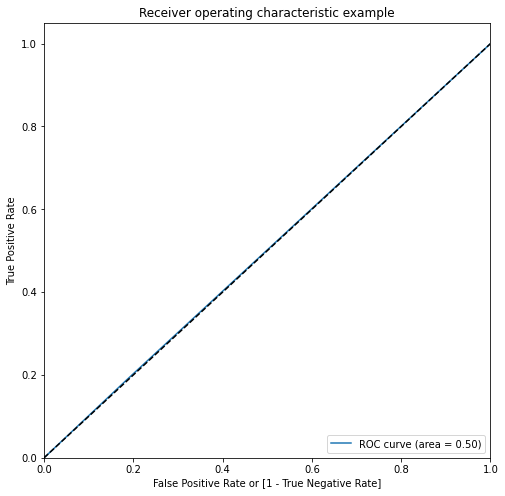

In [ ]:
# To draw ROC curve 
draw_roc(y_churn_pred_final.churn, y_churn_pred_final.Predicted)


#### Inferences for PCA before optimal point:
- Here Area under the ROC curve (AUC) is **50**%.

### Finding Optimal Cutoff Point.
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_churn_pred_final[i]= y_churn_pred_final.Tele_Churn_Prob.map(lambda x: 1 if x > i else 0)


In [ ]:
# To check the head
y_churn_pred_final.head()


Churn_ID  churn  Tele_Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0     55884      0         0.382644          0    1    1    1    1    0    0   
1     70921      0         0.000168          0    1    0    0    0    0    0   
2     21352      0         0.033177          0    1    0    0    0    0    0   
3     75300      0         0.970461          1    1    1    1    1    1    1   
4     90311      0         0.734346          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    1  
4    1    1    0    0

In [ ]:
# To calculate Accuracy, Sensitivity, Specificity, Precision and Recall for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['Conv_Probs','Accuracy', 'Specificity', 'Sensitivity','Precision', 'Recall'])

# TP = churn_confusion[1,1] # true positive 
# TN = churn_confusion[0,0] # true negatives
# FP = churn_confusion[0,1] # false positives
# FN = churn_confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_churn_pred_final.churn, y_churn_pred_final[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    Preci = (round(precision_score(y_churn_pred_final.churn, y_churn_pred_final[i]),2)*100)
    Recall = (round(recall_score(y_churn_pred_final.churn, y_churn_pred_final[i]),2)*100)
    
    cutoff_df.loc[i] =[i, accuracy, speci, sensi, Preci, Recall]
    

In [ ]:
# To get output 
cutoff_df


Conv_Probs  Accuracy  Specificity  Sensitivity  Precision  Recall
0.0         0.0  0.080532     0.000000     1.000000        8.0   100.0
0.1         0.1  0.525790     0.528773     0.491736        8.0    49.0
0.2         0.2  0.625957     0.649113     0.361570        8.0    36.0
0.3         0.3  0.689850     0.725299     0.285124        8.0    29.0
0.4         0.4  0.731281     0.774339     0.239669        9.0    24.0
0.5         0.5  0.764559     0.815056     0.188017        8.0    19.0
0.6         0.6  0.787354     0.841839     0.165289        8.0    17.0
0.7         0.7  0.811148     0.870612     0.132231        8.0    13.0
0.8         0.8  0.834775     0.898118     0.111570        9.0    11.0
0.9         0.9  0.864226     0.933225     0.076446        9.0     8.0

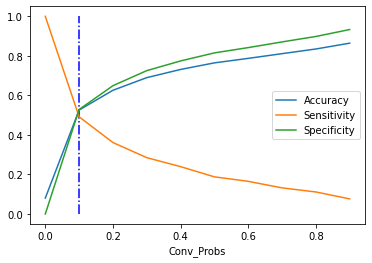

In [ ]:
# To plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Conv_Probs', y=['Accuracy','Sensitivity','Specificity'])
plt.vlines(0.1, ymax=1, ymin=0, colors='blue',linestyles='dashdot')
plt.legend()
plt.show()


In [ ]:
# Selecting 0.1 as a Cut-off point.
y_churn_pred_final['New_predicted'] = y_churn_pred_final.Tele_Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_churn_pred_final.head()


Churn_ID  churn  Tele_Churn_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0     55884      0         0.382644          0    1    1    1    1    0    0   
1     70921      0         0.000168          0    1    0    0    0    0    0   
2     21352      0         0.033177          0    1    0    0    0    0    0   
3     75300      0         0.970461          1    1    1    1    1    1    1   
4     90311      0         0.734346          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  New_predicted  
0    0    0    0    0              1  
1    0    0    0    0              0  
2    0    0    0    0              0  
3    1    1    1    1              1  
4    1    1    0    0              1

In [ ]:
New_Churn_Acc = (round(metrics.accuracy_score(y_churn_pred_final.churn, y_churn_pred_final.Predicted), 3)*100)
print("New Overall Acc: ", New_Churn_Acc) 


New Overall Acc:  76.5


In [ ]:
# Confusion matrix 
churn_confusion_2 = metrics.confusion_matrix(y_churn_pred_final.churn, y_churn_pred_final.Predicted)
churn_confusion_2


array([[4504, 1022],
       [ 393,   91]])

In [ ]:
# To find out the value of Precision
pre_churn_2 = round(churn_confusion_2[1,1]/(churn_confusion_2[0,1]+churn_confusion_2[1,1]),2)
print("Precision: ", pre_churn_2*100)

# To find out the value of Recall
recall_churn_2 = round(churn_confusion_2[1,1]/(churn_confusion_2[1,0]+churn_confusion_2[1,1]),2)
print("Recall: ", recall_churn_2*100)


Precision:  8.0
Recall:  19.0


In [ ]:
# To get the F1-Score 
F1_Score_2 = round(2*((pre_churn_2 * recall_churn_2)/(pre_churn_2 + recall_churn_2)),2)
print("F1_Score: ", F1_Score_2*100)


F1_Score:  11.0


### Inferences for PCA on Train data after Optimal Point:
- New Overall Accuracy: **76.5%**
- Precision: **8%**
- Recall: **19%**
- F-1 Score: **11%**

#### PCA on Test data

In [ ]:
# To Check shape of the Test data
X_test.shape

(6010, 58)

In [ ]:
# To check the variables of the Test data
X_test.head()


arpu_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
55884  0.089362        1.739370       -1.011929       -0.422023   
70921 -1.142709       -0.942367       -1.000008       -0.831284   
21352 -0.187849       -0.113164        0.180972        0.215812   
75300  0.483584       -0.396403       -0.383932       -0.262179   
90311  0.963893        0.908920        0.666469        0.390038   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_rech_amt_6  \
55884        2.617535       -1.060279        1.342764          2.263179   
70921       -0.903082       -0.373559       -0.592291         -1.318864   
21352        1.284656        1.578710        0.974823         -0.449847   
75300        1.325802        0.994616        1.211841          0.442720   
90311        1.377151        1.379569        0.154153          1.026774   

       total_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
55884         -1.112065            1.921809            0.295889   
70921         -1.226336           -0.810812           -0.785039   
21352         -0.696117           -0.300723            0.637234   
75300          0.282048           -0.750087           -0.728148   
90311          0.798555            0.221511           -0.500584   

       last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8  \
55884            0.556009     -0.445969     -0.450673     -0.414884   
70921           -0.993111     -0.445969     -0.450673     -0.414884   
21352           -0.993111      2.242308     -0.450673     -0.414884   
75300           -0.635622     -0.445969     -0.450673     -0.414884   
90311            0.722837     -0.445969     -0.450673     -0.414884   

       sachet_2g_6  sachet_2g_7  sachet_2g_8  monthly_3g_6  monthly_3g_7  \
55884    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
70921     1.642214     2.683806     0.383651     -0.445509     -0.455226   
21352    -0.544192    -0.164459     0.835417     -0.445509     -0.455226   
75300    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   
90311    -0.544192    -0.571354    -0.519880     -0.445509     -0.455226   

       monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
55884     -0.436588    -0.400488    -0.369136    -0.350240   
70921     -0.436588    -0.400488    -0.369136    -0.350240   
21352     -0.436588    -0.400488     1.597301     2.855186   
75300     -0.436588    -0.400488    -0.369136    -0.350240   
90311     -0.436588    -0.400488    -0.369136    -0.350240   

       Total_data_rech_amt_6  Total_data_rech_amt_7  Total_data_rech_amt_8  \
55884              -0.681481              -0.694835              -0.607654   
70921               0.138354               1.743018              -0.472181   
21352              -0.465661               0.037123               0.356914   
75300              -0.681481              -0.694835              -0.607654   
90311              -0.681481              -0.694835              -0.607654   

       Avrg_rchg_Amt_Good_Phase  Overall_Usage  t_days_rechrg_before_EOM_6  \
55884                 -0.322237       0.183602                   -0.021720   
70921                  0.250820      -0.839740                   -0.277842   
21352                 -0.614316       0.748220                   -0.533965   
75300                 -0.583096      -0.481759                   -0.790088   
90311                 -0.254247      -0.668743                   -0.790088   

       t_days_rechrg_before_EOM_7  t_days_rechrg_before_EOM_8  arpu_6_7  \
55884                    2.752458                   -0.025717       1.0   
70921                   -0.841408                    0.608349       1.0   
21352                    1.212230                    1.031059       1.0   
75300                   -0.841408                   -0.871137       1.0   
90311                   -0.584703                   -0.025717       1.0   

       Age_on_N/W  Total_local_og_6  Total_local_og_7  Total_local_og_8  \
55884   -0.773678          2.54

In [ ]:
# To check the shape of the Test dataframe with PCA
X_test_fin_pca.shape


(6010, 27)

In [ ]:
# To check the variable value
y_test.head(10)


55884    0
70921    0
21352    0
75300    0
90311    0
36188    0
34016    0
85606    0
95812    0
72559    1
Name: churn, dtype: int64

In [ ]:
# To get overall Test Accuracy
test_churn_pred = model_pca.predict_proba(X_test_fin_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, test_churn_pred))


'0.93'

#### Overall PCA Test Accuracy is **93%**.

#### To Predict Test Probability

In [ ]:
# To get Predicted test probabilities
y_test_pred_pca = log_pca.predict_proba(X_test_fin_pca)

# Converting y_test_pred to a dataframe 
y_test_pred_pca_data = pd.DataFrame(y_test_pred_pca)


In [ ]:
# To convert test data into dataframe
y_test_pred_pca_data = y_test_pred_pca_data.iloc[:,[1]]


In [ ]:
# To check the head
y_test_pred_pca_data.head()


1
0  0.038619
1  0.370951
2  0.020861
3  0.221356
4  0.540284

In [ ]:
# To remove for both dataframes to append them side by side 
y_test_pred_pca_data.reset_index(drop=True, inplace=True)
y_test_data.reset_index(drop=True, inplace=True)


In [ ]:
# To append y_test_pred_data and y_test_data
y_test_pred_final = pd.concat([y_test_data, y_test_pred_pca_data], axis=1, join="inner")


In [ ]:
# To check the columns and their values 
y_test_pred_final.head(10)


churn  Churn_ID         1
0      0     55884  0.038619
1      0     70921  0.370951
2      0     21352  0.020861
3      0     75300  0.221356
4      0     90311  0.540284
5      0     36188  0.009742
6      0     34016  0.472958
7      0     85606  0.020941
8      0     95812  0.127765
9      1     72559  0.973355

In [ ]:
# To check the Null value in the Dataframe
y_test_pred_final.isnull().sum()


churn       0
Churn_ID    0
1           0
dtype: int64

In [ ]:
# Renaming the column 
y_test_pred_final.rename(columns={ 1 : 'Test_Prob'}, inplace = True)


In [ ]:
# To check the columns values in Dataframe
y_test_pred_final.head()


churn  Churn_ID  Test_Prob
0      0     55884   0.038619
1      0     70921   0.370951
2      0     21352   0.020861
3      0     75300   0.221356
4      0     90311   0.540284

In [ ]:
# To check the Null value in the Dataframe
y_test_pred_final.isnull().sum()


churn        0
Churn_ID     0
Test_Prob    0
dtype: int64

In [ ]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[["Churn_ID", "churn", "Test_Prob"]]


In [ ]:
# Let's see the head of y_churn_pred_final
y_test_pred_final.head(10)


Churn_ID  churn  Test_Prob
0     55884      0   0.038619
1     70921      0   0.370951
2     21352      0   0.020861
3     75300      0   0.221356
4     90311      0   0.540284
5     36188      0   0.009742
6     34016      0   0.472958
7     85606      0   0.020941
8     95812      0   0.127765
9     72559      1   0.973355

In [ ]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Test_Prob.map( lambda x: 1 if x > 0.5 else 0)


In [ ]:
# Let's see the head
y_test_pred_final.head()


Churn_ID  churn  Test_Prob  Predicted
0     55884      0   0.038619          0
1     70921      0   0.370951          0
2     21352      0   0.020861          0
3     75300      0   0.221356          0
4     90311      0   0.540284          1

In [ ]:
# To get overall Test Accuracy
Test_Pred_Acc = (round(metrics.accuracy_score(y_test_pred_final.churn, y_test_pred_final.Predicted), 3)*100)
print("Pred Test Acc: ", Test_Pred_Acc) 


Pred Test Acc:  86.3


In [ ]:
# To get confusion matrix
Test_confusn = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.Predicted )
Test_confusn


array([[4763,  763],
       [  61,  423]])

In [ ]:
# To get Confusion Matrix
TP_test = Test_confusn[1,1] # True Positive 
TN_test = Test_confusn[0,0] # True Negatives
FP_test = Test_confusn[0,1] # False Positives
FN_test = Test_confusn[1,0] # False Negatives


In [ ]:
# Check the Sensitivity of our logistic regression model on test data
Test_Sens = (round(TP_test / float(TP_test + FN_test),2)*100)
print("Test Sensitivity: ", Test_Sens)


Test Sensitivity:  87.0


In [ ]:
# To Check the calculated Specificity for our logistic model on test data
Test_Spec = (round(TN_test / float(TN_test + FP_test),2)*100)
print("Test Specificity: ", Test_Spec)


Test Specificity:  86.0


In [ ]:
# To find out the value of Precision
prec_test = round(Test_confusn[1,1]/(Test_confusn[0,1] + Test_confusn[1,1]),2)
print("Test Precision: ", prec_test * 100)

# To find out the value of Recall
recall_test = round(Test_confusn[1,1]/(Test_confusn[1,0] + Test_confusn[1,1]),2)
print("Test Recall: ", recall_test*100)


Test Precision:  36.0
Test Recall:  87.0


In [ ]:
# To get the F1-Score 
F1_Score_Test = round(2*((prec_test * recall_test)/(prec_test + recall_test)),2)
print("Test F1_Score: ", F1_Score_Test * 100)


Test F1_Score:  51.0


#### Inferences for PCA on Test Data:
- Probability of Predicted Test Accuracy: **86.3%**
- Sensitivity on Test Data: **87%**
- Specificity on Test Data: **86%**
- Precision on Test Data: **36%**
- Recall on Test Data: **87%**
- Test F1-Score: **51%**

### Module Selection:
- After various model calcualtions I found that among all the models including RFE, XGBoost, Ridge Regression and PCA, Random Forest is one of the most useful Model for our purpose. As its overall Accuracy, Precision and Recall are **100%** and its gives top 5 most useful features for observation.

### Conclusion/Outcome:
- According to feature importance graph of Random Forest it is clear that Company should consider 4 following different features to control Churn Rate...
- Overall Usage, and from the month of August Total_og_mou_8, arpu_8, Total_local_ic_8, if they go down then Churn rate may increase, therefore during this phase and on variation of these values for that particular customer company should provide offers to that no.
- As they all are related to the month of August company should consider this duration and should do accordingly.

-According to various EDA graphs it is concluded that from June to August users overall data usage, total local outgoing, total std outgoing, total recharge amount has been decreased from June to August.
- Whereas reachrging no. of days has been increased for the Churned users therfore company need to observe all these parameters and do accordingly to retain the users.

### ***End of Telecomm Churn with Logistic Regression***